# Imports & dataset loading

In [1]:
from cancerclassification.data import *
from cancerclassification.nn import *
from cancerclassification.swav import *

from sklearn.metrics import accuracy_score
import torch.optim as optim

import seaborn as sns

%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
device = (
    "cuda:0" if torch.cuda.is_available() else "cpu"
)  # 0 indicates the GPU you gonna use
print(f"Using {device} device")

Using cuda:0 device


In [3]:
dataset = read_data_MA_preprocessed()
idx = generate_indices(dataset)
cancer_dataset = CancerDatasetMA(dataset[:, 1:], dataset[:, 0], device)
dataloaders = get_dataloaders(cancer_dataset, idx, [256, 256, 256])
input_dim = dataloaders[0].dataset.inputs.shape[1] # 54675
output_dim = 1 # binary classification
w = compute_loss_pos_weights(dataset, device)

21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset


In [9]:
# Draft

In [ ]:
name = "demo_baseline_microarray"
logger = LogResults(name, ["prop"])

steps = (
    list(np.arange(0.01, 0.05, 0.001))
    + list(np.arange(0.05, 0.14, 0.005))
    + list(np.arange(0.14, 0.30, 0.01))
    + list(np.arange(0.65, 1.05, 0.05))
)

for i in range(50):
    for prop in steps:
        logger.update_hyps([prop])
        
        # Finetuning and evaluation
        
        idx = generate_indices(dataset, prop=prop)
        base_bs = 256
        margin = 0.5
        bs = round(len(idx[0]) / (len(idx[0]) // base_bs + margin))
        dataloaders = get_dataloaders(cancer_dataset, idx, [bs, bs, bs])
        
        config_nn = {
            "epochs": 200,
            "lr_init": 0.0004,
            "early_stop": 5,
        }
        
        net = Net(input_dim, output_dim).to(device)
        train_nn(config_nn, dataloaders, net, weights=None, early_stop=config_nn["early_stop"], log=False, logger=logger, binary=True)
        logger.next_run()
        logger.show_progression()
            
    logger.save_csv()

21244 elements in the dataset
149 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 1, below are the last 5 epochs :
       id epoch   val_acc  val_loss  test_acc  test_loss  prop
18  run-0    18  0.782240  0.506175  0.786633   0.495224  0.01
19  run-0    19  0.782554  0.499963  0.786633   0.490138  0.01
20  run-0    20  0.782240  0.500791  0.788202   0.488979  0.01
21  run-0    21  0.782554  0.501044  0.789143   0.489057  0.01
22  run-0    22  0.781299  0.497518  0.788830   0.487834  0.01
21244 elements in the dataset
164 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 2, below are the last 5 epochs :
       id epoch   val_acc  val_loss  test_acc  test_loss   prop
55  run-1    32  0.799812  0.476455  0.805146   0.467162  0.011
56  run-1    33  0.799812  0.474311  0.805460   0.465527  0.011
57  run-1    34  0.800439  0.477753  0.806401   0.466422  0.011
58  run-1    35  0.799812  0.475219  0.806401 


Iteration 16, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss   prop
416  run-15    17  0.835582  0.415710  0.828993   0.421875  0.025
417  run-15    18  0.834641  0.414858  0.830248   0.419898  0.025
418  run-15    19  0.835582  0.412451  0.829620   0.416489  0.025
419  run-15    20  0.834327  0.413037  0.829307   0.416313  0.025
420  run-15    21  0.833072  0.413155  0.829934   0.417030  0.025
21244 elements in the dataset
387 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 17, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss   prop
444  run-16    23  0.844054  0.403176  0.839034   0.415112  0.026
445  run-16    24  0.843740  0.412403  0.839661   0.405641  0.026
446  run-16    25  0.844054  0.411087  0.839034   0.407830  0.026
447  run-16    26  0.844368  0.406573  0.839034   0.406952  0.026
448  run-16    27  0.844368  0.408438  0.837778   0.409155  0.026
21


Iteration 31, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss  prop
785  run-30    19  0.856605  0.374872  0.843426   0.381828  0.04
786  run-30    20  0.853153  0.381390  0.843426   0.391599  0.04
787  run-30    21  0.853467  0.378463  0.844682   0.383033  0.04
788  run-30    22  0.853467  0.378229  0.847192   0.385351  0.04
789  run-30    23  0.854409  0.379385  0.846878   0.396476  0.04
21244 elements in the dataset
610 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 32, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss   prop
822  run-31    32  0.852212  0.371305  0.847819   0.405347  0.041
823  run-31    33  0.853467  0.407491  0.849388   0.398645  0.041
824  run-31    34  0.852212  0.397570  0.846564   0.395063  0.041
825  run-31    35  0.855036  0.408419  0.849388   0.381416  0.041
826  run-31    36  0.853153  0.393402  0.850329   0.405939  0.041
21244 el


Iteration 46, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss   prop
1109  run-45    17  0.881079  0.299637  0.879197   0.314822  0.075
1110  run-45    18  0.883590  0.300083  0.880138   0.313993  0.075
1111  run-45    19  0.883590  0.296867  0.877628   0.314353  0.075
1112  run-45    20  0.883590  0.296417  0.878569   0.312496  0.075
1113  run-45    21  0.886100  0.299239  0.879511   0.313659  0.075
21244 elements in the dataset
1190 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 47, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  prop
1129  run-46    15  0.883903  0.300060  0.878255   0.299159  0.08
1130  run-46    16  0.881393  0.305736  0.879511   0.311346  0.08
1131  run-46    17  0.881707  0.296311  0.881707   0.294817  0.08
1132  run-46    18  0.882334  0.325455  0.878883   0.346997  0.08
1133  run-46    19  0.883276  0.298455  0.879197   0.335058  


Iteration 61, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  prop
1412  run-60    11  0.902730  0.250348  0.895199   0.269575  0.16
1413  run-60    12  0.904299  0.245979  0.896454   0.266133  0.16
1414  run-60    13  0.903671  0.268039  0.890179   0.294906  0.16
1415  run-60    14  0.901789  0.283935  0.884845   0.323911  0.16
1416  run-60    15  0.897396  0.297738  0.879197   0.333977  0.16
21244 elements in the dataset
2528 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 62, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  prop
1434  run-61    17  0.911516  0.249036  0.900220   0.276113  0.17
1435  run-61    18  0.911202  0.239942  0.899278   0.266553  0.17
1436  run-61    19  0.910574  0.251750  0.898337   0.280436  0.17
1437  run-61    20  0.909633  0.266031  0.897709   0.287848  0.17
1438  run-61    21  0.905240  0.272539  0.894572   0.298195  0.17
2

<AxesSubplot:xlabel='prop', ylabel='test_acc'>

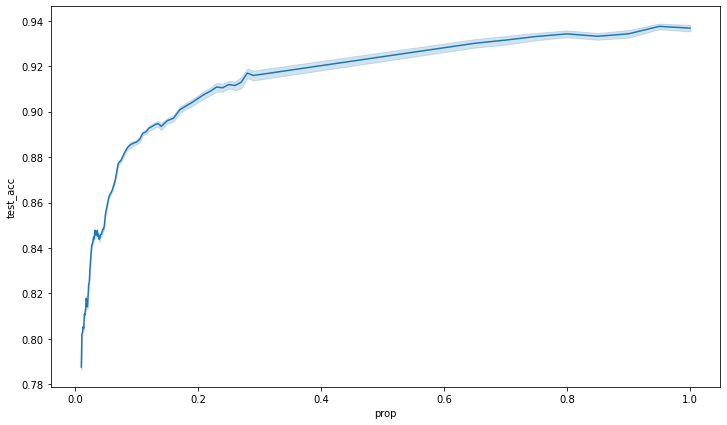

In [16]:
# df_results = logger.df_results
df_results = pd.read_csv("demo_baseline_microarray.csv")
df_le = (
    df_results.sort_values(by=["id", "epoch"], ascending=[False, False])
    .groupby("id", as_index=False)
    .first()
)
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_le, x="prop", y="test_acc")

In [32]:
df_le.loc[df_le["prop"] >= 0.99]["test_acc"].describe()

count    50.000000
mean      0.936712
std       0.005344
min       0.922811
25%       0.933558
50%       0.937873
75%       0.939755
max       0.946345
Name: test_acc, dtype: float64

# Number of prototypes

In [ ]:
name = "demo_number_prototypes_microarray"
logger = LogResults(name, ["nprotos"])

nprotos = [2, 4, 6, 10, 16, 24, 32, 64]

for i in range(5):
    for nproto in nprotos:
        
        logger.update_hyps([nproto])
        
        config_swav = {
            "epochs": 200,
            "lr_init": 0.0001,
            "early_stop": 5,
            "coeff": 0.6,
        }
        
        # SwAV training
        
        idx = generate_indices(dataset)
        dataloaders = get_dataloaders(cancer_dataset, idx, [256, 256, 256])
        net_swav = NetSwav(input_dim, nproto=nproto).to(device)
        train_swav_tcga(config_swav, dataloaders, net_swav, device, config_swav["early_stop"])
        torch.save(net_swav.state_dict(), "data/s12/swav_state_dict_ma_0.pt")
        
        # Finetuning and evaluation
        
        idx = generate_indices(dataset, prop=0.03)
        base_bs = 256
        margin = 0.5
        bs = round(len(idx[0]) / (len(idx[0]) // base_bs + margin))
        dataloaders = get_dataloaders(cancer_dataset, idx, [bs, bs, bs])
        
        config_nn = {
            "epochs": 200,
            "lr_init": 0.001,
            "early_stop": 5,
        }
        
        for i in range(10):
            net = Net(input_dim, output_dim).to(device)
            transfer_weights(net, f"data/s12/swav_state_dict_ma_0.pt")
            train_nn(config_nn, dataloaders, net, weights=None, early_stop=config_nn["early_stop"], log=False, logger=logger, binary=True)
            logger.next_run()
            logger.show_progression()
            
        logger.save_csv()

<AxesSubplot:xlabel='nprotos', ylabel='test_acc'>

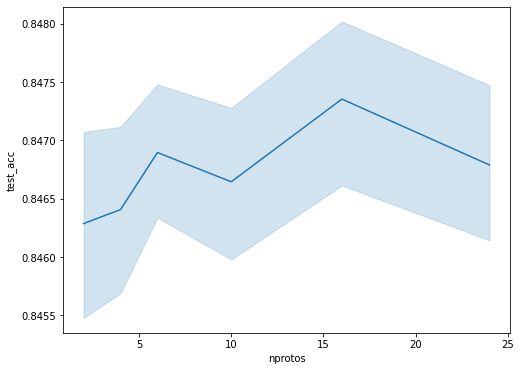

In [27]:
# df_results = logger.df_results
df_results = pd.read_csv("demo_number_prototypes_microarray.csv")
df_le = (
    df_results.sort_values(by=["id", "epoch"], ascending=[False, False])
    .groupby("id", as_index=False)
    .first()
)
df_le = df_le.loc[df_le["nprotos"] < 30]
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_le, x="nprotos", y="test_acc")

# Epsilon value

In [ ]:
name = "demo_epsilon_value_microarray"
logger = LogResults(name, ["epsilon"])

epsilons = [0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14]

for i in range(5):
    for eps in epsilons:
        
        logger.update_hyps([eps])
        
        config_swav = {
            "epochs": 200,
            "lr_init": 0.0001,
            "early_stop": 5,
            "coeff": 0.6,
        }
        
        # SwAV training
        
        idx = generate_indices(dataset)
        dataloaders = get_dataloaders(cancer_dataset, idx, [256, 256, 256])
        net_swav = NetSwav(input_dim, nproto=16).to(device)
        train_swav_tcga(config_swav, dataloaders, net_swav, device, config_swav["early_stop"], eps=eps)
        torch.save(net_swav.state_dict(), "data/s12/swav_state_dict_ma_0.pt")
        
        # Finetuning and evaluation
        
        idx = generate_indices(dataset, prop=0.03)
        base_bs = 256
        margin = 0.5
        bs = round(len(idx[0]) / (len(idx[0]) // base_bs + margin))
        dataloaders = get_dataloaders(cancer_dataset, idx, [bs, bs, bs])
        
        config_nn = {
            "epochs": 200,
            "lr_init": 0.001,
            "early_stop": 5,
        }
        
        for j in range(10):
            net = Net(input_dim, output_dim).to(device)
            transfer_weights(net, f"data/s12/swav_state_dict_ma_0.pt")
            train_nn(config_nn, dataloaders, net, weights=None, early_stop=config_nn["early_stop"], log=False, logger=logger, binary=True)
            logger.next_run()
            logger.show_progression()
            
        logger.save_csv()

<AxesSubplot:xlabel='epsilon', ylabel='test_acc'>

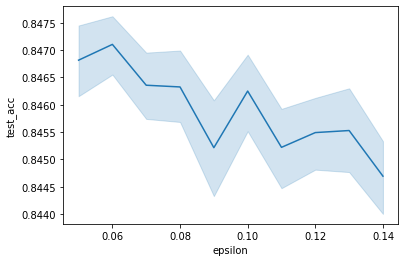

In [17]:
df_results = logger.df_results
df_le = (
    df_results.sort_values(by=["id", "epoch"], ascending=[False, False])
    .groupby("id", as_index=False)
    .first()
)
# plt.figure(figsize=(10, 8))
sns.lineplot(data=df_le, x="epsilon", y="test_acc")

# Augmentation method

In [10]:
name = "demo_augmentation_method_microarray"
logger = LogResults(name, ["coeff", "aug"])

coeffs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
augmentations = ["noise", "mask"]

for i in range(5):
    for coeff in coeffs:
        for aug in augmentations:
            
            logger.update_hyps([coeff, aug])
            
            config_swav = {
                "epochs": 200,
                "lr_init": 0.0001,
                "early_stop": 5,
                "coeff": coeff,
            }
            
            # SwAV training
            
            idx = generate_indices(dataset)
            dataloaders = get_dataloaders(cancer_dataset, idx, [256, 256, 256])
            net_swav = NetSwav(input_dim, nproto=16).to(device)
            train_swav_tcga(config_swav, dataloaders, net_swav, device, config_swav["early_stop"], eps=0.05, method=aug)
            torch.save(net_swav.state_dict(), "data/s12/swav_state_dict_ma_0.pt")
        
            # Finetuning and evaluation

            idx = generate_indices(dataset, prop=0.03)
            base_bs = 256
            margin = 0.5
            bs = round(len(idx[0]) / (len(idx[0]) // base_bs + margin))
            dataloaders = get_dataloaders(cancer_dataset, idx, [bs, bs, bs])

            config_nn = {
                "epochs": 200,
                "lr_init": 0.001,
                "early_stop": 5,
            }

            for j in range(10):
                net = Net(input_dim, output_dim).to(device)
                transfer_weights(net, f"data/s12/swav_state_dict_ma_0.pt")
                train_nn(config_nn, dataloaders, net, weights=None, early_stop=config_nn["early_stop"], log=False, logger=logger, binary=True)
                logger.next_run()
                logger.show_progression()

            logger.save_csv()



21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/200 | SwAVTrainLoss=0.4332 | SwAVEvalLoss=0.1380 |
| Epoch:   2/200 | SwAVTrainLoss=0.1199 | SwAVEvalLoss=0.0974 |
| Epoch:   3/200 | SwAVTrainLoss=0.0889 | SwAVEvalLoss=0.0743 |
| Epoch:   4/200 | SwAVTrainLoss=0.0776 | SwAVEvalLoss=0.0671 |
| Epoch:   5/200 | SwAVTrainLoss=0.0680 | SwAVEvalLoss=0.0596 |
| Epoch:   6/200 | SwAVTrainLoss=0.0790 | SwAVEvalLoss=0.0562 |
| Epoch:   7/200 | SwAVTrainLoss=0.0648 | SwAVEvalLoss=0.0615 |
INFO: Early stopping counter 1 of 5
| Epoch:   8/200 | SwAVTrainLoss=0.0848 | SwAVEvalLoss=0.0629 |
| Epoch:   9/200 | SwAVTrainLoss=0.0648 | SwAVEvalLoss=0.0463 |
INFO: Early stopping counter 1 of 5
| Epoch:  10/200 | SwAVTrainLoss=0.0568 | SwAVEvalLoss=0.0566 |
INFO: Early stopping counter 2 of 5
| Epoch:  11/200 | SwAVTrainLoss=0.0695 | SwAVEvalLoss=0.0561 |
INFO: Early stopping counter 3 of 5
| Epoch:  12/200 | SwAVTrainLoss=0


Iteration 13, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
272  run-12    21  0.846564  0.429682  0.844995   0.424953    0.1  mask
273  run-12    22  0.846878  0.433946  0.844682   0.427274    0.1  mask
274  run-12    23  0.846250  0.434460  0.846250   0.429541    0.1  mask
275  run-12    24  0.844054  0.438368  0.844054   0.428930    0.1  mask
276  run-12    25  0.844682  0.438431  0.843113   0.431056    0.1  mask

Iteration 14, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
293  run-13    16  0.849074  0.440439  0.848133   0.438754    0.1  mask
294  run-13    17  0.849388  0.439161  0.847819   0.436862    0.1  mask
295  run-13    18  0.848447  0.442930  0.847505   0.439641    0.1  mask
296  run-13    19  0.848133  0.443796  0.848447   0.441799    0.1  mask
297  run-13    20  0.846250  0.441217  0.846878   0.441104    0.1  mask

Iteration 15, below are the last 5 epochs :
 


Iteration 26, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
531  run-25    22  0.850643  0.413839  0.847819   0.419341    0.2  noise
532  run-25    23  0.850643  0.413847  0.844682   0.417758    0.2  noise
533  run-25    24  0.850016  0.418654  0.845623   0.417634    0.2  noise
534  run-25    25  0.848761  0.415273  0.845623   0.423954    0.2  noise
535  run-25    26  0.850957  0.418605  0.844054   0.419825    0.2  noise

Iteration 27, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
548  run-26    12  0.848447  0.425435  0.845623   0.423576    0.2  noise
549  run-26    13  0.847819  0.424116  0.846250   0.422697    0.2  noise
550  run-26    14  0.848761  0.428698  0.845937   0.420441    0.2  noise
551  run-26    15  0.849074  0.424969  0.845937   0.425342    0.2  noise
552  run-26    16  0.846878  0.427421  0.843426   0.422392    0.2  noise

Iteration 28, below are the last 


Iteration 39, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
768  run-38    20  0.848447  0.437255  0.850329   0.435682    0.2  mask
769  run-38    21  0.848761  0.441241  0.849388   0.434079    0.2  mask
770  run-38    22  0.847819  0.436723  0.850643   0.435910    0.2  mask
771  run-38    23  0.847819  0.439262  0.849388   0.435360    0.2  mask
772  run-38    24  0.848761  0.439938  0.848761   0.435501    0.2  mask

Iteration 40, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
787  run-39    14  0.851271  0.424680  0.849074   0.424471    0.2  mask
788  run-39    15  0.849388  0.432704  0.844995   0.432679    0.2  mask
789  run-39    16  0.849074  0.431508  0.845309   0.433814    0.2  mask
790  run-39    17  0.848447  0.435358  0.846564   0.435856    0.2  mask
791  run-39    18  0.850957  0.436430  0.847505   0.435976    0.2  mask
21244 elements in the dataset
14870 elements i

INFO: Early stopping counter 1 of 5
| Epoch:  13/200 | SwAVTrainLoss=0.0703 | SwAVEvalLoss=0.0634 |
| Epoch:  14/200 | SwAVTrainLoss=0.0791 | SwAVEvalLoss=0.0600 |
INFO: Early stopping counter 1 of 5
| Epoch:  15/200 | SwAVTrainLoss=0.0727 | SwAVEvalLoss=0.0659 |
INFO: Early stopping counter 2 of 5
| Epoch:  16/200 | SwAVTrainLoss=0.0685 | SwAVEvalLoss=0.0673 |
INFO: Early stopping counter 3 of 5
| Epoch:  17/200 | SwAVTrainLoss=0.0711 | SwAVEvalLoss=0.0648 |
INFO: Early stopping counter 4 of 5
| Epoch:  18/200 | SwAVTrainLoss=0.0632 | SwAVEvalLoss=0.0607 |
| Epoch:  19/200 | SwAVTrainLoss=0.0692 | SwAVEvalLoss=0.0560 |
INFO: Early stopping counter 1 of 5
| Epoch:  20/200 | SwAVTrainLoss=0.0699 | SwAVEvalLoss=0.0671 |
INFO: Early stopping counter 2 of 5
| Epoch:  21/200 | SwAVTrainLoss=0.0611 | SwAVEvalLoss=0.0682 |
INFO: Early stopping counter 3 of 5
| Epoch:  22/200 | SwAVTrainLoss=0.0698 | SwAVEvalLoss=0.0633 |
INFO: Early stopping counter 4 of 5
| Epoch:  23/200 | SwAVTrainLoss=0.0


Iteration 61, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
1223  run-60    16  0.850016  0.433717  0.852212   0.431805    0.4  noise
1224  run-60    17  0.850643  0.437660  0.850329   0.431741    0.4  noise
1225  run-60    18  0.849702  0.437157  0.849702   0.435355    0.4  noise
1226  run-60    19  0.850643  0.443267  0.849388   0.439251    0.4  noise
1227  run-60    20  0.849388  0.446053  0.847819   0.443162    0.4  noise

Iteration 62, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
1246  run-61    18  0.847192  0.427600  0.847192   0.425846    0.4  noise
1247  run-61    19  0.847505  0.430928  0.846878   0.427464    0.4  noise
1248  run-61    20  0.847505  0.431251  0.846878   0.430073    0.4  noise
1249  run-61    21  0.847819  0.438785  0.848447   0.433209    0.4  noise
1250  run-61    22  0.847819  0.433573  0.848133   0.433590    0.4  noise

Iteration 63, below a


Iteration 73, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
1473  run-72    13  0.850016  0.444596  0.848761   0.443459    0.4  mask
1474  run-72    14  0.849074  0.442098  0.846564   0.446622    0.4  mask
1475  run-72    15  0.846878  0.443834  0.848133   0.441130    0.4  mask
1476  run-72    16  0.847505  0.442135  0.848447   0.436765    0.4  mask
1477  run-72    17  0.848761  0.446974  0.846250   0.439443    0.4  mask

Iteration 74, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
1498  run-73    20  0.847505  0.443999  0.844368   0.445178    0.4  mask
1499  run-73    21  0.849074  0.439292  0.844368   0.442526    0.4  mask
1500  run-73    22  0.849074  0.445085  0.844995   0.442157    0.4  mask
1501  run-73    23  0.847819  0.446672  0.842799   0.442844    0.4  mask
1502  run-73    24  0.848447  0.452324  0.844054   0.448876    0.4  mask

Iteration 75, below are the last 


Iteration 86, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
1746  run-85    17  0.847505  0.430375  0.847192   0.430844    0.5  noise
1747  run-85    18  0.846564  0.434024  0.847192   0.429442    0.5  noise
1748  run-85    19  0.847819  0.434361  0.847505   0.429263    0.5  noise
1749  run-85    20  0.846250  0.437968  0.847192   0.428324    0.5  noise
1750  run-85    21  0.844682  0.437534  0.847819   0.430816    0.5  noise

Iteration 87, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
1762  run-86    11  0.843113  0.445513  0.845309   0.449426    0.5  noise
1763  run-86    12  0.841230  0.443449  0.845937   0.443400    0.5  noise
1764  run-86    13  0.845623  0.438688  0.844368   0.439302    0.5  noise
1765  run-86    14  0.844682  0.427806  0.850643   0.432582    0.5  noise
1766  run-86    15  0.844995  0.428059  0.850643   0.433001    0.5  noise

Iteration 88, below a


Iteration 99, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
1993  run-98    11  0.844368  0.427081  0.844682   0.433103    0.5  mask
1994  run-98    12  0.842799  0.431607  0.845309   0.427627    0.5  mask
1995  run-98    13  0.842485  0.428357  0.844368   0.425547    0.5  mask
1996  run-98    14  0.843426  0.422798  0.845309   0.421816    0.5  mask
1997  run-98    15  0.842799  0.420756  0.845623   0.418867    0.5  mask

Iteration 100, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
2008  run-99    10  0.843740  0.431854  0.841544   0.442401    0.5  mask
2009  run-99    11  0.842485  0.431378  0.842171   0.439338    0.5  mask
2010  run-99    12  0.839347  0.436963  0.841858   0.438107    0.5  mask
2011  run-99    13  0.841858  0.437418  0.844368   0.435371    0.5  mask
2012  run-99    14  0.842799  0.436563  0.843740   0.435149    0.5  mask
21244 elements in the dataset
148

| Epoch:   1/200 | SwAVTrainLoss=0.9024 | SwAVEvalLoss=0.2838 |
| Epoch:   2/200 | SwAVTrainLoss=0.2265 | SwAVEvalLoss=0.1766 |
| Epoch:   3/200 | SwAVTrainLoss=0.1609 | SwAVEvalLoss=0.1479 |
| Epoch:   4/200 | SwAVTrainLoss=0.1604 | SwAVEvalLoss=0.1314 |
| Epoch:   5/200 | SwAVTrainLoss=0.1405 | SwAVEvalLoss=0.1255 |
| Epoch:   6/200 | SwAVTrainLoss=0.1367 | SwAVEvalLoss=0.1210 |
| Epoch:   7/200 | SwAVTrainLoss=0.1413 | SwAVEvalLoss=0.1370 |
| Epoch:   8/200 | SwAVTrainLoss=0.1346 | SwAVEvalLoss=0.1290 |
| Epoch:   9/200 | SwAVTrainLoss=0.1175 | SwAVEvalLoss=0.1176 |
| Epoch:  10/200 | SwAVTrainLoss=0.1031 | SwAVEvalLoss=0.1121 |
INFO: Early stopping counter 1 of 5
| Epoch:  11/200 | SwAVTrainLoss=0.1164 | SwAVEvalLoss=0.1208 |
INFO: Early stopping counter 2 of 5
| Epoch:  12/200 | SwAVTrainLoss=0.1066 | SwAVEvalLoss=0.1166 |
INFO: Early stopping counter 3 of 5
| Epoch:  13/200 | SwAVTrainLoss=0.1099 | SwAVEvalLoss=0.1210 |
| Epoch:  14/200 | SwAVTrainLoss=0.1137 | SwAVEvalLoss=0.111

INFO: Early stopping counter 1 of 5
| Epoch:  13/200 | SwAVTrainLoss=0.0771 | SwAVEvalLoss=0.0669 |
INFO: Early stopping counter 2 of 5
| Epoch:  14/200 | SwAVTrainLoss=0.0687 | SwAVEvalLoss=0.0631 |
| Epoch:  15/200 | SwAVTrainLoss=0.0740 | SwAVEvalLoss=0.0567 |
INFO: Early stopping counter 1 of 5
| Epoch:  16/200 | SwAVTrainLoss=0.0645 | SwAVEvalLoss=0.0608 |
INFO: Early stopping counter 2 of 5
| Epoch:  17/200 | SwAVTrainLoss=0.0694 | SwAVEvalLoss=0.0572 |
INFO: Early stopping counter 3 of 5
| Epoch:  18/200 | SwAVTrainLoss=0.0757 | SwAVEvalLoss=0.0568 |
| Epoch:  19/200 | SwAVTrainLoss=0.0601 | SwAVEvalLoss=0.0549 |
INFO: Early stopping counter 1 of 5
| Epoch:  20/200 | SwAVTrainLoss=0.0554 | SwAVEvalLoss=0.0550 |
| Epoch:  21/200 | SwAVTrainLoss=0.0546 | SwAVEvalLoss=0.0497 |
INFO: Early stopping counter 1 of 5
| Epoch:  22/200 | SwAVTrainLoss=0.0562 | SwAVEvalLoss=0.0577 |
INFO: Early stopping counter 2 of 5
| Epoch:  23/200 | SwAVTrainLoss=0.0661 | SwAVEvalLoss=0.0606 |
INFO: Ea

INFO: Early stopping counter 1 of 5
| Epoch:  24/200 | SwAVTrainLoss=0.1163 | SwAVEvalLoss=0.1297 |
INFO: Early stopping counter 2 of 5
| Epoch:  25/200 | SwAVTrainLoss=0.1188 | SwAVEvalLoss=0.1245 |
INFO: Early stopping counter 3 of 5
| Epoch:  26/200 | SwAVTrainLoss=0.1104 | SwAVEvalLoss=0.1284 |
INFO: Early stopping counter 4 of 5
| Epoch:  27/200 | SwAVTrainLoss=0.1146 | SwAVEvalLoss=0.1348 |
INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 131, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
2618  run-130     9  0.846250  0.422836  0.841858   0.430533    0.7  mask
2619  run-130    10  0.844054  0.429523  0.840916   0.433112    0.7  mask
2620  run-130    11  0.844054  0.432079  0.844054   0.437083    0.7  mask
2621  run-130    12  0.845309  0.432574  0.846878   0.431506    0.7  mask
2622  run-1


Iteration 143, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
2869  run-142    17  0.852840  0.429850  0.848761   0.426881    0.8  noise
2870  run-142    18  0.850957  0.428582  0.850643   0.425809    0.8  noise
2871  run-142    19  0.852212  0.430971  0.847505   0.431531    0.8  noise
2872  run-142    20  0.852212  0.427973  0.846878   0.426547    0.8  noise
2873  run-142    21  0.851585  0.427387  0.846250   0.426138    0.8  noise

Iteration 144, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
2888  run-143    14  0.847819  0.434958  0.850016   0.439023    0.8  noise
2889  run-143    15  0.845309  0.436355  0.851271   0.433787    0.8  noise
2890  run-143    16  0.844054  0.431407  0.849074   0.429326    0.8  noise
2891  run-143    17  0.844682  0.434035  0.848133   0.432078    0.8  noise
2892  run-143    18  0.844368  0.436730  0.846564   0.434277    0.8  noise

Iterati


Iteration 152, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
3056  run-151    11  0.842485  0.463834  0.848447   0.459726    0.8  mask
3057  run-151    12  0.841858  0.457394  0.847819   0.452213    0.8  mask
3058  run-151    13  0.840289  0.457002  0.848447   0.449019    0.8  mask
3059  run-151    14  0.841544  0.458975  0.847819   0.456022    0.8  mask
3060  run-151    15  0.840916  0.456681  0.847192   0.456260    0.8  mask

Iteration 153, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
3076  run-152    15  0.844054  0.445146  0.849388   0.440744    0.8  mask
3077  run-152    16  0.843113  0.450201  0.850957   0.443387    0.8  mask
3078  run-152    17  0.841858  0.448520  0.847819   0.441972    0.8  mask
3079  run-152    18  0.844368  0.442059  0.845937   0.436009    0.8  mask
3080  run-152    19  0.843426  0.439406  0.846564   0.432962    0.8  mask

Iteration 154, belo


Iteration 165, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
3331  run-164    13  0.851585  0.426122  0.846564   0.422718    0.9  noise
3332  run-164    14  0.848447  0.419637  0.846564   0.419668    0.9  noise
3333  run-164    15  0.849702  0.419560  0.845309   0.422753    0.9  noise
3334  run-164    16  0.850643  0.418263  0.845309   0.420154    0.9  noise
3335  run-164    17  0.851271  0.419931  0.846878   0.413612    0.9  noise

Iteration 166, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
3345  run-165     9  0.847819  0.448968  0.840289   0.453140    0.9  noise
3346  run-165    10  0.849702  0.440644  0.842799   0.442504    0.9  noise
3347  run-165    11  0.849702  0.431751  0.846878   0.432258    0.9  noise
3348  run-165    12  0.847505  0.429537  0.846564   0.431733    0.9  noise
3349  run-165    13  0.846878  0.431222  0.845309   0.433106    0.9  noise

Iterati

| Epoch:  67/200 | SwAVTrainLoss=0.3060 | SwAVEvalLoss=0.2824 |
INFO: Early stopping counter 1 of 5
| Epoch:  68/200 | SwAVTrainLoss=0.3041 | SwAVEvalLoss=0.2894 |
INFO: Early stopping counter 2 of 5
| Epoch:  69/200 | SwAVTrainLoss=0.3096 | SwAVEvalLoss=0.2935 |
INFO: Early stopping counter 3 of 5
| Epoch:  70/200 | SwAVTrainLoss=0.3120 | SwAVEvalLoss=0.2973 |
INFO: Early stopping counter 4 of 5
| Epoch:  71/200 | SwAVTrainLoss=0.2956 | SwAVEvalLoss=0.2919 |
INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 171, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
3440  run-170    19  0.849388  0.437402  0.847192   0.439942    0.9  mask
3441  run-170    20  0.847505  0.442117  0.847505   0.440518    0.9  mask
3442  run-170    21  0.844682  0.444474  0.847192   0.446098    0.9  mask
3443  run-170    22  


Iteration 182, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
3644  run-181    19  0.850643  0.429544  0.852212   0.425714    1.0  noise
3645  run-181    20  0.851898  0.421993  0.851271   0.416653    1.0  noise
3646  run-181    21  0.851585  0.417362  0.851898   0.414293    1.0  noise
3647  run-181    22  0.851271  0.415655  0.849388   0.414501    1.0  noise
3648  run-181    23  0.851271  0.417519  0.847192   0.416741    1.0  noise

Iteration 183, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
3660  run-182    11  0.844368  0.447216  0.847819   0.445499    1.0  noise
3661  run-182    12  0.844995  0.445460  0.847819   0.443063    1.0  noise
3662  run-182    13  0.845623  0.443188  0.847192   0.439455    1.0  noise
3663  run-182    14  0.843740  0.450724  0.846250   0.442174    1.0  noise
3664  run-182    15  0.842799  0.450807  0.847819   0.446399    1.0  noise

Iterati

| Epoch:  58/200 | SwAVTrainLoss=2.7730 | SwAVEvalLoss=2.7730 |
| Epoch:  59/200 | SwAVTrainLoss=2.7729 | SwAVEvalLoss=2.7729 |
| Epoch:  60/200 | SwAVTrainLoss=2.7729 | SwAVEvalLoss=2.7729 |
| Epoch:  61/200 | SwAVTrainLoss=2.7729 | SwAVEvalLoss=2.7729 |
| Epoch:  62/200 | SwAVTrainLoss=2.7729 | SwAVEvalLoss=2.7729 |
| Epoch:  63/200 | SwAVTrainLoss=2.7728 | SwAVEvalLoss=2.7729 |
| Epoch:  64/200 | SwAVTrainLoss=2.7728 | SwAVEvalLoss=2.7728 |
| Epoch:  65/200 | SwAVTrainLoss=2.7728 | SwAVEvalLoss=2.7728 |
| Epoch:  66/200 | SwAVTrainLoss=2.7728 | SwAVEvalLoss=2.7728 |
| Epoch:  67/200 | SwAVTrainLoss=2.7728 | SwAVEvalLoss=2.7728 |
| Epoch:  68/200 | SwAVTrainLoss=2.7728 | SwAVEvalLoss=2.7728 |
| Epoch:  69/200 | SwAVTrainLoss=2.7727 | SwAVEvalLoss=2.7727 |
| Epoch:  70/200 | SwAVTrainLoss=2.7727 | SwAVEvalLoss=2.7727 |
| Epoch:  71/200 | SwAVTrainLoss=2.7727 | SwAVEvalLoss=2.7727 |
| Epoch:  72/200 | SwAVTrainLoss=2.7727 | SwAVEvalLoss=2.7727 |
| Epoch:  73/200 | SwAVTrainLoss=2.7727 

| Epoch: 172/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 173/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
INFO: Early stopping counter 1 of 5
| Epoch: 174/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 175/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 176/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 177/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 178/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 179/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 180/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 181/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 182/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 183/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
INFO: Early stopping counter 1 of 5
| Epoch: 184/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
INFO: Early stopping counter 2 of 5
| Epoch: 185/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.772

INFO: Early stopping counter 1 of 5
| Epoch:  16/200 | SwAVTrainLoss=0.0534 | SwAVEvalLoss=0.0549 |
INFO: Early stopping counter 2 of 5
| Epoch:  17/200 | SwAVTrainLoss=0.0478 | SwAVEvalLoss=0.0523 |
| Epoch:  18/200 | SwAVTrainLoss=0.0482 | SwAVEvalLoss=0.0468 |
| Epoch:  19/200 | SwAVTrainLoss=0.0419 | SwAVEvalLoss=0.0464 |
INFO: Early stopping counter 1 of 5
| Epoch:  20/200 | SwAVTrainLoss=0.0469 | SwAVEvalLoss=0.0484 |
INFO: Early stopping counter 2 of 5
| Epoch:  21/200 | SwAVTrainLoss=0.0601 | SwAVEvalLoss=0.0555 |
INFO: Early stopping counter 3 of 5
| Epoch:  22/200 | SwAVTrainLoss=0.0556 | SwAVEvalLoss=0.0562 |
| Epoch:  23/200 | SwAVTrainLoss=0.0631 | SwAVEvalLoss=0.0458 |
INFO: Early stopping counter 1 of 5
| Epoch:  24/200 | SwAVTrainLoss=0.0541 | SwAVEvalLoss=0.0499 |
INFO: Early stopping counter 2 of 5
| Epoch:  25/200 | SwAVTrainLoss=0.0604 | SwAVEvalLoss=0.0655 |
| Epoch:  26/200 | SwAVTrainLoss=0.0476 | SwAVEvalLoss=0.0447 |
| Epoch:  27/200 | SwAVTrainLoss=0.0620 | Sw

INFO: Early stopping counter 2 of 5
| Epoch:  22/200 | SwAVTrainLoss=0.0607 | SwAVEvalLoss=0.0481 |
| Epoch:  23/200 | SwAVTrainLoss=0.0565 | SwAVEvalLoss=0.0429 |
INFO: Early stopping counter 1 of 5
| Epoch:  24/200 | SwAVTrainLoss=0.0550 | SwAVEvalLoss=0.0453 |
INFO: Early stopping counter 2 of 5
| Epoch:  25/200 | SwAVTrainLoss=0.0594 | SwAVEvalLoss=0.0449 |
INFO: Early stopping counter 3 of 5
| Epoch:  26/200 | SwAVTrainLoss=0.0583 | SwAVEvalLoss=0.0455 |
INFO: Early stopping counter 4 of 5
| Epoch:  27/200 | SwAVTrainLoss=0.0593 | SwAVEvalLoss=0.0470 |
INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 211, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
4238  run-210     8  0.841230  0.443434  0.842171   0.461642    0.1  mask
4239  run-210     9  0.840916  0.447577  0.842485   0.460498    0.1  


Iteration 223, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
4465  run-222    17  0.843113  0.447563  0.844682   0.445145    0.2  noise
4466  run-222    18  0.841858  0.445314  0.845937   0.445687    0.2  noise
4467  run-222    19  0.840289  0.447064  0.845623   0.441701    0.2  noise
4468  run-222    20  0.841230  0.444972  0.844995   0.441138    0.2  noise
4469  run-222    21  0.843740  0.443741  0.844682   0.440552    0.2  noise

Iteration 224, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
4487  run-223    17  0.849388  0.445251  0.843113   0.456979    0.2  noise
4488  run-223    18  0.848133  0.436891  0.846564   0.445939    0.2  noise
4489  run-223    19  0.848133  0.438895  0.846250   0.440144    0.2  noise
4490  run-223    20  0.846878  0.437139  0.845623   0.439435    0.2  noise
4491  run-223    21  0.845937  0.440513  0.844995   0.445231    0.2  noise

Iterati


Iteration 235, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
4714  run-234    16  0.852212  0.426394  0.846878   0.429866    0.2  mask
4715  run-234    17  0.851271  0.428225  0.846564   0.432393    0.2  mask
4716  run-234    18  0.849388  0.431739  0.846250   0.431666    0.2  mask
4717  run-234    19  0.849702  0.433221  0.846878   0.434477    0.2  mask
4718  run-234    20  0.849702  0.438136  0.845937   0.437096    0.2  mask

Iteration 236, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
4731  run-235    12  0.847819  0.429239  0.845309   0.436991    0.2  mask
4732  run-235    13  0.845623  0.434021  0.843740   0.437476    0.2  mask
4733  run-235    14  0.845937  0.435513  0.844995   0.440206    0.2  mask
4734  run-235    15  0.845623  0.431610  0.848447   0.433615    0.2  mask
4735  run-235    16  0.847505  0.429059  0.849702   0.431952    0.2  mask

Iteration 237, belo


Iteration 249, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
4989  run-248    19  0.853153  0.428476  0.849388   0.425043    0.3  noise
4990  run-248    20  0.850329  0.428783  0.850016   0.424317    0.3  noise
4991  run-248    21  0.850329  0.425550  0.850329   0.418595    0.3  noise
4992  run-248    22  0.848447  0.421110  0.852526   0.413268    0.3  noise
4993  run-248    23  0.848761  0.425314  0.850329   0.416083    0.3  noise

Iteration 250, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
5008  run-249    14  0.850643  0.422755  0.846250   0.429943    0.3  noise
5009  run-249    15  0.851271  0.426923  0.845309   0.431712    0.3  noise
5010  run-249    16  0.849702  0.431814  0.842799   0.435542    0.3  noise
5011  run-249    17  0.850016  0.434564  0.844368   0.433505    0.3  noise
5012  run-249    18  0.850329  0.431999  0.844368   0.432774    0.3  noise
21244 el

| Epoch:   4/200 | SwAVTrainLoss=0.0913 | SwAVEvalLoss=0.0755 |
| Epoch:   5/200 | SwAVTrainLoss=0.0836 | SwAVEvalLoss=0.0703 |
| Epoch:   6/200 | SwAVTrainLoss=0.0805 | SwAVEvalLoss=0.0627 |
| Epoch:   7/200 | SwAVTrainLoss=0.0710 | SwAVEvalLoss=0.0711 |
INFO: Early stopping counter 1 of 5
| Epoch:   8/200 | SwAVTrainLoss=0.0640 | SwAVEvalLoss=0.0713 |
| Epoch:   9/200 | SwAVTrainLoss=0.0738 | SwAVEvalLoss=0.0582 |
INFO: Early stopping counter 1 of 5
| Epoch:  10/200 | SwAVTrainLoss=0.0642 | SwAVEvalLoss=0.0583 |
| Epoch:  11/200 | SwAVTrainLoss=0.0478 | SwAVEvalLoss=0.0510 |
| Epoch:  12/200 | SwAVTrainLoss=0.0503 | SwAVEvalLoss=0.0500 |
INFO: Early stopping counter 1 of 5
| Epoch:  13/200 | SwAVTrainLoss=0.0586 | SwAVEvalLoss=0.0556 |
| Epoch:  14/200 | SwAVTrainLoss=0.0643 | SwAVEvalLoss=0.0487 |
INFO: Early stopping counter 1 of 5
| Epoch:  15/200 | SwAVTrainLoss=0.0656 | SwAVEvalLoss=0.0545 |
| Epoch:  16/200 | SwAVTrainLoss=0.0428 | SwAVEvalLoss=0.0471 |
INFO: Early stopping cou


Iteration 272, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
5412  run-271    17  0.847192  0.418222  0.844054   0.418201    0.4  mask
5413  run-271    18  0.844368  0.424115  0.843740   0.422119    0.4  mask
5414  run-271    19  0.844368  0.425412  0.843740   0.425742    0.4  mask
5415  run-271    20  0.845937  0.424889  0.844368   0.425810    0.4  mask
5416  run-271    21  0.846564  0.427966  0.845623   0.427088    0.4  mask

Iteration 273, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
5434  run-272    17  0.848133  0.420512  0.846250   0.418974    0.4  mask
5435  run-272    18  0.848133  0.413477  0.847819   0.417721    0.4  mask
5436  run-272    19  0.847505  0.420531  0.847505   0.419576    0.4  mask
5437  run-272    20  0.847819  0.422742  0.847819   0.421764    0.4  mask
5438  run-272    21  0.848447  0.422760  0.846564   0.427881    0.4  mask

Iteration 274, belo


Iteration 285, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
5678  run-284    16  0.846250  0.443467  0.850643   0.438221    0.5  noise
5679  run-284    17  0.845623  0.443960  0.850016   0.434301    0.5  noise
5680  run-284    18  0.843426  0.443537  0.851585   0.436457    0.5  noise
5681  run-284    19  0.845309  0.444143  0.851585   0.435670    0.5  noise
5682  run-284    20  0.846564  0.445152  0.850957   0.435617    0.5  noise

Iteration 286, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
5703  run-285    20  0.850016  0.429239  0.846564   0.436399    0.5  noise
5704  run-285    21  0.846878  0.426610  0.846250   0.435774    0.5  noise
5705  run-285    22  0.845937  0.431149  0.845937   0.434441    0.5  noise
5706  run-285    23  0.847819  0.431128  0.845309   0.435183    0.5  noise
5707  run-285    24  0.848133  0.434861  0.845623   0.437970    0.5  noise

Iterati


Iteration 299, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
5982  run-298    15  0.849074  0.431065  0.849702   0.431630    0.5  mask
5983  run-298    16  0.848761  0.430556  0.850643   0.428095    0.5  mask
5984  run-298    17  0.848761  0.437697  0.849388   0.432608    0.5  mask
5985  run-298    18  0.847819  0.429919  0.848447   0.434247    0.5  mask
5986  run-298    19  0.848447  0.426882  0.848133   0.431536    0.5  mask

Iteration 300, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
6007  run-299    20  0.847505  0.428573  0.846564   0.427072    0.5  mask
6008  run-299    21  0.848447  0.431658  0.846564   0.426870    0.5  mask
6009  run-299    22  0.848447  0.428672  0.845937   0.427014    0.5  mask
6010  run-299    23  0.846878  0.430810  0.844995   0.430647    0.5  mask
6011  run-299    24  0.846878  0.433197  0.846250   0.431499    0.5  mask
21244 elements in th

INFO: Early stopping counter 2 of 5
| Epoch:  11/200 | SwAVTrainLoss=0.1150 | SwAVEvalLoss=0.1185 |
INFO: Early stopping counter 3 of 5
| Epoch:  12/200 | SwAVTrainLoss=0.1292 | SwAVEvalLoss=0.1162 |
INFO: Early stopping counter 4 of 5
| Epoch:  13/200 | SwAVTrainLoss=0.1201 | SwAVEvalLoss=0.1432 |
INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 311, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
6243  run-310    12  0.844054  0.419838  0.848133   0.423828    0.6  mask
6244  run-310    13  0.844368  0.422540  0.847505   0.428156    0.6  mask
6245  run-310    14  0.845937  0.424431  0.847505   0.425470    0.6  mask
6246  run-310    15  0.845937  0.426735  0.846878   0.429825    0.6  mask
6247  run-310    16  0.845937  0.423488  0.847192   0.423736    0.6  mask

Iteration 312, below are the last 5 


Iteration 323, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
6495  run-322    10  0.847192  0.440376  0.847819   0.440754    0.7  noise
6496  run-322    11  0.845623  0.444883  0.847192   0.445153    0.7  noise
6497  run-322    12  0.845309  0.444255  0.849702   0.441803    0.7  noise
6498  run-322    13  0.845623  0.439661  0.849074   0.435927    0.7  noise
6499  run-322    14  0.845309  0.434428  0.850957   0.430466    0.7  noise

Iteration 324, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
6517  run-323    17  0.851898  0.434805  0.843426   0.440445    0.7  noise
6518  run-323    18  0.848447  0.433605  0.847192   0.435739    0.7  noise
6519  run-323    19  0.851898  0.432727  0.846564   0.437984    0.7  noise
6520  run-323    20  0.849388  0.437910  0.844995   0.442071    0.7  noise
6521  run-323    21  0.849388  0.442212  0.844368   0.441288    0.7  noise

Iterati


Iteration 334, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
6724  run-333    17  0.844682  0.436092  0.841858   0.434480    0.7  mask
6725  run-333    18  0.842799  0.434249  0.841544   0.430934    0.7  mask
6726  run-333    19  0.844054  0.438703  0.841858   0.428314    0.7  mask
6727  run-333    20  0.845937  0.429643  0.842799   0.431545    0.7  mask
6728  run-333    21  0.844682  0.438162  0.844054   0.434989    0.7  mask

Iteration 335, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
6741  run-334    12  0.851585  0.425161  0.845309   0.427616    0.7  mask
6742  run-334    13  0.844995  0.428504  0.844368   0.431513    0.7  mask
6743  run-334    14  0.848761  0.434632  0.845623   0.431959    0.7  mask
6744  run-334    15  0.845937  0.432004  0.845937   0.428688    0.7  mask
6745  run-334    16  0.847819  0.432292  0.845937   0.431956    0.7  mask

Iteration 336, belo


Iteration 348, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
7003  run-347    17  0.854095  0.435822  0.852212   0.445879    0.8  noise
7004  run-347    18  0.851585  0.439771  0.850957   0.441524    0.8  noise
7005  run-347    19  0.851898  0.442803  0.850643   0.440000    0.8  noise
7006  run-347    20  0.849702  0.439504  0.850329   0.443197    0.8  noise
7007  run-347    21  0.851271  0.442750  0.847819   0.445597    0.8  noise

Iteration 349, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
7025  run-348    17  0.850329  0.434874  0.845937   0.437281    0.8  noise
7026  run-348    18  0.848447  0.430378  0.850329   0.431236    0.8  noise
7027  run-348    19  0.847505  0.432946  0.849074   0.432247    0.8  noise
7028  run-348    20  0.847192  0.432872  0.848447   0.439887    0.8  noise
7029  run-348    21  0.849388  0.435376  0.849074   0.438620    0.8  noise

Iterati


Iteration 360, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
7216  run-359    18  0.848447  0.418170  0.847819   0.419535    0.8  mask
7217  run-359    19  0.846564  0.417595  0.849388   0.420867    0.8  mask
7218  run-359    20  0.848761  0.420504  0.850016   0.416715    0.8  mask
7219  run-359    21  0.846878  0.417392  0.847819   0.416693    0.8  mask
7220  run-359    22  0.846250  0.422177  0.846878   0.418076    0.8  mask
21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/200 | SwAVTrainLoss=0.4402 | SwAVEvalLoss=0.1640 |
| Epoch:   2/200 | SwAVTrainLoss=0.1311 | SwAVEvalLoss=0.1113 |
| Epoch:   3/200 | SwAVTrainLoss=0.1146 | SwAVEvalLoss=0.0975 |
| Epoch:   4/200 | SwAVTrainLoss=0.0912 | SwAVEvalLoss=0.0779 |
| Epoch:   5/200 | SwAVTrainLoss=0.0848 | SwAVEvalLoss=0.0686 |
| Epoch:   6/200 | SwAVTrainLoss=0.0826 | SwAVEvalLoss=0.0665 |
| Epoch:

| Epoch:  11/200 | SwAVTrainLoss=0.6053 | SwAVEvalLoss=0.6149 |
| Epoch:  12/200 | SwAVTrainLoss=0.5743 | SwAVEvalLoss=0.6044 |
| Epoch:  13/200 | SwAVTrainLoss=0.5656 | SwAVEvalLoss=0.5635 |
| Epoch:  14/200 | SwAVTrainLoss=0.5401 | SwAVEvalLoss=0.5356 |
INFO: Early stopping counter 1 of 5
| Epoch:  15/200 | SwAVTrainLoss=0.5398 | SwAVEvalLoss=0.5359 |
INFO: Early stopping counter 2 of 5
| Epoch:  16/200 | SwAVTrainLoss=0.5203 | SwAVEvalLoss=0.5372 |
| Epoch:  17/200 | SwAVTrainLoss=0.5067 | SwAVEvalLoss=0.5122 |
| Epoch:  18/200 | SwAVTrainLoss=0.5064 | SwAVEvalLoss=0.5055 |
| Epoch:  19/200 | SwAVTrainLoss=0.4996 | SwAVEvalLoss=0.4937 |
| Epoch:  20/200 | SwAVTrainLoss=0.4729 | SwAVEvalLoss=0.4661 |
| Epoch:  21/200 | SwAVTrainLoss=0.4750 | SwAVEvalLoss=0.4578 |
| Epoch:  22/200 | SwAVTrainLoss=0.4622 | SwAVEvalLoss=0.4481 |
| Epoch:  23/200 | SwAVTrainLoss=0.4540 | SwAVEvalLoss=0.4454 |
| Epoch:  24/200 | SwAVTrainLoss=0.4498 | SwAVEvalLoss=0.4364 |
| Epoch:  25/200 | SwAVTrainLoss


Iteration 375, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
7534  run-374    22  0.846564  0.434786  0.843426   0.431623    0.9  mask
7535  run-374    23  0.845937  0.435117  0.844995   0.432029    0.9  mask
7536  run-374    24  0.845937  0.435851  0.845309   0.431644    0.9  mask
7537  run-374    25  0.845623  0.439805  0.846564   0.431997    0.9  mask
7538  run-374    26  0.844368  0.442197  0.847192   0.436087    0.9  mask

Iteration 376, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
7547  run-375     8  0.836837  0.457124  0.833699   0.452692    0.9  mask
7548  run-375     9  0.839034  0.449999  0.838092   0.450271    0.9  mask
7549  run-375    10  0.841230  0.442158  0.843426   0.438503    0.9  mask
7550  run-375    11  0.841544  0.443759  0.841230   0.439600    0.9  mask
7551  run-375    12  0.840289  0.446358  0.844682   0.444223    0.9  mask

Iteration 377, belo


Iteration 387, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
7756  run-386    16  0.848761  0.428187  0.847192   0.424757    1.0  noise
7757  run-386    17  0.845937  0.426695  0.847192   0.423834    1.0  noise
7758  run-386    18  0.848761  0.432704  0.846250   0.431323    1.0  noise
7759  run-386    19  0.845309  0.434662  0.844995   0.429694    1.0  noise
7760  run-386    20  0.844682  0.441372  0.844995   0.433389    1.0  noise

Iteration 388, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
7784  run-387    23  0.854722  0.424186  0.845309   0.431075    1.0  noise
7785  run-387    24  0.852212  0.430372  0.846250   0.428465    1.0  noise
7786  run-387    25  0.852212  0.423698  0.846250   0.428349    1.0  noise
7787  run-387    26  0.851585  0.428497  0.846250   0.427443    1.0  noise
7788  run-387    27  0.850957  0.426663  0.846250   0.430590    1.0  noise

Iterati

| Epoch:  95/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
INFO: Early stopping counter 1 of 5
| Epoch:  96/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch:  97/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch:  98/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch:  99/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 100/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 101/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
INFO: Early stopping counter 1 of 5
| Epoch: 102/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 103/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 104/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 105/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 106/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 107/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 108/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 109/200 | SwAVTrainLoss


Iteration 393, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
7873  run-392    13  0.843426  0.437177  0.840602   0.434179    1.0  mask
7874  run-392    14  0.839661  0.445131  0.843113   0.439519    1.0  mask
7875  run-392    15  0.839661  0.456445  0.840916   0.449620    1.0  mask
7876  run-392    16  0.840602  0.460074  0.843113   0.449825    1.0  mask
7877  run-392    17  0.842171  0.449055  0.847819   0.444866    1.0  mask

Iteration 394, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
7900  run-393    22  0.842485  0.424411  0.839661   0.416264    1.0  mask
7901  run-393    23  0.843113  0.422696  0.842485   0.414769    1.0  mask
7902  run-393    24  0.842171  0.422596  0.843113   0.420525    1.0  mask
7903  run-393    25  0.841544  0.430262  0.845309   0.421087    1.0  mask
7904  run-393    26  0.840602  0.428796  0.844682   0.419133    1.0  mask

Iteration 395, belo


Iteration 406, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
8152  run-405    22  0.853153  0.423020  0.846564   0.428342    0.1  noise
8153  run-405    23  0.853467  0.421351  0.849702   0.427116    0.1  noise
8154  run-405    24  0.853467  0.424224  0.847819   0.427093    0.1  noise
8155  run-405    25  0.853153  0.425988  0.849388   0.428388    0.1  noise
8156  run-405    26  0.853153  0.430860  0.850329   0.429058    0.1  noise

Iteration 407, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
8173  run-406    16  0.848133  0.426055  0.846878   0.425684    0.1  noise
8174  run-406    17  0.848133  0.427479  0.845309   0.429801    0.1  noise
8175  run-406    18  0.848133  0.431666  0.846564   0.433968    0.1  noise
8176  run-406    19  0.848761  0.432374  0.845623   0.430440    0.1  noise
8177  run-406    20  0.849702  0.430509  0.846878   0.431416    0.1  noise

Iterati


Iteration 419, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
8403  run-418     9  0.844368  0.420108  0.848133   0.417362    0.1  mask
8404  run-418    10  0.845309  0.417071  0.852212   0.414933    0.1  mask
8405  run-418    11  0.844368  0.418554  0.849702   0.419067    0.1  mask
8406  run-418    12  0.845309  0.423904  0.846564   0.425495    0.1  mask
8407  run-418    13  0.844054  0.428201  0.848447   0.428525    0.1  mask

Iteration 420, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
8418  run-419    10  0.842171  0.460474  0.840602   0.471417    0.1  mask
8419  run-419    11  0.838406  0.466317  0.841230   0.466204    0.1  mask
8420  run-419    12  0.843113  0.454641  0.843426   0.454286    0.1  mask
8421  run-419    13  0.844995  0.445136  0.845309   0.444144    0.1  mask
8422  run-419    14  0.845309  0.443035  0.847819   0.439041    0.1  mask
21244 elements in th

| Epoch:   2/200 | SwAVTrainLoss=0.1522 | SwAVEvalLoss=0.1219 |
| Epoch:   3/200 | SwAVTrainLoss=0.1101 | SwAVEvalLoss=0.0955 |
| Epoch:   4/200 | SwAVTrainLoss=0.1111 | SwAVEvalLoss=0.0921 |
| Epoch:   5/200 | SwAVTrainLoss=0.1076 | SwAVEvalLoss=0.0886 |
| Epoch:   6/200 | SwAVTrainLoss=0.0922 | SwAVEvalLoss=0.0799 |
| Epoch:   7/200 | SwAVTrainLoss=0.0962 | SwAVEvalLoss=0.0803 |
INFO: Early stopping counter 1 of 5
| Epoch:   8/200 | SwAVTrainLoss=0.0938 | SwAVEvalLoss=0.0859 |
| Epoch:   9/200 | SwAVTrainLoss=0.0756 | SwAVEvalLoss=0.0764 |
INFO: Early stopping counter 1 of 5
| Epoch:  10/200 | SwAVTrainLoss=0.0853 | SwAVEvalLoss=0.0784 |
| Epoch:  11/200 | SwAVTrainLoss=0.0732 | SwAVEvalLoss=0.0673 |
INFO: Early stopping counter 1 of 5
| Epoch:  12/200 | SwAVTrainLoss=0.0710 | SwAVEvalLoss=0.0744 |
| Epoch:  13/200 | SwAVTrainLoss=0.0820 | SwAVEvalLoss=0.0667 |
INFO: Early stopping counter 1 of 5
| Epoch:  14/200 | SwAVTrainLoss=0.0752 | SwAVEvalLoss=0.0713 |
INFO: Early stopping cou


Iteration 442, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
8851  run-441    13  0.848133  0.428295  0.846564   0.434214    0.3  noise
8852  run-441    14  0.846878  0.423890  0.844054   0.429898    0.3  noise
8853  run-441    15  0.850016  0.421402  0.845309   0.426650    0.3  noise
8854  run-441    16  0.847505  0.419755  0.848133   0.424683    0.3  noise
8855  run-441    17  0.845309  0.422376  0.848447   0.430454    0.3  noise

Iteration 443, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
8866  run-442    10  0.842799  0.469888  0.835582   0.474677    0.3  noise
8867  run-442    11  0.839661  0.458508  0.840289   0.459257    0.3  noise
8868  run-442    12  0.840916  0.456054  0.840602   0.460077    0.3  noise
8869  run-442    13  0.839975  0.453210  0.839975   0.452893    0.3  noise
8870  run-442    14  0.841544  0.452740  0.839975   0.454146    0.3  noise

Iterati


Iteration 456, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
9146  run-455    21  0.847819  0.432169  0.851898   0.426968    0.3  mask
9147  run-455    22  0.846878  0.435473  0.851585   0.426481    0.3  mask
9148  run-455    23  0.845937  0.435150  0.851271   0.427782    0.3  mask
9149  run-455    24  0.846250  0.438644  0.850329   0.426823    0.3  mask
9150  run-455    25  0.846564  0.434880  0.848133   0.428342    0.3  mask

Iteration 457, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
9164  run-456    13  0.843740  0.458728  0.843426   0.460370    0.3  mask
9165  run-456    14  0.842799  0.458554  0.841858   0.457615    0.3  mask
9166  run-456    15  0.844054  0.458840  0.844054   0.458465    0.3  mask
9167  run-456    16  0.844995  0.454973  0.842799   0.455404    0.3  mask
9168  run-456    17  0.844054  0.442867  0.845309   0.443225    0.3  mask

Iteration 458, belo


Iteration 468, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
9335  run-467    10  0.845309  0.432544  0.842799   0.436932    0.4  noise
9336  run-467    11  0.841544  0.437033  0.844995   0.438619    0.4  noise
9337  run-467    12  0.841230  0.442027  0.844682   0.444579    0.4  noise
9338  run-467    13  0.841544  0.440134  0.845309   0.440926    0.4  noise
9339  run-467    14  0.841858  0.437988  0.844682   0.437266    0.4  noise

Iteration 469, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
9355  run-468    15  0.850016  0.432516  0.850016   0.436036    0.4  noise
9356  run-468    16  0.850016  0.429580  0.849388   0.431133    0.4  noise
9357  run-468    17  0.848761  0.436486  0.847819   0.431898    0.4  noise
9358  run-468    18  0.847505  0.434466  0.849074   0.430345    0.4  noise
9359  run-468    19  0.847819  0.433074  0.848447   0.435549    0.4  noise

Iterati

| Epoch:   1/200 | SwAVTrainLoss=0.3654 | SwAVEvalLoss=0.1341 |
| Epoch:   2/200 | SwAVTrainLoss=0.1283 | SwAVEvalLoss=0.0984 |
| Epoch:   3/200 | SwAVTrainLoss=0.0984 | SwAVEvalLoss=0.0725 |
| Epoch:   4/200 | SwAVTrainLoss=0.0864 | SwAVEvalLoss=0.0656 |
| Epoch:   5/200 | SwAVTrainLoss=0.0720 | SwAVEvalLoss=0.0611 |
| Epoch:   6/200 | SwAVTrainLoss=0.0752 | SwAVEvalLoss=0.0619 |
| Epoch:   7/200 | SwAVTrainLoss=0.0856 | SwAVEvalLoss=0.0633 |
INFO: Early stopping counter 1 of 5
| Epoch:   8/200 | SwAVTrainLoss=0.0944 | SwAVEvalLoss=0.0719 |
| Epoch:   9/200 | SwAVTrainLoss=0.0825 | SwAVEvalLoss=0.0623 |
| Epoch:  10/200 | SwAVTrainLoss=0.0688 | SwAVEvalLoss=0.0577 |
| Epoch:  11/200 | SwAVTrainLoss=0.0600 | SwAVEvalLoss=0.0494 |
INFO: Early stopping counter 1 of 5
| Epoch:  12/200 | SwAVTrainLoss=0.0684 | SwAVEvalLoss=0.0538 |
INFO: Early stopping counter 2 of 5
| Epoch:  13/200 | SwAVTrainLoss=0.0729 | SwAVEvalLoss=0.0586 |
INFO: Early stopping counter 3 of 5
| Epoch:  14/200 | SwAVT

INFO: Early stopping counter 2 of 5
| Epoch:  19/200 | SwAVTrainLoss=0.0962 | SwAVEvalLoss=0.0899 |
INFO: Early stopping counter 3 of 5
| Epoch:  20/200 | SwAVTrainLoss=0.0961 | SwAVEvalLoss=0.0876 |
INFO: Early stopping counter 4 of 5
| Epoch:  21/200 | SwAVTrainLoss=0.0832 | SwAVEvalLoss=0.0924 |
INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 491, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
9782  run-490    15  0.845623  0.438895  0.844995   0.440139    0.5  mask
9783  run-490    16  0.844368  0.440136  0.844054   0.440651    0.5  mask
9784  run-490    17  0.843113  0.443269  0.844054   0.445812    0.5  mask
9785  run-490    18  0.844368  0.442494  0.845309   0.442930    0.5  mask
9786  run-490    19  0.846250  0.442222  0.843740   0.440412    0.5  mask

Iteration 492, below are the last 5 


Iteration 502, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
10018  run-501    19  0.846564  0.436038  0.846564   0.436467    0.6  noise
10019  run-501    20  0.847505  0.439505  0.845309   0.436465    0.6  noise
10020  run-501    21  0.847819  0.437230  0.846878   0.435627    0.6  noise
10021  run-501    22  0.846878  0.440072  0.845937   0.436130    0.6  noise
10022  run-501    23  0.843740  0.442672  0.846564   0.437504    0.6  noise

Iteration 503, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
10030  run-502     7  0.839347  0.462826  0.836523   0.473559    0.6  noise
10031  run-502     8  0.833386  0.472484  0.833072   0.480876    0.6  noise
10032  run-502     9  0.833699  0.455719  0.836837   0.465401    0.6  noise
10033  run-502    10  0.840289  0.450204  0.841858   0.455690    0.6  noise
10034  run-502    11  0.840289  0.452081  0.843740   0.457173    0.6  no


Iteration 514, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
10286  run-513    17  0.849074  0.427546  0.846878   0.422551    0.6  mask
10287  run-513    18  0.849074  0.432956  0.847192   0.426298    0.6  mask
10288  run-513    19  0.848761  0.439455  0.846250   0.429185    0.6  mask
10289  run-513    20  0.849388  0.435582  0.845623   0.430133    0.6  mask
10290  run-513    21  0.847192  0.435578  0.850329   0.429842    0.6  mask

Iteration 515, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
10300  run-514     9  0.842799  0.442563  0.843426   0.446915    0.6  mask
10301  run-514    10  0.843426  0.442401  0.848447   0.440337    0.6  mask
10302  run-514    11  0.841544  0.439285  0.845623   0.441524    0.6  mask
10303  run-514    12  0.842485  0.447764  0.846250   0.450930    0.6  mask
10304  run-514    13  0.843740  0.444322  0.847192   0.446603    0.6  mask

Iterati


Iteration 527, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
10530  run-526    18  0.849074  0.433694  0.844682   0.432379    0.7  noise
10531  run-526    19  0.847819  0.434913  0.847192   0.432057    0.7  noise
10532  run-526    20  0.845309  0.437871  0.846250   0.437316    0.7  noise
10533  run-526    21  0.846878  0.436517  0.846250   0.435881    0.7  noise
10534  run-526    22  0.847192  0.440868  0.847505   0.437288    0.7  noise

Iteration 528, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
10555  run-527    20  0.849702  0.421565  0.849702   0.420428    0.7  noise
10556  run-527    21  0.848133  0.421795  0.848761   0.421482    0.7  noise
10557  run-527    22  0.849074  0.425108  0.847819   0.424223    0.7  noise
10558  run-527    23  0.849702  0.422222  0.848761   0.423226    0.7  noise
10559  run-527    24  0.849074  0.426671  0.849702   0.422003    0.7  no

21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/200 | SwAVTrainLoss=0.3312 | SwAVEvalLoss=0.1291 |
| Epoch:   2/200 | SwAVTrainLoss=0.1106 | SwAVEvalLoss=0.1040 |
| Epoch:   3/200 | SwAVTrainLoss=0.1060 | SwAVEvalLoss=0.0891 |
| Epoch:   4/200 | SwAVTrainLoss=0.1070 | SwAVEvalLoss=0.0858 |
| Epoch:   5/200 | SwAVTrainLoss=0.0780 | SwAVEvalLoss=0.0788 |
| Epoch:   6/200 | SwAVTrainLoss=0.0656 | SwAVEvalLoss=0.0736 |
| Epoch:   7/200 | SwAVTrainLoss=0.0817 | SwAVEvalLoss=0.0706 |
INFO: Early stopping counter 1 of 5
| Epoch:   8/200 | SwAVTrainLoss=0.0916 | SwAVEvalLoss=0.0711 |
INFO: Early stopping counter 2 of 5
| Epoch:   9/200 | SwAVTrainLoss=0.0924 | SwAVEvalLoss=0.0730 |
INFO: Early stopping counter 3 of 5
| Epoch:  10/200 | SwAVTrainLoss=0.0781 | SwAVEvalLoss=0.0801 |
| Epoch:  11/200 | SwAVTrainLoss=0.0765 | SwAVEvalLoss=0.0633 |
INFO: Early stopping counter 1 of 5
| Epoch:  12/200 | SwAVTrainLoss=0

INFO: Early stopping counter 3 of 5
| Epoch:  23/200 | SwAVTrainLoss=0.1800 | SwAVEvalLoss=0.1663 |
| Epoch:  24/200 | SwAVTrainLoss=0.1709 | SwAVEvalLoss=0.1581 |
INFO: Early stopping counter 1 of 5
| Epoch:  25/200 | SwAVTrainLoss=0.1766 | SwAVEvalLoss=0.1631 |
INFO: Early stopping counter 2 of 5
| Epoch:  26/200 | SwAVTrainLoss=0.1656 | SwAVEvalLoss=0.1662 |
INFO: Early stopping counter 3 of 5
| Epoch:  27/200 | SwAVTrainLoss=0.1593 | SwAVEvalLoss=0.1623 |
| Epoch:  28/200 | SwAVTrainLoss=0.1623 | SwAVEvalLoss=0.1579 |
| Epoch:  29/200 | SwAVTrainLoss=0.1543 | SwAVEvalLoss=0.1516 |
INFO: Early stopping counter 1 of 5
| Epoch:  30/200 | SwAVTrainLoss=0.1519 | SwAVEvalLoss=0.1525 |
| Epoch:  31/200 | SwAVTrainLoss=0.1595 | SwAVEvalLoss=0.1394 |
INFO: Early stopping counter 1 of 5
| Epoch:  32/200 | SwAVTrainLoss=0.1540 | SwAVEvalLoss=0.1617 |
INFO: Early stopping counter 2 of 5
| Epoch:  33/200 | SwAVTrainLoss=0.1559 | SwAVEvalLoss=0.1438 |
INFO: Early stopping counter 3 of 5
| Epoch:

INFO: Early stopping counter 2 of 5
| Epoch:  20/200 | SwAVTrainLoss=0.0675 | SwAVEvalLoss=0.0632 |
INFO: Early stopping counter 3 of 5
| Epoch:  21/200 | SwAVTrainLoss=0.0506 | SwAVEvalLoss=0.0597 |
| Epoch:  22/200 | SwAVTrainLoss=0.0470 | SwAVEvalLoss=0.0528 |
| Epoch:  23/200 | SwAVTrainLoss=0.0558 | SwAVEvalLoss=0.0515 |
INFO: Early stopping counter 1 of 5
| Epoch:  24/200 | SwAVTrainLoss=0.0665 | SwAVEvalLoss=0.0612 |
INFO: Early stopping counter 2 of 5
| Epoch:  25/200 | SwAVTrainLoss=0.0636 | SwAVEvalLoss=0.0634 |
INFO: Early stopping counter 3 of 5
| Epoch:  26/200 | SwAVTrainLoss=0.0721 | SwAVEvalLoss=0.0591 |
INFO: Early stopping counter 4 of 5
| Epoch:  27/200 | SwAVTrainLoss=0.0639 | SwAVEvalLoss=0.0646 |
INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 561, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  t

| Epoch:  32/200 | SwAVTrainLoss=0.4396 | SwAVEvalLoss=0.4173 |
INFO: Early stopping counter 1 of 5
| Epoch:  33/200 | SwAVTrainLoss=0.4353 | SwAVEvalLoss=0.4232 |
INFO: Early stopping counter 2 of 5
| Epoch:  34/200 | SwAVTrainLoss=0.4313 | SwAVEvalLoss=0.4306 |
INFO: Early stopping counter 3 of 5
| Epoch:  35/200 | SwAVTrainLoss=0.4277 | SwAVEvalLoss=0.4275 |
INFO: Early stopping counter 4 of 5
| Epoch:  36/200 | SwAVTrainLoss=0.4194 | SwAVEvalLoss=0.4278 |
| Epoch:  37/200 | SwAVTrainLoss=0.4228 | SwAVEvalLoss=0.4118 |
| Epoch:  38/200 | SwAVTrainLoss=0.4111 | SwAVEvalLoss=0.4034 |
INFO: Early stopping counter 1 of 5
| Epoch:  39/200 | SwAVTrainLoss=0.4130 | SwAVEvalLoss=0.4139 |
| Epoch:  40/200 | SwAVTrainLoss=0.4003 | SwAVEvalLoss=0.3812 |
INFO: Early stopping counter 1 of 5
| Epoch:  41/200 | SwAVTrainLoss=0.3993 | SwAVEvalLoss=0.3969 |
INFO: Early stopping counter 2 of 5
| Epoch:  42/200 | SwAVTrainLoss=0.4004 | SwAVEvalLoss=0.3911 |
| Epoch:  43/200 | SwAVTrainLoss=0.3955 | Sw


Iteration 574, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
11471  run-573    19  0.850016  0.422945  0.847819   0.426213    0.9  mask
11472  run-573    20  0.851898  0.424418  0.847819   0.426347    0.9  mask
11473  run-573    21  0.850329  0.421142  0.848447   0.420478    0.9  mask
11474  run-573    22  0.847819  0.421912  0.847192   0.419957    0.9  mask
11475  run-573    23  0.846564  0.420304  0.846250   0.417947    0.9  mask

Iteration 575, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
11489  run-574    13  0.842171  0.430785  0.847505   0.426974    0.9  mask
11490  run-574    14  0.838720  0.430219  0.844995   0.423703    0.9  mask
11491  run-574    15  0.838092  0.435587  0.845309   0.428082    0.9  mask
11492  run-574    16  0.839975  0.438268  0.849074   0.433975    0.9  mask
11493  run-574    17  0.842171  0.442523  0.848133   0.431959    0.9  mask

Iterati


Iteration 588, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
11733  run-587    20  0.850643  0.440015  0.850329   0.437428    1.0  noise
11734  run-587    21  0.850643  0.442775  0.848133   0.439448    1.0  noise
11735  run-587    22  0.851271  0.446779  0.847505   0.438265    1.0  noise
11736  run-587    23  0.850329  0.445060  0.846878   0.439316    1.0  noise
11737  run-587    24  0.850329  0.440418  0.847505   0.438859    1.0  noise

Iteration 589, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
11753  run-588    15  0.850643  0.422555  0.850957   0.419334    1.0  noise
11754  run-588    16  0.850643  0.415527  0.850643   0.416032    1.0  noise
11755  run-588    17  0.850643  0.420704  0.849074   0.415823    1.0  noise
11756  run-588    18  0.850643  0.415887  0.852212   0.415596    1.0  noise
11757  run-588    19  0.849702  0.417830  0.852212   0.414747    1.0  no

| Epoch: 103/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 104/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 105/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 106/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 107/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 108/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 109/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 110/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 111/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 112/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 113/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 114/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 115/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 116/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 117/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 118/200 | SwAVTrainLoss=2.7726 


Iteration 594, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
11855  run-593    14  0.838720  0.447311  0.842171   0.449063    1.0  mask
11856  run-593    15  0.837151  0.463252  0.843113   0.454173    1.0  mask
11857  run-593    16  0.838406  0.466549  0.843740   0.457942    1.0  mask
11858  run-593    17  0.838406  0.469717  0.843113   0.468209    1.0  mask
11859  run-593    18  0.840289  0.469566  0.843113   0.465158    1.0  mask

Iteration 595, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
11875  run-594    15  0.841230  0.443069  0.839661   0.432276    1.0  mask
11876  run-594    16  0.839975  0.448648  0.842485   0.432854    1.0  mask
11877  run-594    17  0.841544  0.448913  0.844682   0.438654    1.0  mask
11878  run-594    18  0.840602  0.455407  0.844995   0.439293    1.0  mask
11879  run-594    19  0.840916  0.451790  0.846250   0.437869    1.0  mask

Iterati


Iteration 607, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
12118  run-606    17  0.848447  0.428472  0.844995   0.430493    0.1  noise
12119  run-606    18  0.848133  0.431737  0.844682   0.430143    0.1  noise
12120  run-606    19  0.850329  0.426665  0.848133   0.429573    0.1  noise
12121  run-606    20  0.850016  0.431906  0.849074   0.430674    0.1  noise
12122  run-606    21  0.849074  0.429405  0.848447   0.428461    0.1  noise

Iteration 608, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
12142  run-607    19  0.847505  0.433892  0.845623   0.432425    0.1  noise
12143  run-607    20  0.848447  0.432203  0.844995   0.433613    0.1  noise
12144  run-607    21  0.847192  0.433282  0.846564   0.433959    0.1  noise
12145  run-607    22  0.847819  0.434265  0.847192   0.434319    0.1  noise
12146  run-607    23  0.848133  0.432622  0.846564   0.432084    0.1  no

| Epoch:   1/200 | SwAVTrainLoss=0.3858 | SwAVEvalLoss=0.1435 |
| Epoch:   2/200 | SwAVTrainLoss=0.1242 | SwAVEvalLoss=0.1015 |
| Epoch:   3/200 | SwAVTrainLoss=0.0895 | SwAVEvalLoss=0.0814 |
| Epoch:   4/200 | SwAVTrainLoss=0.0978 | SwAVEvalLoss=0.0697 |
| Epoch:   5/200 | SwAVTrainLoss=0.0905 | SwAVEvalLoss=0.0681 |
| Epoch:   6/200 | SwAVTrainLoss=0.0793 | SwAVEvalLoss=0.0566 |
| Epoch:   7/200 | SwAVTrainLoss=0.0655 | SwAVEvalLoss=0.0504 |
INFO: Early stopping counter 1 of 5
| Epoch:   8/200 | SwAVTrainLoss=0.0686 | SwAVEvalLoss=0.0522 |
| Epoch:   9/200 | SwAVTrainLoss=0.0697 | SwAVEvalLoss=0.0492 |
INFO: Early stopping counter 1 of 5
| Epoch:  10/200 | SwAVTrainLoss=0.0696 | SwAVEvalLoss=0.0536 |
INFO: Early stopping counter 2 of 5
| Epoch:  11/200 | SwAVTrainLoss=0.0651 | SwAVEvalLoss=0.0539 |
| Epoch:  12/200 | SwAVTrainLoss=0.0703 | SwAVEvalLoss=0.0484 |
INFO: Early stopping counter 1 of 5
| Epoch:  13/200 | SwAVTrainLoss=0.0620 | SwAVEvalLoss=0.0520 |
| Epoch:  14/200 | SwAVT

| Epoch:  20/200 | SwAVTrainLoss=0.0685 | SwAVEvalLoss=0.0634 |
| Epoch:  21/200 | SwAVTrainLoss=0.0646 | SwAVEvalLoss=0.0626 |
| Epoch:  22/200 | SwAVTrainLoss=0.0681 | SwAVEvalLoss=0.0580 |
INFO: Early stopping counter 1 of 5
| Epoch:  23/200 | SwAVTrainLoss=0.0575 | SwAVEvalLoss=0.0585 |
| Epoch:  24/200 | SwAVTrainLoss=0.0609 | SwAVEvalLoss=0.0570 |
| Epoch:  25/200 | SwAVTrainLoss=0.0575 | SwAVEvalLoss=0.0562 |
| Epoch:  26/200 | SwAVTrainLoss=0.0793 | SwAVEvalLoss=0.0532 |
INFO: Early stopping counter 1 of 5
| Epoch:  27/200 | SwAVTrainLoss=0.0714 | SwAVEvalLoss=0.0575 |
INFO: Early stopping counter 2 of 5
| Epoch:  28/200 | SwAVTrainLoss=0.0724 | SwAVEvalLoss=0.0667 |
INFO: Early stopping counter 3 of 5
| Epoch:  29/200 | SwAVTrainLoss=0.0571 | SwAVEvalLoss=0.0572 |
| Epoch:  30/200 | SwAVTrainLoss=0.0675 | SwAVEvalLoss=0.0515 |
INFO: Early stopping counter 1 of 5
| Epoch:  31/200 | SwAVTrainLoss=0.0621 | SwAVEvalLoss=0.0567 |
INFO: Early stopping counter 2 of 5
| Epoch:  32/200


Iteration 642, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
12800  run-641     9  0.845309  0.447159  0.844682   0.452867    0.3  noise
12801  run-641    10  0.844682  0.435868  0.842485   0.439833    0.3  noise
12802  run-641    11  0.841230  0.434145  0.844054   0.435385    0.3  noise
12803  run-641    12  0.839661  0.432861  0.843740   0.433339    0.3  noise
12804  run-641    13  0.842171  0.431917  0.846250   0.435943    0.3  noise

Iteration 643, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
12825  run-642    20  0.850016  0.417367  0.849074   0.417551    0.3  noise
12826  run-642    21  0.848761  0.423229  0.851271   0.421100    0.3  noise
12827  run-642    22  0.847505  0.421350  0.850957   0.426149    0.3  noise
12828  run-642    23  0.847819  0.429482  0.848761   0.425327    0.3  noise
12829  run-642    24  0.847192  0.428817  0.847819   0.432018    0.3  no


Iteration 656, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
13083  run-655    12  0.847505  0.418617  0.844995   0.416461    0.3  mask
13084  run-655    13  0.845309  0.422000  0.845309   0.416933    0.3  mask
13085  run-655    14  0.848133  0.422206  0.847819   0.419374    0.3  mask
13086  run-655    15  0.846564  0.430240  0.846878   0.426633    0.3  mask
13087  run-655    16  0.847192  0.433158  0.849074   0.424238    0.3  mask

Iteration 657, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
13100  run-656    12  0.850329  0.447974  0.846878   0.448583    0.3  mask
13101  run-656    13  0.850016  0.441938  0.846564   0.442764    0.3  mask
13102  run-656    14  0.849702  0.434440  0.847819   0.437274    0.3  mask
13103  run-656    15  0.848133  0.426964  0.846250   0.427758    0.3  mask
13104  run-656    16  0.846878  0.427459  0.845623   0.424475    0.3  mask

Iterati


Iteration 667, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
13290  run-666    10  0.842799  0.432260  0.847192   0.432004    0.4  noise
13291  run-666    11  0.841230  0.437791  0.843740   0.438425    0.4  noise
13292  run-666    12  0.844682  0.436114  0.843740   0.436728    0.4  noise
13293  run-666    13  0.845937  0.436349  0.846250   0.431186    0.4  noise
13294  run-666    14  0.844995  0.434489  0.848447   0.434610    0.4  noise

Iteration 668, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
13307  run-667    12  0.845937  0.433933  0.843426   0.429955    0.4  noise
13308  run-667    13  0.845937  0.427818  0.847819   0.422041    0.4  noise
13309  run-667    14  0.846878  0.420491  0.852840   0.411338    0.4  noise
13310  run-667    15  0.844682  0.421851  0.850957   0.409633    0.4  noise
13311  run-667    16  0.844995  0.418243  0.852526   0.410265    0.4  no


Iteration 679, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
13515  run-678    15  0.845937  0.424504  0.846564   0.423343    0.4  mask
13516  run-678    16  0.847819  0.423389  0.845937   0.426882    0.4  mask
13517  run-678    17  0.846250  0.424553  0.842799   0.425743    0.4  mask
13518  run-678    18  0.848447  0.423784  0.843113   0.425380    0.4  mask
13519  run-678    19  0.847819  0.425959  0.843740   0.426331    0.4  mask

Iteration 680, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
13540  run-679    20  0.850016  0.442256  0.846250   0.442558    0.4  mask
13541  run-679    21  0.849702  0.439130  0.845309   0.438295    0.4  mask
13542  run-679    22  0.847192  0.439429  0.845309   0.437682    0.4  mask
13543  run-679    23  0.849074  0.442405  0.845937   0.437571    0.4  mask
13544  run-679    24  0.846878  0.437693  0.846250   0.432813    0.4  mask
21244 el

INFO: Early stopping counter 3 of 5
| Epoch:  14/200 | SwAVTrainLoss=0.0958 | SwAVEvalLoss=0.0864 |
| Epoch:  15/200 | SwAVTrainLoss=0.0799 | SwAVEvalLoss=0.0731 |
INFO: Early stopping counter 1 of 5
| Epoch:  16/200 | SwAVTrainLoss=0.0830 | SwAVEvalLoss=0.0751 |
INFO: Early stopping counter 2 of 5
| Epoch:  17/200 | SwAVTrainLoss=0.0911 | SwAVEvalLoss=0.0851 |
INFO: Early stopping counter 3 of 5
| Epoch:  18/200 | SwAVTrainLoss=0.0941 | SwAVEvalLoss=0.0739 |
| Epoch:  19/200 | SwAVTrainLoss=0.0789 | SwAVEvalLoss=0.0688 |
INFO: Early stopping counter 1 of 5
| Epoch:  20/200 | SwAVTrainLoss=0.0835 | SwAVEvalLoss=0.0721 |
INFO: Early stopping counter 2 of 5
| Epoch:  21/200 | SwAVTrainLoss=0.0754 | SwAVEvalLoss=0.0690 |
| Epoch:  22/200 | SwAVTrainLoss=0.0717 | SwAVEvalLoss=0.0685 |
| Epoch:  23/200 | SwAVTrainLoss=0.0762 | SwAVEvalLoss=0.0618 |
INFO: Early stopping counter 1 of 5
| Epoch:  24/200 | SwAVTrainLoss=0.0692 | SwAVEvalLoss=0.0628 |
INFO: Early stopping counter 2 of 5
| Epoch:


Iteration 702, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
13970  run-701    14  0.850643  0.412963  0.849388   0.415552    0.6  noise
13971  run-701    15  0.853153  0.407370  0.851585   0.410974    0.6  noise
13972  run-701    16  0.851898  0.410126  0.848447   0.417206    0.6  noise
13973  run-701    17  0.852526  0.409785  0.849388   0.412989    0.6  noise
13974  run-701    18  0.852526  0.409170  0.849702   0.410513    0.6  noise

Iteration 703, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
13984  run-702     9  0.842171  0.446717  0.844682   0.455894    0.6  noise
13985  run-702    10  0.842171  0.436968  0.846878   0.445187    0.6  noise
13986  run-702    11  0.840602  0.429715  0.847505   0.436235    0.6  noise
13987  run-702    12  0.841230  0.433043  0.847505   0.437301    0.6  noise
13988  run-702    13  0.842171  0.431263  0.848761   0.432467    0.6  no


Iteration 715, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
14222  run-714    19  0.847505  0.440240  0.848761   0.432267    0.6  mask
14223  run-714    20  0.846250  0.443773  0.850957   0.437271    0.6  mask
14224  run-714    21  0.846250  0.447887  0.849074   0.443606    0.6  mask
14225  run-714    22  0.847505  0.449737  0.847505   0.444411    0.6  mask
14226  run-714    23  0.846250  0.448933  0.846878   0.447836    0.6  mask

Iteration 716, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
14245  run-715    18  0.851898  0.428207  0.842171   0.426754    0.6  mask
14246  run-715    19  0.851271  0.426581  0.843740   0.428537    0.6  mask
14247  run-715    20  0.849388  0.429546  0.844368   0.431775    0.6  mask
14248  run-715    21  0.847505  0.434037  0.844995   0.436083    0.6  mask
14249  run-715    22  0.846250  0.437940  0.845309   0.433135    0.6  mask

Iterati


Iteration 726, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
14457  run-725    16  0.845937  0.426254  0.845309   0.426126    0.7  noise
14458  run-725    17  0.846564  0.426820  0.846878   0.426294    0.7  noise
14459  run-725    18  0.845623  0.425827  0.847505   0.425706    0.7  noise
14460  run-725    19  0.846564  0.428272  0.846878   0.431257    0.7  noise
14461  run-725    20  0.846878  0.427425  0.846564   0.430834    0.7  noise

Iteration 727, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
14474  run-726    12  0.844054  0.431851  0.838406   0.434035    0.7  noise
14475  run-726    13  0.839661  0.436809  0.842799   0.437093    0.7  noise
14476  run-726    14  0.842799  0.442531  0.846564   0.441671    0.7  noise
14477  run-726    15  0.842171  0.441735  0.847505   0.438597    0.7  noise
14478  run-726    16  0.846250  0.432943  0.848447   0.432192    0.7  no


Iteration 738, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
14692  run-737    12  0.846250  0.430506  0.846878   0.432633    0.7  mask
14693  run-737    13  0.842485  0.432388  0.845623   0.430868    0.7  mask
14694  run-737    14  0.843426  0.431247  0.847192   0.433245    0.7  mask
14695  run-737    15  0.843426  0.431476  0.847819   0.427879    0.7  mask
14696  run-737    16  0.846564  0.430163  0.845623   0.427199    0.7  mask

Iteration 739, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
14709  run-738    12  0.848761  0.409079  0.848447   0.410103    0.7  mask
14710  run-738    13  0.846564  0.415418  0.849074   0.415815    0.7  mask
14711  run-738    14  0.847819  0.415999  0.850016   0.414822    0.7  mask
14712  run-738    15  0.848447  0.416556  0.850329   0.418792    0.7  mask
14713  run-738    16  0.849074  0.419136  0.853153   0.414595    0.7  mask

Iterati

| Epoch:   1/200 | SwAVTrainLoss=2.0295 | SwAVEvalLoss=1.0152 |
| Epoch:   2/200 | SwAVTrainLoss=0.6824 | SwAVEvalLoss=0.4851 |
| Epoch:   3/200 | SwAVTrainLoss=0.4319 | SwAVEvalLoss=0.3800 |
| Epoch:   4/200 | SwAVTrainLoss=0.3521 | SwAVEvalLoss=0.3393 |
| Epoch:   5/200 | SwAVTrainLoss=0.3323 | SwAVEvalLoss=0.3419 |
| Epoch:   6/200 | SwAVTrainLoss=0.3038 | SwAVEvalLoss=0.3071 |
| Epoch:   7/200 | SwAVTrainLoss=0.2885 | SwAVEvalLoss=0.2734 |
| Epoch:   8/200 | SwAVTrainLoss=0.2728 | SwAVEvalLoss=0.2709 |
| Epoch:   9/200 | SwAVTrainLoss=0.2656 | SwAVEvalLoss=0.2527 |
INFO: Early stopping counter 1 of 5
| Epoch:  10/200 | SwAVTrainLoss=0.2678 | SwAVEvalLoss=0.2540 |
| Epoch:  11/200 | SwAVTrainLoss=0.2491 | SwAVEvalLoss=0.2389 |
INFO: Early stopping counter 1 of 5
| Epoch:  12/200 | SwAVTrainLoss=0.2479 | SwAVEvalLoss=0.2473 |
| Epoch:  13/200 | SwAVTrainLoss=0.2459 | SwAVEvalLoss=0.2379 |
INFO: Early stopping counter 1 of 5
| Epoch:  14/200 | SwAVTrainLoss=0.2412 | SwAVEvalLoss=0.244


Iteration 761, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
15169  run-760    15  0.844682  0.436453  0.849388   0.433948    0.9  noise
15170  run-760    16  0.842799  0.436717  0.846564   0.431572    0.9  noise
15171  run-760    17  0.844054  0.435446  0.845309   0.430557    0.9  noise
15172  run-760    18  0.842799  0.430468  0.846878   0.432292    0.9  noise
15173  run-760    19  0.846564  0.430552  0.849388   0.428193    0.9  noise

Iteration 762, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
15186  run-761    12  0.847192  0.446722  0.848761   0.440447    0.9  noise
15187  run-761    13  0.848761  0.447309  0.850643   0.440539    0.9  noise
15188  run-761    14  0.848447  0.438471  0.850643   0.436860    0.9  noise
15189  run-761    15  0.848761  0.437201  0.848447   0.433396    0.9  noise
15190  run-761    16  0.847819  0.438523  0.850016   0.436354    0.9  no

| Epoch:  42/200 | SwAVTrainLoss=0.3638 | SwAVEvalLoss=0.3455 |
INFO: Early stopping counter 1 of 5
| Epoch:  43/200 | SwAVTrainLoss=0.3513 | SwAVEvalLoss=0.3497 |
INFO: Early stopping counter 2 of 5
| Epoch:  44/200 | SwAVTrainLoss=0.3555 | SwAVEvalLoss=0.3468 |
| Epoch:  45/200 | SwAVTrainLoss=0.3498 | SwAVEvalLoss=0.3311 |
| Epoch:  46/200 | SwAVTrainLoss=0.3469 | SwAVEvalLoss=0.3287 |
INFO: Early stopping counter 1 of 5
| Epoch:  47/200 | SwAVTrainLoss=0.3523 | SwAVEvalLoss=0.3412 |
INFO: Early stopping counter 2 of 5
| Epoch:  48/200 | SwAVTrainLoss=0.3388 | SwAVEvalLoss=0.3452 |
INFO: Early stopping counter 3 of 5
| Epoch:  49/200 | SwAVTrainLoss=0.3343 | SwAVEvalLoss=0.3474 |
INFO: Early stopping counter 4 of 5
| Epoch:  50/200 | SwAVTrainLoss=0.3391 | SwAVEvalLoss=0.3314 |
| Epoch:  51/200 | SwAVTrainLoss=0.3405 | SwAVEvalLoss=0.3262 |
INFO: Early stopping counter 1 of 5
| Epoch:  52/200 | SwAVTrainLoss=0.3412 | SwAVEvalLoss=0.3375 |
INFO: Early stopping counter 2 of 5
| Epoch:

| Epoch:  18/200 | SwAVTrainLoss=0.0698 | SwAVEvalLoss=0.0571 |
INFO: Early stopping counter 1 of 5
| Epoch:  19/200 | SwAVTrainLoss=0.0585 | SwAVEvalLoss=0.0573 |
| Epoch:  20/200 | SwAVTrainLoss=0.0689 | SwAVEvalLoss=0.0507 |
INFO: Early stopping counter 1 of 5
| Epoch:  21/200 | SwAVTrainLoss=0.0656 | SwAVEvalLoss=0.0554 |
INFO: Early stopping counter 2 of 5
| Epoch:  22/200 | SwAVTrainLoss=0.0648 | SwAVEvalLoss=0.0559 |
INFO: Early stopping counter 3 of 5
| Epoch:  23/200 | SwAVTrainLoss=0.0680 | SwAVEvalLoss=0.0595 |
INFO: Early stopping counter 4 of 5
| Epoch:  24/200 | SwAVTrainLoss=0.0558 | SwAVEvalLoss=0.0554 |
INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 781, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
15556  run-780    15  0.849074  0.434544  0.847505   0.428845    1.0  noise
1

| Epoch:  37/200 | SwAVTrainLoss=2.7747 | SwAVEvalLoss=2.7746 |
| Epoch:  38/200 | SwAVTrainLoss=2.7745 | SwAVEvalLoss=2.7745 |
| Epoch:  39/200 | SwAVTrainLoss=2.7744 | SwAVEvalLoss=2.7743 |
| Epoch:  40/200 | SwAVTrainLoss=2.7743 | SwAVEvalLoss=2.7742 |
| Epoch:  41/200 | SwAVTrainLoss=2.7742 | SwAVEvalLoss=2.7742 |
| Epoch:  42/200 | SwAVTrainLoss=2.7740 | SwAVEvalLoss=2.7740 |
| Epoch:  43/200 | SwAVTrainLoss=2.7740 | SwAVEvalLoss=2.7739 |
| Epoch:  44/200 | SwAVTrainLoss=2.7738 | SwAVEvalLoss=2.7738 |
| Epoch:  45/200 | SwAVTrainLoss=2.7738 | SwAVEvalLoss=2.7737 |
| Epoch:  46/200 | SwAVTrainLoss=2.7737 | SwAVEvalLoss=2.7736 |
INFO: Early stopping counter 1 of 5
| Epoch:  47/200 | SwAVTrainLoss=2.7736 | SwAVEvalLoss=2.7736 |
| Epoch:  48/200 | SwAVTrainLoss=2.7735 | SwAVEvalLoss=2.7735 |
| Epoch:  49/200 | SwAVTrainLoss=2.7735 | SwAVEvalLoss=2.7734 |
| Epoch:  50/200 | SwAVTrainLoss=2.7734 | SwAVEvalLoss=2.7734 |
| Epoch:  51/200 | SwAVTrainLoss=2.7733 | SwAVEvalLoss=2.7733 |
| Ep

| Epoch: 154/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
INFO: Early stopping counter 1 of 5
| Epoch: 155/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 156/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
INFO: Early stopping counter 1 of 5
| Epoch: 157/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
INFO: Early stopping counter 2 of 5
| Epoch: 158/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 159/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 160/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
INFO: Early stopping counter 1 of 5
| Epoch: 161/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 162/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
INFO: Early stopping counter 1 of 5
| Epoch: 163/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 164/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 165/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 166/200 | SwAVTrainLoss=2.7726 | SwAVEvalLo

| Epoch:   1/200 | SwAVTrainLoss=0.3461 | SwAVEvalLoss=0.1140 |
| Epoch:   2/200 | SwAVTrainLoss=0.1198 | SwAVEvalLoss=0.0840 |
| Epoch:   3/200 | SwAVTrainLoss=0.1101 | SwAVEvalLoss=0.0712 |
| Epoch:   4/200 | SwAVTrainLoss=0.0814 | SwAVEvalLoss=0.0611 |
| Epoch:   5/200 | SwAVTrainLoss=0.0782 | SwAVEvalLoss=0.0656 |
| Epoch:   6/200 | SwAVTrainLoss=0.0953 | SwAVEvalLoss=0.0684 |
| Epoch:   7/200 | SwAVTrainLoss=0.0740 | SwAVEvalLoss=0.0644 |
INFO: Early stopping counter 1 of 5
| Epoch:   8/200 | SwAVTrainLoss=0.0747 | SwAVEvalLoss=0.0664 |
INFO: Early stopping counter 2 of 5
| Epoch:   9/200 | SwAVTrainLoss=0.0831 | SwAVEvalLoss=0.0691 |
INFO: Early stopping counter 3 of 5
| Epoch:  10/200 | SwAVTrainLoss=0.0789 | SwAVEvalLoss=0.0678 |
| Epoch:  11/200 | SwAVTrainLoss=0.0698 | SwAVEvalLoss=0.0588 |
INFO: Early stopping counter 1 of 5
| Epoch:  12/200 | SwAVTrainLoss=0.0817 | SwAVEvalLoss=0.0648 |
INFO: Early stopping counter 2 of 5
| Epoch:  13/200 | SwAVTrainLoss=0.0781 | SwAVEvalLo

INFO: Early stopping counter 3 of 5
| Epoch:  18/200 | SwAVTrainLoss=0.0734 | SwAVEvalLoss=0.0587 |
INFO: Early stopping counter 4 of 5
| Epoch:  19/200 | SwAVTrainLoss=0.0630 | SwAVEvalLoss=0.0673 |
| Epoch:  20/200 | SwAVTrainLoss=0.0547 | SwAVEvalLoss=0.0530 |
INFO: Early stopping counter 1 of 5
| Epoch:  21/200 | SwAVTrainLoss=0.0662 | SwAVEvalLoss=0.0600 |
INFO: Early stopping counter 2 of 5
| Epoch:  22/200 | SwAVTrainLoss=0.0673 | SwAVEvalLoss=0.0686 |
INFO: Early stopping counter 3 of 5
| Epoch:  23/200 | SwAVTrainLoss=0.0609 | SwAVEvalLoss=0.0568 |
INFO: Early stopping counter 4 of 5
| Epoch:  24/200 | SwAVTrainLoss=0.0625 | SwAVEvalLoss=0.0598 |
INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 811, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
16187  run-810    19  0.850329  0.431448  


Iteration 823, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
16434  run-822    16  0.847505  0.435793  0.846564   0.437989    0.2  noise
16435  run-822    17  0.847819  0.432460  0.846564   0.436973    0.2  noise
16436  run-822    18  0.846878  0.433622  0.846878   0.437712    0.2  noise
16437  run-822    19  0.848133  0.436045  0.847192   0.440175    0.2  noise
16438  run-822    20  0.846878  0.437428  0.848761   0.438267    0.2  noise

Iteration 824, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
16452  run-823    13  0.848447  0.417741  0.847819   0.422433    0.2  noise
16453  run-823    14  0.848447  0.414380  0.847192   0.419699    0.2  noise
16454  run-823    15  0.847819  0.422178  0.846878   0.424127    0.2  noise
16455  run-823    16  0.850016  0.421529  0.844054   0.424344    0.2  noise
16456  run-823    17  0.851271  0.424824  0.844995   0.428332    0.2  no


Iteration 837, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
16692  run-836     9  0.843426  0.430269  0.841858   0.436325    0.2  mask
16693  run-836    10  0.845623  0.429103  0.841858   0.433347    0.2  mask
16694  run-836    11  0.842171  0.439239  0.843426   0.434444    0.2  mask
16695  run-836    12  0.842799  0.442855  0.845937   0.438973    0.2  mask
16696  run-836    13  0.845623  0.438356  0.846250   0.437681    0.2  mask

Iteration 838, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
16712  run-837    15  0.844368  0.451155  0.842485   0.454470    0.2  mask
16713  run-837    16  0.845623  0.447687  0.845623   0.450013    0.2  mask
16714  run-837    17  0.845309  0.438655  0.846564   0.440722    0.2  mask
16715  run-837    18  0.846250  0.439029  0.846564   0.437310    0.2  mask
16716  run-837    19  0.844368  0.438545  0.845309   0.436705    0.2  mask

Iterati


Iteration 850, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
16978  run-849    13  0.843740  0.450571  0.845623   0.449333    0.3  noise
16979  run-849    14  0.844368  0.442615  0.846250   0.438988    0.3  noise
16980  run-849    15  0.845309  0.438809  0.845309   0.432779    0.3  noise
16981  run-849    16  0.845937  0.433436  0.846564   0.429360    0.3  noise
16982  run-849    17  0.844995  0.428915  0.844682   0.424785    0.3  noise
21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/200 | SwAVTrainLoss=0.4813 | SwAVEvalLoss=0.1630 |
| Epoch:   2/200 | SwAVTrainLoss=0.1217 | SwAVEvalLoss=0.0969 |
| Epoch:   3/200 | SwAVTrainLoss=0.0973 | SwAVEvalLoss=0.0820 |
| Epoch:   4/200 | SwAVTrainLoss=0.1091 | SwAVEvalLoss=0.0777 |
| Epoch:   5/200 | SwAVTrainLoss=0.0928 | SwAVEvalLoss=0.0732 |
| Epoch:   6/200 | SwAVTrainLoss=0.0738 | SwAVEvalLoss=0.062

INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 861, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
17180  run-860    11  0.843740  0.450033  0.844054   0.459596    0.4  noise
17181  run-860    12  0.844368  0.450191  0.843426   0.454518    0.4  noise
17182  run-860    13  0.844995  0.451326  0.843113   0.455994    0.4  noise
17183  run-860    14  0.844368  0.449806  0.844054   0.459549    0.4  noise
17184  run-860    15  0.843740  0.452421  0.844995   0.455801    0.4  noise

Iteration 862, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
17200  run-861    15  0.845309  0.428000  0.844995   0.426829    0.4  noise
17201  run-861    16  0.843113  0.427249  0.847819   0.424444    0.4  noise
17202  run-861    17  0.845937  0.423378  0.848133 


Iteration 874, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
17446  run-873    13  0.841544  0.456120  0.847505   0.460214    0.4  mask
17447  run-873    14  0.844054  0.451408  0.848447   0.451856    0.4  mask
17448  run-873    15  0.844368  0.445283  0.848133   0.445407    0.4  mask
17449  run-873    16  0.843740  0.440230  0.849388   0.442388    0.4  mask
17450  run-873    17  0.843426  0.445136  0.850957   0.443461    0.4  mask

Iteration 875, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
17460  run-874     9  0.845309  0.454448  0.841858   0.463458    0.4  mask
17461  run-874    10  0.842171  0.453707  0.842799   0.462484    0.4  mask
17462  run-874    11  0.841230  0.456164  0.843740   0.465588    0.4  mask
17463  run-874    12  0.840289  0.452652  0.846564   0.463276    0.4  mask
17464  run-874    13  0.843426  0.449292  0.843113   0.457651    0.4  mask

Iterati


Iteration 888, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
17715  run-887    20  0.848447  0.435729  0.846564   0.431240    0.5  noise
17716  run-887    21  0.847819  0.441266  0.848761   0.429782    0.5  noise
17717  run-887    22  0.847192  0.438415  0.846878   0.428566    0.5  noise
17718  run-887    23  0.848447  0.437170  0.847819   0.435079    0.5  noise
17719  run-887    24  0.849074  0.438537  0.849388   0.432539    0.5  noise

Iteration 889, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
17733  run-888    13  0.847819  0.421398  0.846250   0.421802    0.5  noise
17734  run-888    14  0.850329  0.420802  0.847192   0.419633    0.5  noise
17735  run-888    15  0.850643  0.427209  0.847505   0.417972    0.5  noise
17736  run-888    16  0.850329  0.422333  0.847192   0.420714    0.5  noise
17737  run-888    17  0.847192  0.424958  0.847819   0.419934    0.5  no


Iteration 900, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
17955  run-899     7  0.839975  0.432538  0.841858   0.436988    0.5  mask
17956  run-899     8  0.843113  0.437873  0.842485   0.442388    0.5  mask
17957  run-899     9  0.840602  0.444504  0.843426   0.451278    0.5  mask
17958  run-899    10  0.842485  0.454178  0.841544   0.453045    0.5  mask
17959  run-899    11  0.843113  0.449069  0.842171   0.453475    0.5  mask
21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/200 | SwAVTrainLoss=0.3785 | SwAVEvalLoss=0.1317 |
| Epoch:   2/200 | SwAVTrainLoss=0.1116 | SwAVEvalLoss=0.0859 |
| Epoch:   3/200 | SwAVTrainLoss=0.1161 | SwAVEvalLoss=0.0811 |
| Epoch:   4/200 | SwAVTrainLoss=0.1109 | SwAVEvalLoss=0.0827 |
| Epoch:   5/200 | SwAVTrainLoss=0.0922 | SwAVEvalLoss=0.0725 |
| Epoch:   6/200 | SwAVTrainLoss=0.0859 | SwAVEvalLoss=0.0754 |
| 

21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 911, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
18155  run-910    10  0.847819  0.446734  0.851898   0.447521    0.6  mask
18156  run-910    11  0.847192  0.447669  0.852526   0.447097    0.6  mask
18157  run-910    12  0.845937  0.440579  0.848133   0.434878    0.6  mask
18158  run-910    13  0.844368  0.443767  0.847819   0.435251    0.6  mask
18159  run-910    14  0.842799  0.439333  0.846564   0.434930    0.6  mask

Iteration 912, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
18174  run-911    14  0.845623  0.431316  0.844682   0.436519    0.6  mask
18175  run-911    15  0.846564  0.429252  0.850016   0.433029    0.6  mask
18176  run-911    16  0.847192  0.427117  0.848761   0.425725    0.6  mask
18177  run-911    17  0.844682  0.424749  


Iteration 925, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
18441  run-924    20  0.850643  0.436047  0.847192   0.439131    0.7  noise
18442  run-924    21  0.848761  0.432707  0.845937   0.438929    0.7  noise
18443  run-924    22  0.848133  0.436939  0.846250   0.438016    0.7  noise
18444  run-924    23  0.847505  0.435876  0.845623   0.437500    0.7  noise
18445  run-924    24  0.849388  0.438066  0.843426   0.442205    0.7  noise

Iteration 926, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
18461  run-925    15  0.849702  0.414745  0.845937   0.416485    0.7  noise
18462  run-925    16  0.849074  0.416599  0.845937   0.417207    0.7  noise
18463  run-925    17  0.848761  0.414371  0.847192   0.421450    0.7  noise
18464  run-925    18  0.848447  0.417355  0.844368   0.423038    0.7  noise
18465  run-925    19  0.849074  0.422675  0.845623   0.426733    0.7  no


Iteration 936, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
18647  run-935    16  0.848447  0.431798  0.846564   0.425847    0.7  mask
18648  run-935    17  0.848761  0.429780  0.846878   0.425494    0.7  mask
18649  run-935    18  0.849702  0.431194  0.848133   0.429907    0.7  mask
18650  run-935    19  0.850643  0.431695  0.846250   0.425652    0.7  mask
18651  run-935    20  0.850643  0.425521  0.846878   0.423753    0.7  mask

Iteration 937, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
18673  run-936    21  0.849074  0.447004  0.844995   0.434706    0.7  mask
18674  run-936    22  0.847192  0.437494  0.844368   0.431264    0.7  mask
18675  run-936    23  0.847505  0.434104  0.843740   0.432529    0.7  mask
18676  run-936    24  0.847505  0.434968  0.844995   0.431148    0.7  mask
18677  run-936    25  0.848447  0.439035  0.846878   0.434389    0.7  mask

Iterati


Iteration 950, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
18930  run-949     9  0.843426  0.437667  0.842171   0.447809    0.8  noise
18931  run-949    10  0.843426  0.439483  0.843113   0.445828    0.8  noise
18932  run-949    11  0.844682  0.434612  0.844682   0.442612    0.8  noise
18933  run-949    12  0.845309  0.429881  0.843740   0.436135    0.8  noise
18934  run-949    13  0.844682  0.421729  0.843740   0.426675    0.8  noise
21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/200 | SwAVTrainLoss=2.0217 | SwAVEvalLoss=1.0785 |
| Epoch:   2/200 | SwAVTrainLoss=0.7184 | SwAVEvalLoss=0.4907 |
| Epoch:   3/200 | SwAVTrainLoss=0.4223 | SwAVEvalLoss=0.3605 |
| Epoch:   4/200 | SwAVTrainLoss=0.3536 | SwAVEvalLoss=0.3263 |
| Epoch:   5/200 | SwAVTrainLoss=0.3226 | SwAVEvalLoss=0.3060 |
| Epoch:   6/200 | SwAVTrainLoss=0.2960 | SwAVEvalLoss=0.299

| Epoch:   1/200 | SwAVTrainLoss=0.3400 | SwAVEvalLoss=0.1249 |
| Epoch:   2/200 | SwAVTrainLoss=0.1014 | SwAVEvalLoss=0.0958 |
| Epoch:   3/200 | SwAVTrainLoss=0.0783 | SwAVEvalLoss=0.0771 |
| Epoch:   4/200 | SwAVTrainLoss=0.0812 | SwAVEvalLoss=0.0602 |
| Epoch:   5/200 | SwAVTrainLoss=0.0682 | SwAVEvalLoss=0.0659 |
| Epoch:   6/200 | SwAVTrainLoss=0.0796 | SwAVEvalLoss=0.0616 |
| Epoch:   7/200 | SwAVTrainLoss=0.0966 | SwAVEvalLoss=0.0619 |
INFO: Early stopping counter 1 of 5
| Epoch:   8/200 | SwAVTrainLoss=0.0843 | SwAVEvalLoss=0.0686 |
INFO: Early stopping counter 2 of 5
| Epoch:   9/200 | SwAVTrainLoss=0.0886 | SwAVEvalLoss=0.0667 |
INFO: Early stopping counter 3 of 5
| Epoch:  10/200 | SwAVTrainLoss=0.0802 | SwAVEvalLoss=0.0635 |
INFO: Early stopping counter 4 of 5
| Epoch:  11/200 | SwAVTrainLoss=0.0632 | SwAVEvalLoss=0.0624 |
INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 ele

INFO: Early stopping counter 2 of 5
| Epoch:  30/200 | SwAVTrainLoss=0.4449 | SwAVEvalLoss=0.4431 |
| Epoch:  31/200 | SwAVTrainLoss=0.4365 | SwAVEvalLoss=0.4216 |
| Epoch:  32/200 | SwAVTrainLoss=0.4324 | SwAVEvalLoss=0.4174 |
INFO: Early stopping counter 1 of 5
| Epoch:  33/200 | SwAVTrainLoss=0.4309 | SwAVEvalLoss=0.4225 |
INFO: Early stopping counter 2 of 5
| Epoch:  34/200 | SwAVTrainLoss=0.4245 | SwAVEvalLoss=0.4233 |
| Epoch:  35/200 | SwAVTrainLoss=0.4162 | SwAVEvalLoss=0.3910 |
INFO: Early stopping counter 1 of 5
| Epoch:  36/200 | SwAVTrainLoss=0.4145 | SwAVEvalLoss=0.4146 |
INFO: Early stopping counter 2 of 5
| Epoch:  37/200 | SwAVTrainLoss=0.4085 | SwAVEvalLoss=0.3970 |
INFO: Early stopping counter 3 of 5
| Epoch:  38/200 | SwAVTrainLoss=0.4078 | SwAVEvalLoss=0.3941 |
| Epoch:  39/200 | SwAVTrainLoss=0.4088 | SwAVEvalLoss=0.3862 |
INFO: Early stopping counter 1 of 5
| Epoch:  40/200 | SwAVTrainLoss=0.3952 | SwAVEvalLoss=0.4085 |
| Epoch:  41/200 | SwAVTrainLoss=0.3896 | Sw


Iteration 974, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
19393  run-973    11  0.842171  0.447155  0.844368   0.452621    0.9  mask
19394  run-973    12  0.844682  0.450863  0.843740   0.446737    0.9  mask
19395  run-973    13  0.840916  0.456639  0.842485   0.448773    0.9  mask
19396  run-973    14  0.842171  0.456035  0.844368   0.445550    0.9  mask
19397  run-973    15  0.843740  0.447603  0.848133   0.438284    0.9  mask

Iteration 975, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
19420  run-974    22  0.844995  0.461515  0.844368   0.453669    0.9  mask
19421  run-974    23  0.844682  0.462840  0.844368   0.452525    0.9  mask
19422  run-974    24  0.844682  0.458289  0.843426   0.453154    0.9  mask
19423  run-974    25  0.844682  0.465677  0.843740   0.453042    0.9  mask
19424  run-974    26  0.845937  0.468448  0.841544   0.460525    0.9  mask

Iterati


Iteration 989, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
19676  run-988    10  0.846878  0.463443  0.841858   0.475766    1.0  noise
19677  run-988    11  0.843740  0.455871  0.842485   0.460882    1.0  noise
19678  run-988    12  0.842799  0.445709  0.843740   0.451167    1.0  noise
19679  run-988    13  0.840916  0.436807  0.840916   0.439660    1.0  noise
19680  run-988    14  0.844368  0.429590  0.842799   0.433736    1.0  noise

Iteration 990, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff    aug
19698  run-989    17  0.847192  0.427857  0.841858   0.423838    1.0  noise
19699  run-989    18  0.846250  0.429823  0.843113   0.423341    1.0  noise
19700  run-989    19  0.848133  0.429094  0.841544   0.423404    1.0  noise
19701  run-989    20  0.846564  0.429029  0.842799   0.425294    1.0  noise
19702  run-989    21  0.845623  0.429116  0.845623   0.423184    1.0  no

| Epoch: 111/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 112/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 113/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 114/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 115/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 116/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 117/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 118/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 119/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 120/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 121/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
INFO: Early stopping counter 1 of 5
| Epoch: 122/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 123/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 124/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Epoch: 125/200 | SwAVTrainLoss=2.7726 | SwAVEvalLoss=2.7726 |
| Ep


Iteration 996, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
19822  run-995    12  0.842485  0.415569  0.839034   0.407401    1.0  mask
19823  run-995    13  0.837465  0.422430  0.839034   0.417889    1.0  mask
19824  run-995    14  0.839034  0.422608  0.840289   0.413867    1.0  mask
19825  run-995    15  0.838406  0.420470  0.841544   0.410011    1.0  mask
19826  run-995    16  0.841544  0.419821  0.842799   0.410848    1.0  mask

Iteration 997, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  coeff   aug
19847  run-996    20  0.842485  0.453858  0.839034   0.452282    1.0  mask
19848  run-996    21  0.843113  0.457263  0.840602   0.458120    1.0  mask
19849  run-996    22  0.842799  0.454756  0.840289   0.452396    1.0  mask
19850  run-996    23  0.844368  0.455021  0.841230   0.449325    1.0  mask
19851  run-996    24  0.843426  0.449578  0.842485   0.449785    1.0  mask

Iterati

<AxesSubplot:xlabel='coeff', ylabel='test_acc'>

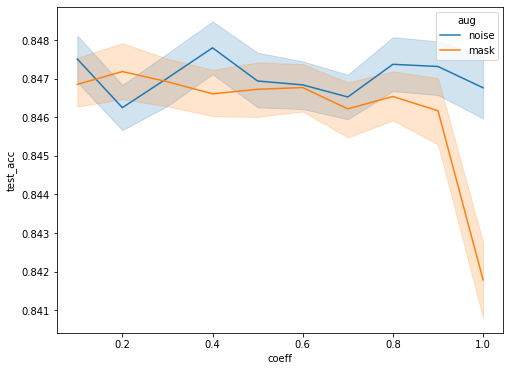

In [3]:
df_results = pd.read_csv("demo_augmentation_method_microarray.csv")
df_le = (
    df_results.sort_values(by=["id", "epoch"], ascending=[False, False])
    .groupby("id", as_index=False)
    .first()
)
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_le, x="coeff", y
             ="test_acc", hue="aug")

# Batch size SwAV

In [7]:
name = "demo_batch_size_swav_microarray_16"
logger = LogResults(name, ["bs"])

batch_sizes = [16, 32, 64, 128, 256]

for i in range(5):
    for bs in batch_sizes:
        
        logger.update_hyps([bs])
        
        config_swav = {
            "epochs": 200,
            "lr_init": 0.0001,
            "early_stop": 5,
            "coeff": 0.6,
        }
        
        # SwAV training
        
        idx = generate_indices(dataset)
        dataloaders = get_dataloaders(cancer_dataset, idx, [bs, 256, 256])
        net_swav = NetSwav(input_dim, nproto=16).to(device)
        train_swav_tcga(config_swav, dataloaders, net_swav, device, config_swav["early_stop"], eps=0.05)
        torch.save(net_swav.state_dict(), "data/s12/swav_state_dict_ma_0.pt")
        
        # Finetuning and evaluation
        
        idx = generate_indices(dataset, prop=0.03)
        base_bs = 256
        margin = 0.5
        bs = round(len(idx[0]) / (len(idx[0]) // base_bs + margin))
        dataloaders = get_dataloaders(cancer_dataset, idx, [bs, bs, bs])
        
        config_nn = {
            "epochs": 200,
            "lr_init": 0.001,
            "early_stop": 5,
        }
        
        for j in range(10):
            net = Net(input_dim, output_dim).to(device)
            transfer_weights(net, f"data/s12/swav_state_dict_ma_0.pt")
            train_nn(config_nn, dataloaders, net, weights=None, early_stop=config_nn["early_stop"], log=False, logger=logger, binary=True)
            logger.next_run()
            logger.show_progression()
            
        logger.save_csv()

21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/200 | SwAVTrainLoss=0.9789 | SwAVEvalLoss=0.5436 |
| Epoch:   2/200 | SwAVTrainLoss=0.7245 | SwAVEvalLoss=0.4799 |
| Epoch:   3/200 | SwAVTrainLoss=0.6493 | SwAVEvalLoss=0.4042 |
| Epoch:   4/200 | SwAVTrainLoss=0.6064 | SwAVEvalLoss=0.4068 |
| Epoch:   5/200 | SwAVTrainLoss=0.5736 | SwAVEvalLoss=0.3561 |
| Epoch:   6/200 | SwAVTrainLoss=0.5661 | SwAVEvalLoss=0.3560 |
| Epoch:   7/200 | SwAVTrainLoss=0.5523 | SwAVEvalLoss=0.3363 |
INFO: Early stopping counter 1 of 5
| Epoch:   8/200 | SwAVTrainLoss=0.5299 | SwAVEvalLoss=0.3726 |
INFO: Early stopping counter 2 of 5
| Epoch:   9/200 | SwAVTrainLoss=0.5262 | SwAVEvalLoss=0.3502 |
| Epoch:  10/200 | SwAVTrainLoss=0.5051 | SwAVEvalLoss=0.3091 |
INFO: Early stopping counter 1 of 5
| Epoch:  11/200 | SwAVTrainLoss=0.5107 | SwAVEvalLoss=0.3163 |
INFO: Early stopping counter 2 of 5
| Epoch:  12/200 | SwAVTrainLoss=0

| Epoch:  11/200 | SwAVTrainLoss=0.3016 | SwAVEvalLoss=0.2494 |
INFO: Early stopping counter 1 of 5
| Epoch:  12/200 | SwAVTrainLoss=0.2911 | SwAVEvalLoss=0.2526 |
| Epoch:  13/200 | SwAVTrainLoss=0.2886 | SwAVEvalLoss=0.2387 |
INFO: Early stopping counter 1 of 5
| Epoch:  14/200 | SwAVTrainLoss=0.2760 | SwAVEvalLoss=0.2463 |
INFO: Early stopping counter 2 of 5
| Epoch:  15/200 | SwAVTrainLoss=0.2786 | SwAVEvalLoss=0.2459 |
| Epoch:  16/200 | SwAVTrainLoss=0.2723 | SwAVEvalLoss=0.2224 |
| Epoch:  17/200 | SwAVTrainLoss=0.2696 | SwAVEvalLoss=0.2189 |
INFO: Early stopping counter 1 of 5
| Epoch:  18/200 | SwAVTrainLoss=0.2705 | SwAVEvalLoss=0.2234 |
INFO: Early stopping counter 2 of 5
| Epoch:  19/200 | SwAVTrainLoss=0.2623 | SwAVEvalLoss=0.2389 |
INFO: Early stopping counter 3 of 5
| Epoch:  20/200 | SwAVTrainLoss=0.2681 | SwAVEvalLoss=0.2277 |
INFO: Early stopping counter 4 of 5
| Epoch:  21/200 | SwAVTrainLoss=0.2623 | SwAVEvalLoss=0.2404 |
| Epoch:  22/200 | SwAVTrainLoss=0.2590 | Sw


Iteration 23, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss  bs
490  run-22    14  0.846250  0.448491  0.846564   0.450568  64
491  run-22    15  0.845309  0.444462  0.844995   0.446955  64
492  run-22    16  0.844995  0.445845  0.844368   0.444540  64
493  run-22    17  0.845309  0.446073  0.847819   0.447070  64
494  run-22    18  0.846564  0.449508  0.846878   0.448741  64

Iteration 24, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss  bs
505  run-23    10  0.844368  0.455265  0.839661   0.460453  64
506  run-23    11  0.844995  0.446832  0.840602   0.456432  64
507  run-23    12  0.839034  0.452344  0.841544   0.450628  64
508  run-23    13  0.841544  0.445972  0.846250   0.444374  64
509  run-23    14  0.842485  0.452370  0.847192   0.449582  64

Iteration 25, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss  bs
525  run-24    15  0.844995  0.444129  0.85095


Iteration 40, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss   bs
806  run-39    13  0.848447  0.439081  0.843113   0.442469  128
807  run-39    14  0.846250  0.436318  0.844368   0.435930  128
808  run-39    15  0.844995  0.433860  0.846564   0.434330  128
809  run-39    16  0.846564  0.428937  0.848133   0.427325  128
810  run-39    17  0.844682  0.432229  0.845623   0.429179  128
21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/200 | SwAVTrainLoss=0.9835 | SwAVEvalLoss=0.3188 |
| Epoch:   2/200 | SwAVTrainLoss=0.2433 | SwAVEvalLoss=0.1808 |
| Epoch:   3/200 | SwAVTrainLoss=0.1808 | SwAVEvalLoss=0.1580 |
| Epoch:   4/200 | SwAVTrainLoss=0.1476 | SwAVEvalLoss=0.1300 |
| Epoch:   5/200 | SwAVTrainLoss=0.1240 | SwAVEvalLoss=0.1293 |
| Epoch:   6/200 | SwAVTrainLoss=0.1256 | SwAVEvalLoss=0.1278 |
| Epoch:   7/200 | SwAVTrainLoss=0.1190 | SwAVEvalLoss=0.1263 |
| Epo

INFO: Early stopping counter 2 of 5
| Epoch:  18/200 | SwAVTrainLoss=0.4686 | SwAVEvalLoss=0.2805 |
INFO: Early stopping counter 3 of 5
| Epoch:  19/200 | SwAVTrainLoss=0.4564 | SwAVEvalLoss=0.2700 |
INFO: Early stopping counter 4 of 5
| Epoch:  20/200 | SwAVTrainLoss=0.4582 | SwAVEvalLoss=0.2837 |
INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 51, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  bs
1023  run-50    13  0.838406  0.443085  0.831503   0.457287  16
1024  run-50    14  0.839661  0.445075  0.839034   0.448281  16
1025  run-50    15  0.838092  0.451106  0.840289   0.448110  16
1026  run-50    16  0.835582  0.452812  0.842171   0.453780  16
1027  run-50    17  0.838720  0.461062  0.840916   0.454584  16

Iteration 52, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  tes


Iteration 62, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  bs
1222  run-61    19  0.848761  0.453537  0.844995   0.453698  32
1223  run-61    20  0.849388  0.455375  0.844682   0.453697  32
1224  run-61    21  0.849074  0.462706  0.844995   0.462106  32
1225  run-61    22  0.848133  0.467962  0.844995   0.464069  32
1226  run-61    23  0.847192  0.467722  0.845623   0.463694  32

Iteration 63, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  bs
1242  run-62    15  0.845309  0.431970  0.847192   0.437026  32
1243  run-62    16  0.842799  0.440808  0.844054   0.437581  32
1244  run-62    17  0.842799  0.443040  0.844995   0.438318  32
1245  run-62    18  0.842485  0.443743  0.848133   0.440070  32
1246  run-62    19  0.842485  0.442973  0.844682   0.440345  32

Iteration 64, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  bs
1275  run-63    28  0.850643  0.4


Iteration 77, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  bs
1519  run-76    13  0.846878  0.433488  0.845937   0.438783  64
1520  run-76    14  0.847819  0.434514  0.844995   0.441586  64
1521  run-76    15  0.848133  0.437066  0.848761   0.439996  64
1522  run-76    16  0.847819  0.438907  0.849074   0.444020  64
1523  run-76    17  0.845937  0.448059  0.849388   0.449025  64

Iteration 78, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  bs
1536  run-77    12  0.839975  0.453122  0.840602   0.461574  64
1537  run-77    13  0.840602  0.455413  0.838406   0.458800  64
1538  run-77    14  0.840289  0.454112  0.839975   0.458279  64
1539  run-77    15  0.840602  0.450750  0.840602   0.455456  64
1540  run-77    16  0.842799  0.445681  0.839975   0.450809  64

Iteration 79, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss  bs
1557  run-78    16  0.847192  0.4

| Epoch:  13/200 | SwAVTrainLoss=0.1168 | SwAVEvalLoss=0.1094 |
INFO: Early stopping counter 1 of 5
| Epoch:  14/200 | SwAVTrainLoss=0.1183 | SwAVEvalLoss=0.1117 |
INFO: Early stopping counter 2 of 5
| Epoch:  15/200 | SwAVTrainLoss=0.1197 | SwAVEvalLoss=0.1116 |
| Epoch:  16/200 | SwAVTrainLoss=0.1009 | SwAVEvalLoss=0.1084 |
| Epoch:  17/200 | SwAVTrainLoss=0.1086 | SwAVEvalLoss=0.1072 |
INFO: Early stopping counter 1 of 5
| Epoch:  18/200 | SwAVTrainLoss=0.1079 | SwAVEvalLoss=0.1131 |
| Epoch:  19/200 | SwAVTrainLoss=0.1018 | SwAVEvalLoss=0.1029 |
| Epoch:  20/200 | SwAVTrainLoss=0.0953 | SwAVEvalLoss=0.0940 |
INFO: Early stopping counter 1 of 5
| Epoch:  21/200 | SwAVTrainLoss=0.0997 | SwAVEvalLoss=0.1092 |
INFO: Early stopping counter 2 of 5
| Epoch:  22/200 | SwAVTrainLoss=0.1017 | SwAVEvalLoss=0.1112 |
INFO: Early stopping counter 3 of 5
| Epoch:  23/200 | SwAVTrainLoss=0.1019 | SwAVEvalLoss=0.1125 |
INFO: Early stopping counter 4 of 5
| Epoch:  24/200 | SwAVTrainLoss=0.1121 | Sw


Iteration 104, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  bs
2027  run-103    12  0.840916  0.427500  0.830875   0.437155  16
2028  run-103    13  0.838406  0.437593  0.832444   0.447000  16
2029  run-103    14  0.839661  0.444698  0.834327   0.454933  16
2030  run-103    15  0.837151  0.440394  0.838092   0.447551  16
2031  run-103    16  0.838720  0.441414  0.839347   0.446975  16

Iteration 105, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  bs
2048  run-104    16  0.844682  0.439925  0.842171   0.449608  16
2049  run-104    17  0.843740  0.443988  0.843740   0.447796  16
2050  run-104    18  0.844368  0.439644  0.844054   0.447246  16
2051  run-104    19  0.842799  0.441209  0.843426   0.443455  16
2052  run-104    20  0.842485  0.440845  0.845623   0.441705  16

Iteration 106, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  bs
2073  run-105    


Iteration 117, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  bs
2321  run-116    14  0.844054  0.431881  0.844995   0.437960  32
2322  run-116    15  0.840289  0.440334  0.844995   0.440782  32
2323  run-116    16  0.840289  0.443797  0.845937   0.445078  32
2324  run-116    17  0.842171  0.445013  0.843740   0.445549  32
2325  run-116    18  0.843113  0.442122  0.845309   0.448358  32

Iteration 118, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  bs
2349  run-117    23  0.849702  0.452996  0.846564   0.440553  32
2350  run-117    24  0.850016  0.454547  0.845937   0.445178  32
2351  run-117    25  0.849702  0.454432  0.846878   0.446565  32
2352  run-117    26  0.849702  0.460396  0.846250   0.450964  32
2353  run-117    27  0.849388  0.463897  0.846250   0.452172  32

Iteration 119, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  bs
2377  run-118    


Iteration 130, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  bs
2586  run-129    14  0.847819  0.438250  0.843740   0.440168  64
2587  run-129    15  0.848447  0.440098  0.844682   0.441179  64
2588  run-129    16  0.848133  0.445848  0.846250   0.443685  64
2589  run-129    17  0.846564  0.453299  0.845937   0.449149  64
2590  run-129    18  0.848133  0.449481  0.846564   0.449047  64
21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/200 | SwAVTrainLoss=0.7425 | SwAVEvalLoss=0.2361 |
| Epoch:   2/200 | SwAVTrainLoss=0.2230 | SwAVEvalLoss=0.1702 |
| Epoch:   3/200 | SwAVTrainLoss=0.1754 | SwAVEvalLoss=0.1633 |
| Epoch:   4/200 | SwAVTrainLoss=0.1608 | SwAVEvalLoss=0.1439 |
| Epoch:   5/200 | SwAVTrainLoss=0.1503 | SwAVEvalLoss=0.1377 |
| Epoch:   6/200 | SwAVTrainLoss=0.1455 | SwAVEvalLoss=0.1541 |
| Epoch:   7/200 | SwAVTrainLoss=0.1496 | SwAVEvalLoss=0.1323 

INFO: Early stopping counter 2 of 5
| Epoch:  18/200 | SwAVTrainLoss=0.1127 | SwAVEvalLoss=0.1236 |
| Epoch:  19/200 | SwAVTrainLoss=0.1090 | SwAVEvalLoss=0.1090 |
INFO: Early stopping counter 1 of 5
| Epoch:  20/200 | SwAVTrainLoss=0.1130 | SwAVEvalLoss=0.1212 |
INFO: Early stopping counter 2 of 5
| Epoch:  21/200 | SwAVTrainLoss=0.1015 | SwAVEvalLoss=0.1165 |
| Epoch:  22/200 | SwAVTrainLoss=0.1093 | SwAVEvalLoss=0.1083 |
INFO: Early stopping counter 1 of 5
| Epoch:  23/200 | SwAVTrainLoss=0.1103 | SwAVEvalLoss=0.1147 |
INFO: Early stopping counter 2 of 5
| Epoch:  24/200 | SwAVTrainLoss=0.1107 | SwAVEvalLoss=0.1092 |
INFO: Early stopping counter 3 of 5
| Epoch:  25/200 | SwAVTrainLoss=0.1055 | SwAVEvalLoss=0.1110 |
INFO: Early stopping counter 4 of 5
| Epoch:  26/200 | SwAVTrainLoss=0.1024 | SwAVEvalLoss=0.1143 |
INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset


Iteration 154, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  bs
3064  run-153     9  0.842171  0.399721  0.837151   0.401011  16
3065  run-153    10  0.840289  0.407379  0.837151   0.406712  16
3066  run-153    11  0.841230  0.405865  0.837778   0.407200  16
3067  run-153    12  0.841230  0.409899  0.839347   0.409763  16
3068  run-153    13  0.839661  0.421095  0.840602   0.416720  16

Iteration 155, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  bs
3079  run-154    10  0.841544  0.397320  0.834013   0.408206  16
3080  run-154    11  0.841230  0.406208  0.834013   0.417047  16
3081  run-154    12  0.844054  0.419169  0.839975   0.425974  16
3082  run-154    13  0.842485  0.420920  0.841858   0.426481  16
3083  run-154    14  0.836523  0.426417  0.839347   0.430741  16

Iteration 156, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  bs
3102  run-155    


Iteration 170, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  bs
3404  run-169    25  0.846878  0.461671  0.848447   0.457736  32
3405  run-169    26  0.846564  0.467862  0.847505   0.467014  32
3406  run-169    27  0.846250  0.467024  0.847192   0.461614  32
3407  run-169    28  0.846250  0.470782  0.846564   0.466503  32
3408  run-169    29  0.845937  0.470543  0.846878   0.468561  32
21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/200 | SwAVTrainLoss=0.6508 | SwAVEvalLoss=0.2776 |
| Epoch:   2/200 | SwAVTrainLoss=0.3027 | SwAVEvalLoss=0.2354 |
| Epoch:   3/200 | SwAVTrainLoss=0.2833 | SwAVEvalLoss=0.2275 |
| Epoch:   4/200 | SwAVTrainLoss=0.2514 | SwAVEvalLoss=0.2092 |
| Epoch:   5/200 | SwAVTrainLoss=0.2465 | SwAVEvalLoss=0.2115 |
| Epoch:   6/200 | SwAVTrainLoss=0.2338 | SwAVEvalLoss=0.2102 |
| Epoch:   7/200 | SwAVTrainLoss=0.2333 | SwAVEvalLoss=0.2015 


Iteration 182, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   bs
3633  run-181    13  0.846250  0.433404  0.842171   0.438254  128
3634  run-181    14  0.847505  0.431798  0.843113   0.442167  128
3635  run-181    15  0.847505  0.433934  0.846250   0.439764  128
3636  run-181    16  0.845937  0.440422  0.847505   0.440804  128
3637  run-181    17  0.845309  0.435542  0.846878   0.440153  128

Iteration 183, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   bs
3652  run-182    14  0.850643  0.438513  0.849388   0.442167  128
3653  run-182    15  0.852212  0.435979  0.848447   0.443596  128
3654  run-182    16  0.850016  0.439259  0.845309   0.447715  128
3655  run-182    17  0.851585  0.439633  0.844054   0.441682  128
3656  run-182    18  0.850957  0.439036  0.845623   0.442439  128

Iteration 184, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   bs
3670


Iteration 197, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   bs
3934  run-196    13  0.842171  0.446384  0.844682   0.443672  256
3935  run-196    14  0.841544  0.442928  0.844368   0.438766  256
3936  run-196    15  0.840289  0.443889  0.844368   0.444315  256
3937  run-196    16  0.842171  0.440712  0.844995   0.435398  256
3938  run-196    17  0.844054  0.437848  0.844995   0.440382  256

Iteration 198, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   bs
3948  run-197     9  0.846250  0.422468  0.848133   0.430025  256
3949  run-197    10  0.840916  0.423724  0.846564   0.427273  256
3950  run-197    11  0.843426  0.425039  0.843740   0.426562  256
3951  run-197    12  0.844682  0.431302  0.846250   0.431438  256
3952  run-197    13  0.844682  0.433897  0.844054   0.438013  256

Iteration 199, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   bs
3970

| Epoch:   4/200 | SwAVTrainLoss=0.3905 | SwAVEvalLoss=0.3007 |
| Epoch:   5/200 | SwAVTrainLoss=0.3576 | SwAVEvalLoss=0.2692 |
| Epoch:   6/200 | SwAVTrainLoss=0.3455 | SwAVEvalLoss=0.2574 |
| Epoch:   7/200 | SwAVTrainLoss=0.3329 | SwAVEvalLoss=0.2608 |
| Epoch:   8/200 | SwAVTrainLoss=0.3249 | SwAVEvalLoss=0.2349 |
INFO: Early stopping counter 1 of 5
| Epoch:   9/200 | SwAVTrainLoss=0.3133 | SwAVEvalLoss=0.2580 |
INFO: Early stopping counter 2 of 5
| Epoch:  10/200 | SwAVTrainLoss=0.3125 | SwAVEvalLoss=0.2726 |
INFO: Early stopping counter 3 of 5
| Epoch:  11/200 | SwAVTrainLoss=0.2989 | SwAVEvalLoss=0.2490 |
INFO: Early stopping counter 4 of 5
| Epoch:  12/200 | SwAVTrainLoss=0.2931 | SwAVEvalLoss=0.2574 |
| Epoch:  13/200 | SwAVTrainLoss=0.2961 | SwAVEvalLoss=0.2282 |
| Epoch:  14/200 | SwAVTrainLoss=0.2772 | SwAVEvalLoss=0.2279 |
| Epoch:  15/200 | SwAVTrainLoss=0.2784 | SwAVEvalLoss=0.2228 |
INFO: Early stopping counter 1 of 5
| Epoch:  16/200 | SwAVTrainLoss=0.2728 | SwAVEvalLo

| Epoch:  13/200 | SwAVTrainLoss=0.2022 | SwAVEvalLoss=0.1991 |
INFO: Early stopping counter 1 of 5
| Epoch:  14/200 | SwAVTrainLoss=0.2077 | SwAVEvalLoss=0.2046 |
| Epoch:  15/200 | SwAVTrainLoss=0.2000 | SwAVEvalLoss=0.1951 |
INFO: Early stopping counter 1 of 5
| Epoch:  16/200 | SwAVTrainLoss=0.1939 | SwAVEvalLoss=0.1987 |
INFO: Early stopping counter 2 of 5
| Epoch:  17/200 | SwAVTrainLoss=0.2029 | SwAVEvalLoss=0.2054 |
| Epoch:  18/200 | SwAVTrainLoss=0.1942 | SwAVEvalLoss=0.1852 |
| Epoch:  19/200 | SwAVTrainLoss=0.1975 | SwAVEvalLoss=0.1835 |
| Epoch:  20/200 | SwAVTrainLoss=0.1932 | SwAVEvalLoss=0.1822 |
| Epoch:  21/200 | SwAVTrainLoss=0.1848 | SwAVEvalLoss=0.1821 |
INFO: Early stopping counter 1 of 5
| Epoch:  22/200 | SwAVTrainLoss=0.1914 | SwAVEvalLoss=0.1835 |
| Epoch:  23/200 | SwAVTrainLoss=0.1887 | SwAVEvalLoss=0.1784 |
INFO: Early stopping counter 1 of 5
| Epoch:  24/200 | SwAVTrainLoss=0.1856 | SwAVEvalLoss=0.1862 |
INFO: Early stopping counter 2 of 5
| Epoch:  25/200


Iteration 232, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   bs
4637  run-231    17  0.848447  0.436834  0.849074   0.429156  128
4638  run-231    18  0.846250  0.438613  0.850643   0.431950  128
4639  run-231    19  0.846250  0.440838  0.850643   0.432670  128
4640  run-231    20  0.846878  0.441641  0.849702   0.436980  128
4641  run-231    21  0.848133  0.443022  0.849388   0.433480  128

Iteration 233, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   bs
4657  run-232    15  0.850016  0.430976  0.848133   0.430013  128
4658  run-232    16  0.848133  0.427392  0.848761   0.428820  128
4659  run-232    17  0.849074  0.431009  0.847505   0.427906  128
4660  run-232    18  0.847505  0.431878  0.846878   0.435046  128
4661  run-232    19  0.846878  0.433733  0.846564   0.435567  128

Iteration 234, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   bs
4672


Iteration 247, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   bs
4929  run-246    10  0.843426  0.438150  0.844054   0.445881  256
4930  run-246    11  0.844368  0.435873  0.845309   0.439338  256
4931  run-246    12  0.842171  0.441889  0.847192   0.442625  256
4932  run-246    13  0.839661  0.438139  0.846250   0.439519  256
4933  run-246    14  0.845309  0.432271  0.844682   0.437997  256

Iteration 248, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   bs
4944  run-247    10  0.844054  0.466338  0.843740   0.471871  256
4945  run-247    11  0.844368  0.449241  0.844054   0.453878  256
4946  run-247    12  0.842799  0.442768  0.841230   0.446188  256
4947  run-247    13  0.841858  0.442939  0.844368   0.444802  256
4948  run-247    14  0.844995  0.440658  0.845937   0.445657  256

Iteration 249, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   bs
4963

<AxesSubplot:xlabel='bs', ylabel='test_acc'>

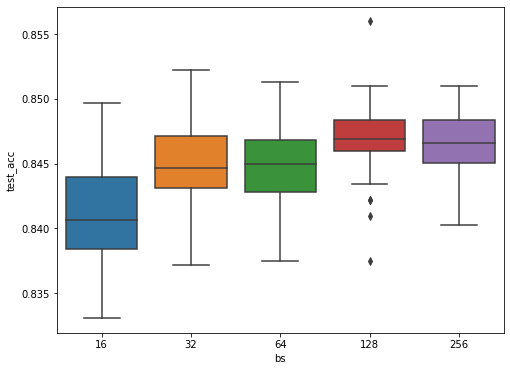

In [9]:
df_results = pd.read_csv("demo_batch_size_swav_microarray_16.csv")
df_le = (
    df_results.sort_values(by=["id", "epoch"], ascending=[False, False])
    .groupby("id", as_index=False)
    .first()
)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_le, x="bs", y="test_acc")

# Epochs number SwAV

In [ ]:
name = "demo_nepochs_swav_microarray"
logger = LogResults(name, ["nepochs"])

maxepochs = [4, 8, 16, 32, 64, 128, 256]

for i in range(5):
    for nepochs in maxepochs:
        
        logger.update_hyps([nepochs])
        
        config_swav = {
            "epochs": nepochs,
            "lr_init": 0.0001,
            "early_stop": 0,
            "coeff": 0.6,
        }
        
        # SwAV training
        
        idx = generate_indices(dataset)
        dataloaders = get_dataloaders(cancer_dataset, idx, [256, 256, 256])
        net_swav = NetSwav(input_dim, nproto=60).to(device)
        train_swav_tcga(config_swav, dataloaders, net_swav, device, config_swav["early_stop"], eps=0.05)
        torch.save(net_swav.state_dict(), "data/s12/swav_state_dict_ma_0.pt")
        
        # Finetuning and evaluation
        
        idx = generate_indices(dataset, prop=0.03)
        base_bs = 256
        margin = 0.5
        bs = round(len(idx[0]) / (len(idx[0]) // base_bs + margin))
        dataloaders = get_dataloaders(cancer_dataset, idx, [bs, bs, bs])
        
        config_nn = {
            "epochs": 200,
            "lr_init": 0.001,
            "early_stop": 5,
        }
        
        for j in range(10):
            net = Net(input_dim, output_dim).to(device)
            transfer_weights(net, f"data/s12/swav_state_dict_ma_0.pt")
            train_nn(config_nn, dataloaders, net, weights=None, early_stop=config_nn["early_stop"], log=False, logger=logger, binary=True)
            logger.next_run()
            logger.show_progression()
            
        logger.save_csv()

21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/4 | SwAVTrainLoss=2.3276 | SwAVEvalLoss=1.2947 |
| Epoch:   2/4 | SwAVTrainLoss=0.9695 | SwAVEvalLoss=0.7776 |
| Epoch:   3/4 | SwAVTrainLoss=0.6688 | SwAVEvalLoss=0.6588 |
| Epoch:   4/4 | SwAVTrainLoss=0.5757 | SwAVEvalLoss=0.5557 |
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 1, below are the last 5 epochs :
       id epoch   val_acc  val_loss  test_acc  test_loss nepochs
13  run-0    13  0.850329  0.447230  0.844682   0.445011       4
14  run-0    14  0.848133  0.439309  0.844682   0.436815       4
15  run-0    15  0.844682  0.431528  0.845623   0.428870       4
16  run-0    16  0.847819  0.429642  0.845309   0.425707       4
17  run-0    17  0.848447  0.427479  0.845937   0.424910       4

Iteration 2, below are the last 5 epochs :
       id epoch   val_acc  val_loss  tes


Iteration 17, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss nepochs
313  run-16    17  0.850957  0.423116  0.854409   0.421587       8
314  run-16    18  0.848761  0.427632  0.850957   0.416297       8
315  run-16    19  0.848133  0.429298  0.848133   0.419208       8
316  run-16    20  0.848761  0.427885  0.847819   0.419716       8
317  run-16    21  0.850329  0.429719  0.844995   0.425896       8

Iteration 18, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss nepochs
328  run-17    10  0.845309  0.450446  0.839975   0.462272       8
329  run-17    11  0.843113  0.446040  0.842171   0.447677       8
330  run-17    12  0.843426  0.436998  0.843113   0.443437       8
331  run-17    13  0.843426  0.430219  0.844682   0.430465       8
332  run-17    14  0.845309  0.424912  0.845937   0.424547       8

Iteration 19, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss ne

| Epoch:  11/32 | SwAVTrainLoss=0.4160 | SwAVEvalLoss=0.4845 |
| Epoch:  12/32 | SwAVTrainLoss=0.4013 | SwAVEvalLoss=0.4371 |
| Epoch:  13/32 | SwAVTrainLoss=0.3972 | SwAVEvalLoss=0.4760 |
| Epoch:  14/32 | SwAVTrainLoss=0.3857 | SwAVEvalLoss=0.4444 |
| Epoch:  15/32 | SwAVTrainLoss=0.3903 | SwAVEvalLoss=0.4848 |
| Epoch:  16/32 | SwAVTrainLoss=0.3904 | SwAVEvalLoss=0.4638 |
| Epoch:  17/32 | SwAVTrainLoss=0.3804 | SwAVEvalLoss=0.4379 |
| Epoch:  18/32 | SwAVTrainLoss=0.3913 | SwAVEvalLoss=0.4370 |
| Epoch:  19/32 | SwAVTrainLoss=0.3674 | SwAVEvalLoss=0.4530 |
| Epoch:  20/32 | SwAVTrainLoss=0.3755 | SwAVEvalLoss=0.4380 |
| Epoch:  21/32 | SwAVTrainLoss=0.3637 | SwAVEvalLoss=0.4341 |
| Epoch:  22/32 | SwAVTrainLoss=0.3768 | SwAVEvalLoss=0.4305 |
| Epoch:  23/32 | SwAVTrainLoss=0.3633 | SwAVEvalLoss=0.4155 |
| Epoch:  24/32 | SwAVTrainLoss=0.3683 | SwAVEvalLoss=0.4378 |
| Epoch:  25/32 | SwAVTrainLoss=0.3608 | SwAVEvalLoss=0.4006 |
| Epoch:  26/32 | SwAVTrainLoss=0.3655 | SwAVEvalLoss=0

| Epoch:  35/64 | SwAVTrainLoss=0.3509 | SwAVEvalLoss=0.3953 |
| Epoch:  36/64 | SwAVTrainLoss=0.3223 | SwAVEvalLoss=0.3672 |
| Epoch:  37/64 | SwAVTrainLoss=0.3429 | SwAVEvalLoss=0.4091 |
| Epoch:  38/64 | SwAVTrainLoss=0.3408 | SwAVEvalLoss=0.4199 |
| Epoch:  39/64 | SwAVTrainLoss=0.3298 | SwAVEvalLoss=0.4052 |
| Epoch:  40/64 | SwAVTrainLoss=0.3512 | SwAVEvalLoss=0.4166 |
| Epoch:  41/64 | SwAVTrainLoss=0.3430 | SwAVEvalLoss=0.4020 |
| Epoch:  42/64 | SwAVTrainLoss=0.3453 | SwAVEvalLoss=0.3940 |
| Epoch:  43/64 | SwAVTrainLoss=0.3284 | SwAVEvalLoss=0.4248 |
| Epoch:  44/64 | SwAVTrainLoss=0.3317 | SwAVEvalLoss=0.4131 |
| Epoch:  45/64 | SwAVTrainLoss=0.3278 | SwAVEvalLoss=0.3644 |
| Epoch:  46/64 | SwAVTrainLoss=0.3329 | SwAVEvalLoss=0.3831 |
| Epoch:  47/64 | SwAVTrainLoss=0.3337 | SwAVEvalLoss=0.3728 |
| Epoch:  48/64 | SwAVTrainLoss=0.3347 | SwAVEvalLoss=0.3646 |
| Epoch:  49/64 | SwAVTrainLoss=0.3265 | SwAVEvalLoss=0.3990 |
| Epoch:  50/64 | SwAVTrainLoss=0.3263 | SwAVEvalLoss=0

| Epoch:  26/128 | SwAVTrainLoss=0.3419 | SwAVEvalLoss=0.3931 |
| Epoch:  27/128 | SwAVTrainLoss=0.3475 | SwAVEvalLoss=0.3720 |
| Epoch:  28/128 | SwAVTrainLoss=0.3531 | SwAVEvalLoss=0.3791 |
| Epoch:  29/128 | SwAVTrainLoss=0.3612 | SwAVEvalLoss=0.3730 |
| Epoch:  30/128 | SwAVTrainLoss=0.3543 | SwAVEvalLoss=0.3641 |
| Epoch:  31/128 | SwAVTrainLoss=0.3520 | SwAVEvalLoss=0.3596 |
| Epoch:  32/128 | SwAVTrainLoss=0.3547 | SwAVEvalLoss=0.4168 |
| Epoch:  33/128 | SwAVTrainLoss=0.3312 | SwAVEvalLoss=0.3911 |
| Epoch:  34/128 | SwAVTrainLoss=0.3337 | SwAVEvalLoss=0.3618 |
| Epoch:  35/128 | SwAVTrainLoss=0.3272 | SwAVEvalLoss=0.3951 |
| Epoch:  36/128 | SwAVTrainLoss=0.3402 | SwAVEvalLoss=0.3732 |
| Epoch:  37/128 | SwAVTrainLoss=0.3349 | SwAVEvalLoss=0.3774 |
| Epoch:  38/128 | SwAVTrainLoss=0.3397 | SwAVEvalLoss=0.3986 |
| Epoch:  39/128 | SwAVTrainLoss=0.3410 | SwAVEvalLoss=0.3483 |
| Epoch:  40/128 | SwAVTrainLoss=0.3213 | SwAVEvalLoss=0.3600 |
| Epoch:  41/128 | SwAVTrainLoss=0.3334 


Iteration 55, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss nepochs
1081  run-54    13  0.847192  0.424709  0.846564   0.421859     128
1082  run-54    14  0.847192  0.423416  0.844054   0.418191     128
1083  run-54    15  0.846250  0.419423  0.843740   0.419400     128
1084  run-54    16  0.846250  0.421731  0.844368   0.422190     128
1085  run-54    17  0.848447  0.427587  0.844995   0.427325     128

Iteration 56, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss nepochs
1105  run-55    19  0.852212  0.422665  0.846878   0.429490     128
1106  run-55    20  0.851271  0.428587  0.845937   0.429816     128
1107  run-55    21  0.850329  0.432388  0.844682   0.436695     128
1108  run-55    22  0.849074  0.432217  0.845309   0.438315     128
1109  run-55    23  0.847505  0.437912  0.844054   0.438042     128

Iteration 57, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc 

| Epoch:  85/256 | SwAVTrainLoss=0.3076 | SwAVEvalLoss=0.4044 |
| Epoch:  86/256 | SwAVTrainLoss=0.3280 | SwAVEvalLoss=0.3784 |
| Epoch:  87/256 | SwAVTrainLoss=0.3103 | SwAVEvalLoss=0.3681 |
| Epoch:  88/256 | SwAVTrainLoss=0.3108 | SwAVEvalLoss=0.3385 |
| Epoch:  89/256 | SwAVTrainLoss=0.3044 | SwAVEvalLoss=0.3872 |
| Epoch:  90/256 | SwAVTrainLoss=0.3050 | SwAVEvalLoss=0.3779 |
| Epoch:  91/256 | SwAVTrainLoss=0.3008 | SwAVEvalLoss=0.3464 |
| Epoch:  92/256 | SwAVTrainLoss=0.3022 | SwAVEvalLoss=0.3577 |
| Epoch:  93/256 | SwAVTrainLoss=0.2939 | SwAVEvalLoss=0.3782 |
| Epoch:  94/256 | SwAVTrainLoss=0.3000 | SwAVEvalLoss=0.3937 |
| Epoch:  95/256 | SwAVTrainLoss=0.2820 | SwAVEvalLoss=0.3483 |
| Epoch:  96/256 | SwAVTrainLoss=0.2998 | SwAVEvalLoss=0.3501 |
| Epoch:  97/256 | SwAVTrainLoss=0.2866 | SwAVEvalLoss=0.3660 |
| Epoch:  98/256 | SwAVTrainLoss=0.3020 | SwAVEvalLoss=0.3392 |
| Epoch:  99/256 | SwAVTrainLoss=0.2930 | SwAVEvalLoss=0.3625 |
| Epoch: 100/256 | SwAVTrainLoss=0.2859 

| Epoch: 214/256 | SwAVTrainLoss=0.2385 | SwAVEvalLoss=0.3048 |
| Epoch: 215/256 | SwAVTrainLoss=0.2393 | SwAVEvalLoss=0.3847 |
| Epoch: 216/256 | SwAVTrainLoss=0.2389 | SwAVEvalLoss=0.3716 |
| Epoch: 217/256 | SwAVTrainLoss=0.2401 | SwAVEvalLoss=0.3435 |
| Epoch: 218/256 | SwAVTrainLoss=0.2335 | SwAVEvalLoss=0.4235 |
| Epoch: 219/256 | SwAVTrainLoss=0.2402 | SwAVEvalLoss=0.3704 |
| Epoch: 220/256 | SwAVTrainLoss=0.2322 | SwAVEvalLoss=0.3165 |
| Epoch: 221/256 | SwAVTrainLoss=0.2378 | SwAVEvalLoss=0.3318 |
| Epoch: 222/256 | SwAVTrainLoss=0.2399 | SwAVEvalLoss=0.3322 |
| Epoch: 223/256 | SwAVTrainLoss=0.2391 | SwAVEvalLoss=0.3550 |
| Epoch: 224/256 | SwAVTrainLoss=0.2372 | SwAVEvalLoss=0.3701 |
| Epoch: 225/256 | SwAVTrainLoss=0.2302 | SwAVEvalLoss=0.3117 |
| Epoch: 226/256 | SwAVTrainLoss=0.2356 | SwAVEvalLoss=0.3644 |
| Epoch: 227/256 | SwAVTrainLoss=0.2354 | SwAVEvalLoss=0.3352 |
| Epoch: 228/256 | SwAVTrainLoss=0.2406 | SwAVEvalLoss=0.3592 |
| Epoch: 229/256 | SwAVTrainLoss=0.2297 


Iteration 72, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss nepochs
1392  run-71    13  0.845309  0.435481  0.845937   0.439860       4
1393  run-71    14  0.846250  0.436005  0.844368   0.436574       4
1394  run-71    15  0.847819  0.432479  0.844682   0.430599       4
1395  run-71    16  0.848133  0.427463  0.844682   0.430739       4
1396  run-71    17  0.848761  0.424155  0.844682   0.426009       4

Iteration 73, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss nepochs
1418  run-72    21  0.845937  0.443274  0.847505   0.435850       4
1419  run-72    22  0.846250  0.447991  0.846564   0.436735       4
1420  run-72    23  0.846564  0.451234  0.847505   0.442176       4
1421  run-72    24  0.847192  0.451134  0.847505   0.444987       4
1422  run-72    25  0.847192  0.448252  0.846250   0.442562       4

Iteration 74, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc 


Iteration 89, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss nepochs
1772  run-88    11  0.843426  0.443406  0.844368   0.450478       8
1773  run-88    12  0.841544  0.438452  0.847505   0.441298       8
1774  run-88    13  0.845309  0.430192  0.847192   0.431720       8
1775  run-88    14  0.846564  0.424779  0.845623   0.429609       8
1776  run-88    15  0.844682  0.422291  0.843113   0.429607       8

Iteration 90, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss nepochs
1787  run-89    10  0.844995  0.461091  0.841230   0.469544       8
1788  run-89    11  0.842799  0.465858  0.844682   0.471631       8
1789  run-89    12  0.844995  0.464186  0.847505   0.463153       8
1790  run-89    13  0.842485  0.454636  0.850016   0.449586       8
1791  run-89    14  0.844368  0.443418  0.848447   0.440718       8
21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 

| Epoch:  24/32 | SwAVTrainLoss=0.3612 | SwAVEvalLoss=0.4554 |
| Epoch:  25/32 | SwAVTrainLoss=0.3697 | SwAVEvalLoss=0.4167 |
| Epoch:  26/32 | SwAVTrainLoss=0.3609 | SwAVEvalLoss=0.4465 |
| Epoch:  27/32 | SwAVTrainLoss=0.3550 | SwAVEvalLoss=0.4550 |
| Epoch:  28/32 | SwAVTrainLoss=0.3481 | SwAVEvalLoss=0.4164 |
| Epoch:  29/32 | SwAVTrainLoss=0.3651 | SwAVEvalLoss=0.4135 |
| Epoch:  30/32 | SwAVTrainLoss=0.3533 | SwAVEvalLoss=0.3990 |
| Epoch:  31/32 | SwAVTrainLoss=0.3432 | SwAVEvalLoss=0.4249 |
| Epoch:  32/32 | SwAVTrainLoss=0.3342 | SwAVEvalLoss=0.4169 |
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 101, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss nepochs
2018  run-100    12  0.848133  0.421126  0.844682   0.427711      32
2019  run-100    13  0.847819  0.424387  0.848447   0.431187      32
2020  run-100    14  0.846564  0.425572  0.847192   0.427531    

| Epoch:  46/64 | SwAVTrainLoss=0.3232 | SwAVEvalLoss=0.4075 |
| Epoch:  47/64 | SwAVTrainLoss=0.3109 | SwAVEvalLoss=0.3695 |
| Epoch:  48/64 | SwAVTrainLoss=0.3243 | SwAVEvalLoss=0.3262 |
| Epoch:  49/64 | SwAVTrainLoss=0.3202 | SwAVEvalLoss=0.3156 |
| Epoch:  50/64 | SwAVTrainLoss=0.3245 | SwAVEvalLoss=0.3633 |
| Epoch:  51/64 | SwAVTrainLoss=0.3210 | SwAVEvalLoss=0.3544 |
| Epoch:  52/64 | SwAVTrainLoss=0.3300 | SwAVEvalLoss=0.4153 |
| Epoch:  53/64 | SwAVTrainLoss=0.3166 | SwAVEvalLoss=0.3600 |
| Epoch:  54/64 | SwAVTrainLoss=0.3199 | SwAVEvalLoss=0.3588 |
| Epoch:  55/64 | SwAVTrainLoss=0.3130 | SwAVEvalLoss=0.3873 |
| Epoch:  56/64 | SwAVTrainLoss=0.3040 | SwAVEvalLoss=0.4012 |
| Epoch:  57/64 | SwAVTrainLoss=0.3093 | SwAVEvalLoss=0.3620 |
| Epoch:  58/64 | SwAVTrainLoss=0.3203 | SwAVEvalLoss=0.3624 |
| Epoch:  59/64 | SwAVTrainLoss=0.3108 | SwAVEvalLoss=0.4156 |
| Epoch:  60/64 | SwAVTrainLoss=0.2996 | SwAVEvalLoss=0.3755 |
| Epoch:  61/64 | SwAVTrainLoss=0.3021 | SwAVEvalLoss=0

| Epoch:  35/128 | SwAVTrainLoss=0.3454 | SwAVEvalLoss=0.3866 |
| Epoch:  36/128 | SwAVTrainLoss=0.3385 | SwAVEvalLoss=0.3737 |
| Epoch:  37/128 | SwAVTrainLoss=0.3285 | SwAVEvalLoss=0.3416 |
| Epoch:  38/128 | SwAVTrainLoss=0.3380 | SwAVEvalLoss=0.3424 |
| Epoch:  39/128 | SwAVTrainLoss=0.3237 | SwAVEvalLoss=0.3751 |
| Epoch:  40/128 | SwAVTrainLoss=0.3367 | SwAVEvalLoss=0.3423 |
| Epoch:  41/128 | SwAVTrainLoss=0.3470 | SwAVEvalLoss=0.3951 |
| Epoch:  42/128 | SwAVTrainLoss=0.3434 | SwAVEvalLoss=0.4140 |
| Epoch:  43/128 | SwAVTrainLoss=0.3267 | SwAVEvalLoss=0.3852 |
| Epoch:  44/128 | SwAVTrainLoss=0.3274 | SwAVEvalLoss=0.4222 |
| Epoch:  45/128 | SwAVTrainLoss=0.3250 | SwAVEvalLoss=0.3179 |
| Epoch:  46/128 | SwAVTrainLoss=0.3159 | SwAVEvalLoss=0.3558 |
| Epoch:  47/128 | SwAVTrainLoss=0.3120 | SwAVEvalLoss=0.4030 |
| Epoch:  48/128 | SwAVTrainLoss=0.3108 | SwAVEvalLoss=0.3801 |
| Epoch:  49/128 | SwAVTrainLoss=0.3228 | SwAVEvalLoss=0.3725 |
| Epoch:  50/128 | SwAVTrainLoss=0.3147 


Iteration 126, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss nepochs
2481  run-125    12  0.847192  0.416059  0.851271   0.421132     128
2482  run-125    13  0.847505  0.418884  0.849702   0.423101     128
2483  run-125    14  0.847505  0.418017  0.850329   0.418191     128
2484  run-125    15  0.845937  0.418366  0.849388   0.419544     128
2485  run-125    16  0.847192  0.420607  0.848133   0.423262     128

Iteration 127, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss nepochs
2496  run-126    10  0.843113  0.432045  0.845623   0.444069     128
2497  run-126    11  0.841858  0.441656  0.846250   0.449293     128
2498  run-126    12  0.842485  0.441928  0.843113   0.445237     128
2499  run-126    13  0.841544  0.451244  0.844682   0.447588     128
2500  run-126    14  0.840602  0.446338  0.843113   0.445240     128

Iteration 128, below are the last 5 epochs :
           id epoch   val_acc  val

<AxesSubplot:xlabel='nepochs', ylabel='test_acc'>

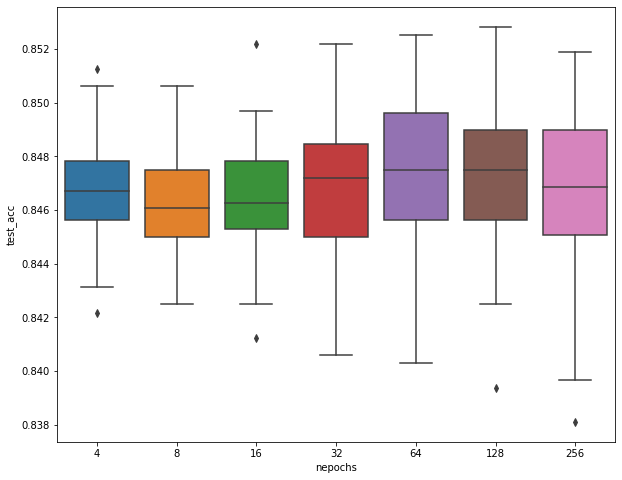

In [10]:
df_results = pd.read_csv("demo_nepochs_swav_microarray.csv")
df_le = (
    df_results.sort_values(by=["id", "epoch"], ascending=[False, False])
    .groupby("id", as_index=False)
    .first()
)
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_le, x="nepochs", y="test_acc")

# SwAV pretraining

In [4]:
for i in range(10):
        
    config_swav = {
        "epochs": 200,
        "lr_init": 0.0001,
        "early_stop": 5,
        "coeff": 0.6,
    }

    # SwAV training

    idx = generate_indices(dataset)
    dataloaders = get_dataloaders(cancer_dataset, idx, [256, 1403, 1403])
    net_swav = NetSwav(input_dim, nproto=16).to(device)
    train_swav_tcga(config_swav, dataloaders, net_swav, device, config_swav["early_stop"], eps=0.05)
    torch.save(net_swav.state_dict(), f"data/s15/swav_state_dict_bs_256_ma_{i}.pt")

21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/200 | SwAVTrainLoss=1.0317 | SwAVEvalLoss=0.3366 |
| Epoch:   2/200 | SwAVTrainLoss=0.2679 | SwAVEvalLoss=0.2014 |
| Epoch:   3/200 | SwAVTrainLoss=0.1822 | SwAVEvalLoss=0.1522 |
| Epoch:   4/200 | SwAVTrainLoss=0.1584 | SwAVEvalLoss=0.1461 |
| Epoch:   5/200 | SwAVTrainLoss=0.1462 | SwAVEvalLoss=0.1229 |
| Epoch:   6/200 | SwAVTrainLoss=0.1390 | SwAVEvalLoss=0.1400 |
| Epoch:   7/200 | SwAVTrainLoss=0.1177 | SwAVEvalLoss=0.1157 |
INFO: Early stopping counter 1 of 5
| Epoch:   8/200 | SwAVTrainLoss=0.1331 | SwAVEvalLoss=0.1191 |
| Epoch:   9/200 | SwAVTrainLoss=0.1176 | SwAVEvalLoss=0.1138 |
| Epoch:  10/200 | SwAVTrainLoss=0.1106 | SwAVEvalLoss=0.1113 |
| Epoch:  11/200 | SwAVTrainLoss=0.1084 | SwAVEvalLoss=0.1062 |
INFO: Early stopping counter 1 of 5
| Epoch:  12/200 | SwAVTrainLoss=0.1047 | SwAVEvalLoss=0.1161 |
INFO: Early stopping counter 2 of 5
| Epoc

INFO: Early stopping counter 1 of 5
| Epoch:  12/200 | SwAVTrainLoss=0.1070 | SwAVEvalLoss=0.1123 |
INFO: Early stopping counter 2 of 5
| Epoch:  13/200 | SwAVTrainLoss=0.1119 | SwAVEvalLoss=0.1015 |
| Epoch:  14/200 | SwAVTrainLoss=0.1036 | SwAVEvalLoss=0.0927 |
| Epoch:  15/200 | SwAVTrainLoss=0.0990 | SwAVEvalLoss=0.0923 |
| Epoch:  16/200 | SwAVTrainLoss=0.1071 | SwAVEvalLoss=0.0880 |
INFO: Early stopping counter 1 of 5
| Epoch:  17/200 | SwAVTrainLoss=0.0935 | SwAVEvalLoss=0.0992 |
INFO: Early stopping counter 2 of 5
| Epoch:  18/200 | SwAVTrainLoss=0.0998 | SwAVEvalLoss=0.0949 |
INFO: Early stopping counter 3 of 5
| Epoch:  19/200 | SwAVTrainLoss=0.1051 | SwAVEvalLoss=0.0920 |
INFO: Early stopping counter 4 of 5
| Epoch:  20/200 | SwAVTrainLoss=0.0977 | SwAVEvalLoss=0.1041 |
INFO: Early stopping counter 5 of 5
INFO: Early stopping
21244 elements in the dataset
14870 elements in the trainset
3187 elements in the valset
3187 elements in the testset
| Epoch:   1/200 | SwAVTrainLoss=

| Epoch:   8/200 | SwAVTrainLoss=0.1275 | SwAVEvalLoss=0.1036 |
INFO: Early stopping counter 1 of 5
| Epoch:   9/200 | SwAVTrainLoss=0.1241 | SwAVEvalLoss=0.1114 |
| Epoch:  10/200 | SwAVTrainLoss=0.1062 | SwAVEvalLoss=0.0981 |
INFO: Early stopping counter 1 of 5
| Epoch:  11/200 | SwAVTrainLoss=0.1041 | SwAVEvalLoss=0.0984 |
INFO: Early stopping counter 2 of 5
| Epoch:  12/200 | SwAVTrainLoss=0.1084 | SwAVEvalLoss=0.1006 |
INFO: Early stopping counter 3 of 5
| Epoch:  13/200 | SwAVTrainLoss=0.0988 | SwAVEvalLoss=0.1156 |
INFO: Early stopping counter 4 of 5
| Epoch:  14/200 | SwAVTrainLoss=0.1012 | SwAVEvalLoss=0.0998 |
| Epoch:  15/200 | SwAVTrainLoss=0.0962 | SwAVEvalLoss=0.0935 |
INFO: Early stopping counter 1 of 5
| Epoch:  16/200 | SwAVTrainLoss=0.0998 | SwAVEvalLoss=0.0977 |
INFO: Early stopping counter 2 of 5
| Epoch:  17/200 | SwAVTrainLoss=0.0952 | SwAVEvalLoss=0.1009 |
INFO: Early stopping counter 3 of 5
| Epoch:  18/200 | SwAVTrainLoss=0.1079 | SwAVEvalLoss=0.1000 |
INFO: Ea

# Learning rate fine-tuning

In [5]:
name = "ma_lr"
logger = LogResults(name, ["pretraining", "lr_init"])
lrs = [0.002, 0.0015, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0001, 0.00008, 0.00006, 0.00004, 0.00002]

for lr in lrs:
    for pretraining in  ["SwAV", "None"]:
        
        logger.update_hyps([pretraining, lr])
        
        # Finetuning and evaluation
        
        idx = generate_indices(dataset, prop=0.03)
        base_bs = 256
        margin = 0.5
        bs = round(len(idx[0]) / (len(idx[0]) // base_bs + margin))
        dataloaders = get_dataloaders(cancer_dataset, idx, [bs, bs, bs])

        config_nn = {
            "epochs": 200,
            "lr_init": lr,
            "early_stop": 5,
        }

        for i in range(20):

            net = Net(input_dim, output_dim).to(device)

            if pretraining == "SwAV":
                print("transfer...")
                transfer_weights(net, f"data/s15/swav_state_dict_bs_256_ma_{str(i % 10)}.pt")
            
            train_nn(config_nn, dataloaders, net, weights=None, early_stop=config_nn["early_stop"], log=False, logger=logger, binary=True)
            logger.next_run()
            logger.show_progression()

        logger.save_csv()
        

21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 1, below are the last 5 epochs :
       id epoch   val_acc  val_loss  test_acc  test_loss pretraining  lr_init
18  run-0    18  0.840916  0.526582  0.844995   0.521822        SwAV    0.002
19  run-0    19  0.841544  0.534201  0.846250   0.527675        SwAV    0.002
20  run-0    20  0.841544  0.539006  0.845309   0.530347        SwAV    0.002
21  run-0    21  0.841544  0.537837  0.845937   0.534452        SwAV    0.002
22  run-0    22  0.841858  0.543399  0.846250   0.532841        SwAV    0.002
transfer...

Iteration 2, below are the last 5 epochs :
       id epoch   val_acc  val_loss  test_acc  test_loss pretraining  lr_init
37  run-1    14  0.845309  0.508767  0.845309   0.511102        SwAV    0.002
38  run-1    15  0.845623  0.503141  0.843426   0.512314        SwAV    0.002
39  run-1    16  0.846250  0.501320  0.844995   0.503698        SwAV  

transfer...

Iteration 16, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
297  run-15    11  0.845309  0.497099  0.843740   0.494404        SwAV   
298  run-15    12  0.846250  0.489253  0.848761   0.484855        SwAV   
299  run-15    13  0.845937  0.508556  0.848761   0.507794        SwAV   
300  run-15    14  0.846564  0.522109  0.847192   0.527902        SwAV   
301  run-15    15  0.846564  0.511253  0.849074   0.504874        SwAV   

     lr_init  
297    0.002  
298    0.002  
299    0.002  
300    0.002  
301    0.002  
transfer...

Iteration 17, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
311  run-16     9  0.845623  0.529647  0.837778   0.539964        SwAV   
312  run-16    10  0.846878  0.528256  0.840602   0.535132        SwAV   
313  run-16    11  0.845623  0.534839  0.844054   0.541016        SwAV   
314  run-16    12  0.846250  0.545395  0.841858   0.546


Iteration 30, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
587  run-29    13  0.835896  0.487761  0.833072   0.473896        None   
588  run-29    14  0.831503  0.490856  0.834641   0.471486        None   
589  run-29    15  0.831503  0.503156  0.838720   0.486858        None   
590  run-29    16  0.835582  0.511743  0.840289   0.491230        None   
591  run-29    17  0.836837  0.518496  0.840289   0.497057        None   

     lr_init  
587    0.002  
588    0.002  
589    0.002  
590    0.002  
591    0.002  

Iteration 31, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
604  run-30    12  0.834327  0.436477  0.833072   0.438004        None   
605  run-30    13  0.833699  0.456461  0.832758   0.454343        None   
606  run-30    14  0.834641  0.487757  0.832444   0.484276        None   
607  run-30    15  0.838720  0.478868  0.841544   0.467047        None   
608  

transfer...

Iteration 44, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
841  run-43    11  0.847192  0.473957  0.845309   0.477548        SwAV   
842  run-43    12  0.845937  0.472697  0.847505   0.470967        SwAV   
843  run-43    13  0.844682  0.472809  0.847192   0.464352        SwAV   
844  run-43    14  0.842171  0.467612  0.845937   0.460095        SwAV   
845  run-43    15  0.840916  0.469478  0.847819   0.457560        SwAV   

     lr_init  
841   0.0015  
842   0.0015  
843   0.0015  
844   0.0015  
845   0.0015  
transfer...

Iteration 45, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
864  run-44    18  0.850016  0.454016  0.851271   0.442454        SwAV   
865  run-44    19  0.849074  0.449847  0.850329   0.441706        SwAV   
866  run-44    20  0.850016  0.454039  0.850329   0.442219        SwAV   
867  run-44    21  0.848761  0.457401  0.849702   0.450

transfer...

Iteration 58, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
1119  run-57    11  0.839975  0.483818  0.846250   0.482959        SwAV   
1120  run-57    12  0.845309  0.484161  0.849074   0.478687        SwAV   
1121  run-57    13  0.844054  0.486238  0.847819   0.486147        SwAV   
1122  run-57    14  0.843426  0.487419  0.844054   0.487030        SwAV   
1123  run-57    15  0.844368  0.480860  0.845309   0.482961        SwAV   

      lr_init  
1119   0.0015  
1120   0.0015  
1121   0.0015  
1122   0.0015  
1123   0.0015  
transfer...

Iteration 59, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
1133  run-58     9  0.832758  0.545766  0.834013   0.541312        SwAV   
1134  run-58    10  0.831503  0.551050  0.839034   0.550377        SwAV   
1135  run-58    11  0.833699  0.538072  0.838092   0.539712        SwAV   
1136  run-58    12  0.838720  0.520937 


Iteration 72, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
1393  run-71    29  0.845623  0.504251  0.843426   0.485805        None   
1394  run-71    30  0.845309  0.501264  0.843426   0.478761        None   
1395  run-71    31  0.845623  0.502420  0.843740   0.480629        None   
1396  run-71    32  0.845309  0.496146  0.844054   0.477342        None   
1397  run-71    33  0.845623  0.502660  0.845309   0.478851        None   

      lr_init  
1393   0.0015  
1394   0.0015  
1395   0.0015  
1396   0.0015  
1397   0.0015  

Iteration 73, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
1412  run-72    14  0.835582  0.455687  0.834327   0.446854        None   
1413  run-72    15  0.835582  0.472583  0.830875   0.461304        None   
1414  run-72    16  0.835268  0.468431  0.831817   0.458072        None   
1415  run-72    17  0.834327  0.481079  0.834641   0.471790    

transfer...

Iteration 86, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
1674  run-85    19  0.849388  0.415164  0.845309   0.416389        SwAV   
1675  run-85    20  0.849074  0.421592  0.849074   0.417200        SwAV   
1676  run-85    21  0.845623  0.424015  0.847819   0.422496        SwAV   
1677  run-85    22  0.846564  0.422864  0.847192   0.425957        SwAV   
1678  run-85    23  0.846878  0.428463  0.845937   0.424949        SwAV   

      lr_init  
1674    0.001  
1675    0.001  
1676    0.001  
1677    0.001  
1678    0.001  
transfer...

Iteration 87, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
1695  run-86    16  0.844682  0.444980  0.847192   0.437617        SwAV   
1696  run-86    17  0.844995  0.441470  0.849702   0.436742        SwAV   
1697  run-86    18  0.845309  0.439085  0.850643   0.438192        SwAV   
1698  run-86    19  0.845309  0.431535 

transfer...

Iteration 100, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
1953  run-99    15  0.846878  0.447774  0.851271   0.444822        SwAV   
1954  run-99    16  0.845623  0.448736  0.850016   0.445265        SwAV   
1955  run-99    17  0.845937  0.449197  0.848761   0.446355        SwAV   
1956  run-99    18  0.846564  0.449483  0.849388   0.443439        SwAV   
1957  run-99    19  0.848133  0.448058  0.850643   0.444544        SwAV   

      lr_init  
1953    0.001  
1954    0.001  
1955    0.001  
1956    0.001  
1957    0.001  
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 101, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
1971  run-100    13  0.842171  0.387631  0.839347   0.388816        None   
1972  run-100    14  0.842171  0.390682  0.840916   0.392766        None   
1973 


Iteration 114, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
2265  run-113    23  0.841858  0.452481  0.841230   0.429487        None   
2266  run-113    24  0.842171  0.457971  0.842799   0.440225        None   
2267  run-113    25  0.841858  0.461101  0.845309   0.446676        None   
2268  run-113    26  0.842171  0.463407  0.845623   0.450607        None   
2269  run-113    27  0.843740  0.463894  0.844995   0.446728        None   

      lr_init  
2265    0.001  
2266    0.001  
2267    0.001  
2268    0.001  
2269    0.001  

Iteration 115, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
2290  run-114    20  0.845309  0.444928  0.839661   0.441883        None   
2291  run-114    21  0.841544  0.447954  0.840289   0.444038        None   
2292  run-114    22  0.841858  0.447879  0.840602   0.445497        None   
2293  run-114    23  0.842171  0.450074  0.841544  

transfer...

Iteration 128, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
2565  run-127    14  0.847819  0.435032  0.850957   0.431790        SwAV   
2566  run-127    15  0.847192  0.426945  0.850643   0.430091        SwAV   
2567  run-127    16  0.846250  0.422799  0.849074   0.420526        SwAV   
2568  run-127    17  0.847192  0.421792  0.849074   0.419491        SwAV   
2569  run-127    18  0.847192  0.421882  0.850016   0.419470        SwAV   

      lr_init  
2565   0.0008  
2566   0.0008  
2567   0.0008  
2568   0.0008  
2569   0.0008  
transfer...

Iteration 129, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
2590  run-128    20  0.851271  0.422573  0.850329   0.417645        SwAV   
2591  run-128    21  0.850643  0.424046  0.851271   0.417230        SwAV   
2592  run-128    22  0.851271  0.428654  0.850329   0.418894        SwAV   
2593  run-128    23  0.8509


Iteration 142, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
2810  run-141    20  0.844368  0.424862  0.842171   0.419337        None   
2811  run-141    21  0.844682  0.428490  0.840289   0.417238        None   
2812  run-141    22  0.844368  0.427407  0.841230   0.418058        None   
2813  run-141    23  0.844682  0.430870  0.840602   0.419608        None   
2814  run-141    24  0.843740  0.435820  0.838720   0.426583        None   

      lr_init  
2810   0.0008  
2811   0.0008  
2812   0.0008  
2813   0.0008  
2814   0.0008  

Iteration 143, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
2830  run-142    15  0.836837  0.414139  0.840289   0.401583        None   
2831  run-142    16  0.837465  0.411686  0.840602   0.404555        None   
2832  run-142    17  0.840602  0.412473  0.840289   0.402719        None   
2833  run-142    18  0.839661  0.418670  0.842485  


Iteration 156, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
3123  run-155    18  0.843426  0.397211  0.837465   0.398982        None   
3124  run-155    19  0.843740  0.402525  0.838720   0.402511        None   
3125  run-155    20  0.844682  0.406731  0.840916   0.404065        None   
3126  run-155    21  0.845623  0.405129  0.841230   0.402033        None   
3127  run-155    22  0.844682  0.419966  0.839975   0.405380        None   

      lr_init  
3123   0.0008  
3124   0.0008  
3125   0.0008  
3126   0.0008  
3127   0.0008  

Iteration 157, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
3140  run-156    12  0.835582  0.402335  0.832758   0.404414        None   
3141  run-156    13  0.838406  0.404708  0.830248   0.407294        None   
3142  run-156    14  0.838406  0.401214  0.832444   0.401111        None   
3143  run-156    15  0.836210  0.399318  0.837151  

transfer...

Iteration 170, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
3384  run-169    14  0.848447  0.425621  0.844995   0.434613        SwAV   
3385  run-169    15  0.846564  0.424782  0.846250   0.429818        SwAV   
3386  run-169    16  0.845309  0.426761  0.845623   0.430973        SwAV   
3387  run-169    17  0.846250  0.418533  0.843740   0.428961        SwAV   
3388  run-169    18  0.845937  0.413880  0.848447   0.422860        SwAV   

      lr_init  
3384   0.0006  
3385   0.0006  
3386   0.0006  
3387   0.0006  
3388   0.0006  
transfer...

Iteration 171, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
3402  run-170    13  0.848133  0.400823  0.851585   0.401146        SwAV   
3403  run-170    14  0.850957  0.395468  0.852526   0.397946        SwAV   
3404  run-170    15  0.848133  0.397135  0.849074   0.397260        SwAV   
3405  run-170    16  0.8490


Iteration 184, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
3647  run-183    22  0.844368  0.399059  0.846878   0.394842        None   
3648  run-183    23  0.844682  0.399732  0.846878   0.393805        None   
3649  run-183    24  0.847192  0.398185  0.846250   0.391408        None   
3650  run-183    25  0.844682  0.403111  0.844682   0.395712        None   
3651  run-183    26  0.841544  0.406248  0.845937   0.401864        None   

      lr_init  
3647   0.0006  
3648   0.0006  
3649   0.0006  
3650   0.0006  
3651   0.0006  

Iteration 185, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
3667  run-184    15  0.837465  0.410235  0.840289   0.411435        None   
3668  run-184    16  0.835896  0.410756  0.839661   0.411067        None   
3669  run-184    17  0.837465  0.408814  0.843426   0.406941        None   
3670  run-184    18  0.839661  0.407721  0.842171  


Iteration 198, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
3975  run-197    16  0.837465  0.389610  0.839975   0.384381        None   
3976  run-197    17  0.838406  0.390529  0.839661   0.386682        None   
3977  run-197    18  0.839975  0.396032  0.839661   0.388513        None   
3978  run-197    19  0.838720  0.398972  0.839661   0.389895        None   
3979  run-197    20  0.839975  0.401581  0.840916   0.390806        None   

      lr_init  
3975   0.0006  
3976   0.0006  
3977   0.0006  
3978   0.0006  
3979   0.0006  

Iteration 199, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
3993  run-198    13  0.841544  0.392710  0.836210   0.395316        None   
3994  run-198    14  0.841544  0.398088  0.835582   0.399668        None   
3995  run-198    15  0.843426  0.399354  0.836837   0.402555        None   
3996  run-198    16  0.840916  0.399321  0.837151  

transfer...

Iteration 212, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
4254  run-211    18  0.849074  0.404622  0.844995   0.403026        SwAV   
4255  run-211    19  0.847505  0.401499  0.846250   0.405571        SwAV   
4256  run-211    20  0.846250  0.401443  0.844682   0.401161        SwAV   
4257  run-211    21  0.846564  0.400909  0.842799   0.402001        SwAV   
4258  run-211    22  0.847505  0.400819  0.843740   0.402629        SwAV   

      lr_init  
4254   0.0004  
4255   0.0004  
4256   0.0004  
4257   0.0004  
4258   0.0004  
transfer...

Iteration 213, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
4266  run-212     7  0.843426  0.390232  0.835896   0.394317        SwAV   
4267  run-212     8  0.843113  0.388911  0.840289   0.394725        SwAV   
4268  run-212     9  0.842799  0.386018  0.841230   0.390923        SwAV   
4269  run-212    10  0.8440


Iteration 226, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
4541  run-225    14  0.843426  0.391130  0.842171   0.393962        None   
4542  run-225    15  0.842485  0.389119  0.840916   0.392069        None   
4543  run-225    16  0.845937  0.386678  0.844368   0.388269        None   
4544  run-225    17  0.840602  0.388494  0.842485   0.389958        None   
4545  run-225    18  0.841544  0.390082  0.840602   0.386610        None   

      lr_init  
4541   0.0004  
4542   0.0004  
4543   0.0004  
4544   0.0004  
4545   0.0004  

Iteration 227, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
4574  run-226    28  0.849074  0.404705  0.844054   0.400551        None   
4575  run-226    29  0.850016  0.403976  0.843740   0.400841        None   
4576  run-226    30  0.849702  0.407551  0.844995   0.399405        None   
4577  run-226    31  0.849074  0.407079  0.846878  


Iteration 240, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
4890  run-239    15  0.839034  0.410480  0.835582   0.412393        None   
4891  run-239    16  0.837465  0.408691  0.835896   0.407644        None   
4892  run-239    17  0.839975  0.398235  0.841230   0.401019        None   
4893  run-239    18  0.838406  0.394567  0.842799   0.392717        None   
4894  run-239    19  0.837778  0.391494  0.843426   0.390460        None   

      lr_init  
4890   0.0004  
4891   0.0004  
4892   0.0004  
4893   0.0004  
4894   0.0004  
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 241, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
4909  run-240    14  0.846564  0.373612  0.845937   0.375121        SwAV   
4910  run-240    15  0.845937  0.373401  0.845309   0.376073        SwAV   

transfer...

Iteration 254, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
5181  run-253     9  0.846878  0.380511  0.839034   0.381786        SwAV   
5182  run-253    10  0.846878  0.379802  0.841858   0.380607        SwAV   
5183  run-253    11  0.848133  0.378223  0.844368   0.378373        SwAV   
5184  run-253    12  0.847505  0.375526  0.843426   0.374711        SwAV   
5185  run-253    13  0.846250  0.373633  0.844995   0.373694        SwAV   

      lr_init  
5181   0.0002  
5182   0.0002  
5183   0.0002  
5184   0.0002  
5185   0.0002  
transfer...

Iteration 255, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
5197  run-254    11  0.848761  0.412153  0.838092   0.428652        SwAV   
5198  run-254    12  0.844368  0.412331  0.839347   0.427918        SwAV   
5199  run-254    13  0.846878  0.408909  0.841544   0.424423        SwAV   
5200  run-254    14  0.8490


Iteration 268, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
5511  run-267    25  0.847819  0.379189  0.844054   0.382336        None   
5512  run-267    26  0.845309  0.381793  0.845623   0.383539        None   
5513  run-267    27  0.847192  0.383925  0.845623   0.384374        None   
5514  run-267    28  0.848133  0.384081  0.846250   0.386001        None   
5515  run-267    29  0.846564  0.382689  0.846250   0.382944        None   

      lr_init  
5511   0.0002  
5512   0.0002  
5513   0.0002  
5514   0.0002  
5515   0.0002  

Iteration 269, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
5534  run-268    18  0.842485  0.407215  0.833072   0.414623        None   
5535  run-268    19  0.840602  0.403968  0.835268   0.411408        None   
5536  run-268    20  0.842171  0.403300  0.835268   0.409980        None   
5537  run-268    21  0.843426  0.402161  0.836210  

transfer...

Iteration 282, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
5876  run-281    15  0.840602  0.413258  0.833699   0.422838        SwAV   
5877  run-281    16  0.838406  0.409406  0.836210   0.419445        SwAV   
5878  run-281    17  0.839661  0.407547  0.839347   0.418315        SwAV   
5879  run-281    18  0.840602  0.407887  0.835582   0.414368        SwAV   
5880  run-281    19  0.839975  0.404093  0.836523   0.411075        SwAV   

      lr_init  
5876   0.0001  
5877   0.0001  
5878   0.0001  
5879   0.0001  
5880   0.0001  
transfer...

Iteration 283, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
5899  run-282    18  0.849702  0.385565  0.845623   0.394479        SwAV   
5900  run-282    19  0.848761  0.382965  0.844368   0.391775        SwAV   
5901  run-282    20  0.848133  0.380492  0.843740   0.388581        SwAV   
5902  run-282    21  0.8487

transfer...

Iteration 296, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
6237  run-295    21  0.844682  0.406003  0.839347   0.414423        SwAV   
6238  run-295    22  0.843740  0.404748  0.841230   0.411409        SwAV   
6239  run-295    23  0.842485  0.403603  0.842171   0.412023        SwAV   
6240  run-295    24  0.841544  0.402416  0.843113   0.409498        SwAV   
6241  run-295    25  0.841858  0.402590  0.843113   0.409621        SwAV   

      lr_init  
6237   0.0001  
6238   0.0001  
6239   0.0001  
6240   0.0001  
6241   0.0001  
transfer...

Iteration 297, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
6262  run-296    20  0.844368  0.405411  0.837778   0.415171        SwAV   
6263  run-296    21  0.844682  0.401825  0.840289   0.412605        SwAV   
6264  run-296    22  0.843113  0.400139  0.842485   0.410035        SwAV   
6265  run-296    23  0.8421


Iteration 310, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
6569  run-309    21  0.846564  0.400636  0.841544   0.407019        None   
6570  run-309    22  0.847192  0.398740  0.841230   0.403423        None   
6571  run-309    23  0.846878  0.399338  0.842485   0.403626        None   
6572  run-309    24  0.845937  0.397674  0.843740   0.402277        None   
6573  run-309    25  0.847505  0.395336  0.843740   0.400835        None   

      lr_init  
6569   0.0001  
6570   0.0001  
6571   0.0001  
6572   0.0001  
6573   0.0001  

Iteration 311, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
6594  run-310    20  0.843426  0.411797  0.838092   0.421106        None   
6595  run-310    21  0.843426  0.416045  0.837778   0.422752        None   
6596  run-310    22  0.843113  0.413862  0.837465   0.425715        None   
6597  run-310    23  0.841544  0.412563  0.836210  

transfer...

Iteration 324, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
6939  run-323    17  0.850329  0.407184  0.845309   0.415799        SwAV   
6940  run-323    18  0.850329  0.403058  0.845623   0.411947        SwAV   
6941  run-323    19  0.848447  0.403299  0.844054   0.411657        SwAV   
6942  run-323    20  0.847505  0.400966  0.843740   0.409306        SwAV   
6943  run-323    21  0.847505  0.400339  0.845937   0.405335        SwAV   

      lr_init  
6939  0.00008  
6940  0.00008  
6941  0.00008  
6942  0.00008  
6943  0.00008  
transfer...

Iteration 325, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
6964  run-324    20  0.850643  0.398009  0.841230   0.406873        SwAV   
6965  run-324    21  0.849702  0.396257  0.842171   0.405177        SwAV   
6966  run-324    22  0.850016  0.392207  0.841544   0.400937        SwAV   
6967  run-324    23  0.8490

transfer...

Iteration 338, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
7321  run-337    17  0.841230  0.406870  0.835582   0.413233        SwAV   
7322  run-337    18  0.839661  0.404340  0.836210   0.409597        SwAV   
7323  run-337    19  0.841544  0.402177  0.836523   0.406109        SwAV   
7324  run-337    20  0.840289  0.398609  0.838092   0.402725        SwAV   
7325  run-337    21  0.840602  0.397459  0.838092   0.399462        SwAV   

      lr_init  
7321  0.00008  
7322  0.00008  
7323  0.00008  
7324  0.00008  
7325  0.00008  
transfer...

Iteration 339, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
7346  run-338    20  0.844682  0.393352  0.841544   0.401977        SwAV   
7347  run-338    21  0.844368  0.391443  0.841858   0.398287        SwAV   
7348  run-338    22  0.844682  0.389173  0.843113   0.397567        SwAV   
7349  run-338    23  0.8431


Iteration 352, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
7614  run-351    16  0.845623  0.400459  0.844054   0.406977        None   
7615  run-351    17  0.844682  0.404795  0.843113   0.406876        None   
7616  run-351    18  0.844995  0.400160  0.842171   0.404218        None   
7617  run-351    19  0.845937  0.398732  0.842799   0.403802        None   
7618  run-351    20  0.845309  0.398224  0.840916   0.402829        None   

      lr_init  
7614  0.00008  
7615  0.00008  
7616  0.00008  
7617  0.00008  
7618  0.00008  

Iteration 353, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
7636  run-352    17  0.847505  0.412295  0.842485   0.421648        None   
7637  run-352    18  0.847819  0.414544  0.842799   0.420668        None   
7638  run-352    19  0.848133  0.412575  0.843740   0.416730        None   
7639  run-352    20  0.847192  0.409896  0.845309  

transfer...

Iteration 366, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
7998  run-365    32  0.846564  0.401972  0.841544   0.409755        SwAV   
7999  run-365    33  0.846564  0.400097  0.842799   0.409300        SwAV   
8000  run-365    34  0.846564  0.401471  0.844054   0.409287        SwAV   
8001  run-365    35  0.846878  0.401373  0.844368   0.407589        SwAV   
8002  run-365    36  0.847505  0.399396  0.846564   0.406986        SwAV   

      lr_init  
7998  0.00006  
7999  0.00006  
8000  0.00006  
8001  0.00006  
8002  0.00006  
transfer...

Iteration 367, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
8040  run-366    37  0.846564  0.376837  0.844054   0.376261        SwAV   
8041  run-366    38  0.846564  0.376540  0.844995   0.375820        SwAV   
8042  run-366    39  0.846564  0.376515  0.845309   0.375036        SwAV   
8043  run-366    40  0.8459

transfer...

Iteration 380, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
8482  run-379    26  0.843740  0.395330  0.839034   0.401268        SwAV   
8483  run-379    27  0.843740  0.396484  0.837778   0.399887        SwAV   
8484  run-379    28  0.842799  0.394620  0.840602   0.400987        SwAV   
8485  run-379    29  0.841230  0.395332  0.841230   0.399905        SwAV   
8486  run-379    30  0.841858  0.393519  0.841230   0.398392        SwAV   

      lr_init  
8482  0.00006  
8483  0.00006  
8484  0.00006  
8485  0.00006  
8486  0.00006  
21244 elements in the dataset
446 elements in the trainset
3187 elements in the valset
3187 elements in the testset

Iteration 381, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
8504  run-380    17  0.843113  0.413298  0.836210   0.420804        None   
8505  run-380    18  0.842485  0.411286  0.837151   0.415875        None   


Iteration 394, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
8840  run-393    19  0.842171  0.403110  0.831503   0.415151        None   
8841  run-393    20  0.841858  0.403370  0.832758   0.412801        None   
8842  run-393    21  0.840916  0.406506  0.833386   0.414172        None   
8843  run-393    22  0.840289  0.405689  0.833386   0.415170        None   
8844  run-393    23  0.839661  0.403241  0.834013   0.412967        None   

      lr_init  
8840  0.00006  
8841  0.00006  
8842  0.00006  
8843  0.00006  
8844  0.00006  

Iteration 395, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
8855  run-394    10  0.847819  0.417780  0.844682   0.421657        None   
8856  run-394    11  0.848761  0.408452  0.846564   0.412699        None   
8857  run-394    12  0.848447  0.402973  0.846878   0.406818        None   
8858  run-394    13  0.847505  0.398200  0.846878  

transfer...

Iteration 408, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
9317  run-407    37  0.848133  0.408880  0.836523   0.417408        SwAV   
9318  run-407    38  0.847819  0.410724  0.837151   0.416860        SwAV   
9319  run-407    39  0.846878  0.409170  0.837151   0.415461        SwAV   
9320  run-407    40  0.846878  0.406163  0.837465   0.414235        SwAV   
9321  run-407    41  0.847505  0.405321  0.837465   0.413114        SwAV   

      lr_init  
9317  0.00004  
9318  0.00004  
9319  0.00004  
9320  0.00004  
9321  0.00004  
transfer...

Iteration 409, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
9357  run-408    35  0.844368  0.377957  0.846564   0.380869        SwAV   
9358  run-408    36  0.843740  0.376877  0.846564   0.377343        SwAV   
9359  run-408    37  0.844368  0.374908  0.846878   0.376918        SwAV   
9360  run-408    38  0.8449


Iteration 422, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
9868  run-421    12  0.845937  0.426541  0.837778   0.433830        None   
9869  run-421    13  0.845937  0.420951  0.838406   0.427357        None   
9870  run-421    14  0.845937  0.415366  0.839034   0.421893        None   
9871  run-421    15  0.845309  0.411543  0.838092   0.419524        None   
9872  run-421    16  0.845309  0.410585  0.838720   0.416174        None   

      lr_init  
9868  0.00004  
9869  0.00004  
9870  0.00004  
9871  0.00004  
9872  0.00004  

Iteration 423, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
9887  run-422    14  0.848447  0.416250  0.846564   0.419099        None   
9888  run-422    15  0.848447  0.410190  0.846250   0.413970        None   
9889  run-422    16  0.846250  0.407827  0.847819   0.410841        None   
9890  run-422    17  0.846564  0.402529  0.847819  


Iteration 436, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
10182  run-435    13  0.844368  0.420793  0.841544   0.427530        None   
10183  run-435    14  0.843113  0.416822  0.841230   0.422707        None   
10184  run-435    15  0.843113  0.412781  0.841230   0.418623        None   
10185  run-435    16  0.843426  0.408020  0.842485   0.413556        None   
10186  run-435    17  0.843740  0.405594  0.844682   0.410724        None   

       lr_init  
10182  0.00004  
10183  0.00004  
10184  0.00004  
10185  0.00004  
10186  0.00004  

Iteration 437, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
10219  run-436    32  0.848133  0.391323  0.843113   0.400071        None   
10220  run-436    33  0.848133  0.392840  0.843113   0.401064        None   
10221  run-436    34  0.849074  0.390409  0.844995   0.398195        None   
10222  run-436    35  0.848761  0.3

transfer...

Iteration 450, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
10925  run-449    49  0.842799  0.396145  0.840289   0.400822        SwAV   
10926  run-449    50  0.842485  0.393698  0.839975   0.400668        SwAV   
10927  run-449    51  0.843426  0.393083  0.839034   0.399973        SwAV   
10928  run-449    52  0.842485  0.392071  0.839347   0.399881        SwAV   
10929  run-449    53  0.841858  0.393218  0.839975   0.398512        SwAV   

       lr_init  
10925  0.00002  
10926  0.00002  
10927  0.00002  
10928  0.00002  
10929  0.00002  
transfer...

Iteration 451, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
11001  run-450    71  0.839034  0.389852  0.838406   0.388826        SwAV   
11002  run-450    72  0.838092  0.387281  0.838406   0.388290        SwAV   
11003  run-450    73  0.838092  0.388785  0.839975   0.390838        SwAV   
11004  run-


Iteration 464, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
11601  run-463    14  0.834641  0.446486  0.827424   0.456530        None   
11602  run-463    15  0.834641  0.441195  0.829934   0.449092        None   
11603  run-463    16  0.835582  0.436180  0.829307   0.444691        None   
11604  run-463    17  0.834013  0.434158  0.829934   0.443417        None   
11605  run-463    18  0.834013  0.431898  0.829934   0.438749        None   

       lr_init  
11601  0.00002  
11602  0.00002  
11603  0.00002  
11604  0.00002  
11605  0.00002  

Iteration 465, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
11625  run-464    19  0.844682  0.417019  0.841230   0.425712        None   
11626  run-464    20  0.843740  0.413948  0.842171   0.422525        None   
11627  run-464    21  0.843426  0.411755  0.842799   0.419536        None   
11628  run-464    22  0.844054  0.4


Iteration 478, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
11955  run-477    26  0.839034  0.429680  0.832444   0.439122        None   
11956  run-477    27  0.838720  0.429916  0.832131   0.441694        None   
11957  run-477    28  0.837778  0.431103  0.830248   0.442696        None   
11958  run-477    29  0.837778  0.431321  0.831817   0.442013        None   
11959  run-477    30  0.837778  0.430863  0.832444   0.442601        None   

       lr_init  
11955  0.00002  
11956  0.00002  
11957  0.00002  
11958  0.00002  
11959  0.00002  

Iteration 479, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss pretraining  \
11973  run-478    13  0.845937  0.433963  0.836523   0.439119        None   
11974  run-478    14  0.846564  0.428889  0.837151   0.433373        None   
11975  run-478    15  0.846878  0.423043  0.837151   0.429181        None   
11976  run-478    16  0.846878  0.4

<AxesSubplot:xlabel='lr_init', ylabel='test_acc'>

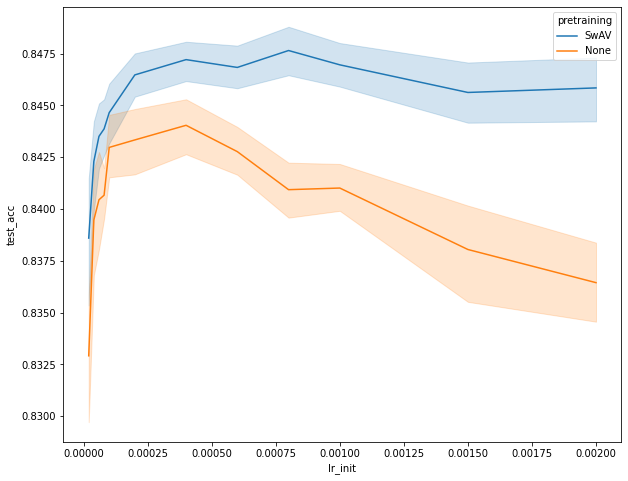

In [6]:
df_results = pd.read_csv("ma_lr.csv")
df_le = (
    df_results.sort_values(by=["id", "epoch"], ascending=[False, False])
    .groupby("id", as_index=False)
    .first()
)
plt.figure(figsize=(10, 8))
sns.lineplot(data=df_le, x="lr_init", y="test_acc", hue="pretraining")

In [7]:
df_le.groupby(["pretraining", "lr_init"], as_index=False).mean()

,pretraining,lr_init,Unnamed: 0,epoch,val_acc,val_loss,test_acc,test_loss
0,None,0.00002,11774.90,22.20,0.836931,0.427242,0.832915,0.435443
1,None,0.00004,10068.35,22.20,0.841999,0.407409,0.839473,0.414132
2,None,0.00006,8750.40,23.35,0.843819,0.405487,0.840446,0.412215
3,None,0.00008,7592.95,20.35,0.843866,0.399920,0.840665,0.405224
4,None,0.00010,6595.95,23.85,0.845639,0.396648,0.842971,0.401002
5,None,0.00020,5578.80,24.00,0.844101,0.391464,0.843332,0.392995
6,None,0.00040,4670.40,22.95,0.844211,0.391655,0.844038,0.388539
7,None,0.00060,3802.15,22.15,0.841136,0.402903,0.842767,0.397757
8,None,0.00080,2998.80,20.75,0.840634,0.416001,0.840932,0.407909
9,None,0.00100,2186.70,21.45,0.841261,0.434946,0.841010,0.426446


# Final SwAV performance evaluation

In [4]:
steps = (
    list(np.arange(0.01, 0.05, 0.001))
    + list(np.arange(0.05, 0.14, 0.005))
    + list(np.arange(0.14, 0.30, 0.01))
    + list(np.arange(0.30, 1.05, 0.05))
)

lr_catalog = {
    "SwAV": 0.0008,
    "None": 0.0004,
}

name = "demo_swav_performance_ma_0"
logger = LogResults(name, ["prop", "lr_init", "pretraining", "bs", "nb_labels"])

for prop in steps:
    
    # Finetuning and evaluation
    
    prop = round(prop, 3)
    idx = generate_indices(dataset, prop)
    base_bs = 256
    margin = 0.5
    bs = round(len(idx[0]) / (len(idx[0]) // base_bs + margin))

    dataloaders = get_dataloaders(cancer_dataset, idx, [bs, bs, bs])
    
    for pretraining in  ["SwAV", "None"]:
        
        lr = lr_catalog[pretraining]
        
        logger.update_hyps([prop, lr, pretraining, bs, len(idx[0])])

        config_nn = {
            "epochs": 200,
            "lr_init": lr,
            "early_stop": 5,
        }

        for i in range(12):

            net = Net(input_dim, output_dim).to(device)

            if pretraining == "SwAV":
                print("transfer...")
                transfer_weights(net, f"data/s15/swav_state_dict_bs_256_ma_{str(i % 10)}.pt")
            train_nn(config_nn, dataloaders, net, weights=w, early_stop=5, log=False, logger=logger, binary=True)

            logger.next_run()
            logger.show_progression()                

        logger.save_csv()

21244 elements in the dataset
149 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 1, below are the last 5 epochs :
       id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
8   run-0     8  0.781613  0.394255  0.765610   0.388914  0.01   0.0008   
9   run-0     9  0.779730  0.399411  0.763728   0.394777  0.01   0.0008   
10  run-0    10  0.778789  0.406131  0.765924   0.399609  0.01   0.0008   
11  run-0    11  0.777534  0.413260  0.764983   0.405520  0.01   0.0008   
12  run-0    12  0.777220  0.415874  0.766552   0.411909  0.01   0.0008   

   pretraining   bs nb_labels  
8         SwAV  298       149  
9         SwAV  298       149  
10        SwAV  298       149  
11        SwAV  298       149  
12        SwAV  298       149  
transfer...

Iteration 2, below are the last 5 epochs :
       id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
20  run-1     7  0.784123  0.396907  0.780985   0.3835


Iteration 13, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
211  run-12    28  0.786947  0.364923  0.790712   0.350534  0.01   0.0004   
212  run-12    29  0.785692  0.365714  0.790398   0.350629  0.01   0.0004   
213  run-12    30  0.786319  0.365225  0.791340   0.352254  0.01   0.0004   
214  run-12    31  0.786633  0.366746  0.791026   0.353158  0.01   0.0004   
215  run-12    32  0.785692  0.369603  0.791967   0.351476  0.01   0.0004   

    pretraining   bs nb_labels  
211        None  298       149  
212        None  298       149  
213        None  298       149  
214        None  298       149  
215        None  298       149  

Iteration 14, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
239  run-13    23  0.776906  0.369781  0.787261   0.354776  0.01   0.0004   
240  run-13    24  0.776906  0.371024  0.787575   0.355952  0.01   0.0004   
241  run-13    25 

transfer...

Iteration 25, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
569  run-24     7  0.787575  0.357237  0.783495   0.359521  0.011   0.0008   
570  run-24     8  0.785378  0.366106  0.782240   0.366253  0.011   0.0008   
571  run-24     9  0.786319  0.374276  0.784123   0.373470  0.011   0.0008   
572  run-24    10  0.788202  0.380331  0.783495   0.380515  0.011   0.0008   
573  run-24    11  0.787888  0.388138  0.782554   0.387257  0.011   0.0008   

    pretraining   bs nb_labels  
569        SwAV  328       164  
570        SwAV  328       164  
571        SwAV  328       164  
572        SwAV  328       164  
573        SwAV  328       164  
transfer...

Iteration 26, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
581  run-25     7  0.795105  0.354762  0.793850   0.346901  0.011   0.0008   
582  run-25     8  0.794478  0.360034  0.794478   0.349701  0.0


Iteration 37, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
741  run-36    24  0.791026  0.348383  0.802008   0.338664  0.011   0.0004   
742  run-36    25  0.790085  0.347606  0.803577   0.337537  0.011   0.0004   
743  run-36    26  0.790712  0.346759  0.804832   0.338615  0.011   0.0004   
744  run-36    27  0.790398  0.347070  0.804518   0.338027  0.011   0.0004   
745  run-36    28  0.790398  0.349729  0.804518   0.337324  0.011   0.0004   

    pretraining   bs nb_labels  
741        None  328       164  
742        None  328       164  
743        None  328       164  
744        None  328       164  
745        None  328       164  

Iteration 38, below are the last 5 epochs :
         id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
774  run-37    28  0.792909  0.356437  0.796360   0.349350  0.011   0.0004   
775  run-37    29  0.792595  0.357756  0.796988   0.349880  0.011   0.0004   
776  run-

transfer...

Iteration 49, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
1098  run-48     7  0.804205  0.346442  0.800439   0.339545  0.012   0.0008   
1099  run-48     8  0.802949  0.350090  0.798557   0.342957  0.012   0.0008   
1100  run-48     9  0.801381  0.354019  0.800439   0.347134  0.012   0.0008   
1101  run-48    10  0.803263  0.358466  0.802008   0.350661  0.012   0.0008   
1102  run-48    11  0.803263  0.363584  0.803577   0.355628  0.012   0.0008   

     pretraining   bs nb_labels  
1098        SwAV  356       178  
1099        SwAV  356       178  
1100        SwAV  356       178  
1101        SwAV  356       178  
1102        SwAV  356       178  
transfer...

Iteration 50, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
1144  run-49    41  0.797929  0.387558  0.804832   0.375760  0.012   0.0008   
1145  run-49    42  0.797929  0.387467  0.806087 


Iteration 61, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
1393  run-60    14  0.796674  0.347237  0.796674   0.342808  0.012   0.0004   
1394  run-60    15  0.796988  0.345124  0.796046   0.340809  0.012   0.0004   
1395  run-60    16  0.797615  0.343542  0.795733   0.339064  0.012   0.0004   
1396  run-60    17  0.796988  0.342395  0.793850   0.337736  0.012   0.0004   
1397  run-60    18  0.796988  0.341397  0.794164   0.336816  0.012   0.0004   

     pretraining   bs nb_labels  
1393        None  356       178  
1394        None  356       178  
1395        None  356       178  
1396        None  356       178  
1397        None  356       178  

Iteration 62, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
1426  run-61    28  0.802008  0.342521  0.803577   0.336538  0.012   0.0004   
1427  run-61    29  0.802322  0.342873  0.803891   0.336293  0.012   0.00

transfer...

Iteration 73, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
1826  run-72     8  0.798243  0.348430  0.798557   0.349821  0.013   0.0008   
1827  run-72     9  0.799498  0.365204  0.801067   0.366721  0.013   0.0008   
1828  run-72    10  0.797929  0.370392  0.800126   0.363018  0.013   0.0008   
1829  run-72    11  0.799184  0.384734  0.798870   0.373535  0.013   0.0008   
1830  run-72    12  0.798870  0.380395  0.796360   0.379269  0.013   0.0008   

     pretraining   bs nb_labels  
1826        SwAV  386       193  
1827        SwAV  386       193  
1828        SwAV  386       193  
1829        SwAV  386       193  
1830        SwAV  386       193  
transfer...

Iteration 74, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
1838  run-73     7  0.804518  0.352544  0.801381   0.347742  0.013   0.0008   
1839  run-73     8  0.801694  0.358076  0.801067 


Iteration 85, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
2106  run-84    27  0.799812  0.345842  0.800126   0.346249  0.013   0.0004   
2107  run-84    28  0.799812  0.346110  0.799812   0.335333  0.013   0.0004   
2108  run-84    29  0.799812  0.346196  0.797302   0.340087  0.013   0.0004   
2109  run-84    30  0.800439  0.344742  0.796360   0.343266  0.013   0.0004   
2110  run-84    31  0.799184  0.341454  0.796988   0.338359  0.013   0.0004   

     pretraining   bs nb_labels  
2106        None  386       193  
2107        None  386       193  
2108        None  386       193  
2109        None  386       193  
2110        None  386       193  

Iteration 86, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
2144  run-85    33  0.800126  0.348330  0.800126   0.339844  0.013   0.0004   
2145  run-85    34  0.799498  0.353682  0.801067   0.343504  0.013   0.00

transfer...

Iteration 97, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
2529  run-96    12  0.792909  0.397941  0.794791   0.397974  0.014   0.0008   
2530  run-96    13  0.793536  0.403370  0.794478   0.402935  0.014   0.0008   
2531  run-96    14  0.791654  0.409374  0.791967   0.404786  0.014   0.0008   
2532  run-96    15  0.790712  0.414607  0.792595   0.411252  0.014   0.0008   
2533  run-96    16  0.790712  0.417512  0.792595   0.413802  0.014   0.0008   

     pretraining   bs nb_labels  
2529        SwAV  416       208  
2530        SwAV  416       208  
2531        SwAV  416       208  
2532        SwAV  416       208  
2533        SwAV  416       208  
transfer...

Iteration 98, below are the last 5 epochs :
          id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
2541  run-97     7  0.805460  0.346146  0.801067   0.341798  0.014   0.0008   
2542  run-97     8  0.804832  0.349230  0.800753 


Iteration 109, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
2796  run-108    35  0.802636  0.346495  0.805146   0.336586  0.014   0.0004   
2797  run-108    36  0.801381  0.347989  0.805146   0.337846  0.014   0.0004   
2798  run-108    37  0.800439  0.348437  0.804205   0.343551  0.014   0.0004   
2799  run-108    38  0.800126  0.352398  0.804518   0.340247  0.014   0.0004   
2800  run-108    39  0.800439  0.351740  0.803891   0.341352  0.014   0.0004   

     pretraining   bs nb_labels  
2796        None  416       208  
2797        None  416       208  
2798        None  416       208  
2799        None  416       208  
2800        None  416       208  

Iteration 110, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
2832  run-109    31  0.798557  0.345941  0.801067   0.340810  0.014   0.0004   
2833  run-109    32  0.798243  0.348104  0.801694   0.341120  0

transfer...

Iteration 121, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
3197  run-120    10  0.802008  0.382416  0.802322   0.378923  0.015   0.0008   
3198  run-120    11  0.801381  0.403789  0.803891   0.361844  0.015   0.0008   
3199  run-120    12  0.800753  0.378103  0.803263   0.395332  0.015   0.0008   
3200  run-120    13  0.801694  0.417786  0.800753   0.390694  0.015   0.0008   
3201  run-120    14  0.801067  0.425338  0.803577   0.397025  0.015   0.0008   

     pretraining   bs nb_labels  
3197        SwAV  446       223  
3198        SwAV  446       223  
3199        SwAV  446       223  
3200        SwAV  446       223  
3201        SwAV  446       223  
transfer...

Iteration 122, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
3209  run-121     7  0.788202  0.365617  0.793850   0.376703  0.015   0.0008   
3210  run-121     8  0.786319  0.374246


Iteration 133, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
3473  run-132    28  0.807342  0.324196  0.810166   0.330647  0.015   0.0004   
3474  run-132    29  0.806401  0.334436  0.808597   0.316711  0.015   0.0004   
3475  run-132    30  0.805773  0.329108  0.808911   0.322664  0.015   0.0004   
3476  run-132    31  0.806087  0.336403  0.808597   0.341877  0.015   0.0004   
3477  run-132    32  0.804832  0.349976  0.809225   0.328180  0.015   0.0004   

     pretraining   bs nb_labels  
3473        None  446       223  
3474        None  446       223  
3475        None  446       223  
3476        None  446       223  
3477        None  446       223  

Iteration 134, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
3512  run-133    34  0.804832  0.342287  0.806401   0.354738  0.015   0.0004   
3513  run-133    35  0.804832  0.344994  0.807029   0.345881  0

transfer...

Iteration 145, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
3860  run-144    10  0.799184  0.367960  0.802636   0.367223  0.016   0.0008   
3861  run-144    11  0.799812  0.373322  0.802322   0.374502  0.016   0.0008   
3862  run-144    12  0.796988  0.384955  0.803577   0.381162  0.016   0.0008   
3863  run-144    13  0.798243  0.388042  0.803891   0.388379  0.016   0.0008   
3864  run-144    14  0.800753  0.399901  0.804832   0.391498  0.016   0.0008   

     pretraining   bs nb_labels  
3860        SwAV  476       238  
3861        SwAV  476       238  
3862        SwAV  476       238  
3863        SwAV  476       238  
3864        SwAV  476       238  
transfer...

Iteration 146, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
3876  run-145    11  0.794791  0.385545  0.795733   0.389144  0.016   0.0008   
3877  run-145    12  0.795733  0.390477


Iteration 157, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
4139  run-156    37  0.804518  0.357068  0.810166   0.344569  0.016   0.0004   
4140  run-156    38  0.804518  0.358707  0.809853   0.347305  0.016   0.0004   
4141  run-156    39  0.804832  0.357757  0.811108   0.347582  0.016   0.0004   
4142  run-156    40  0.803577  0.358033  0.811421   0.347218  0.016   0.0004   
4143  run-156    41  0.803891  0.360256  0.811108   0.346822  0.016   0.0004   

     pretraining   bs nb_labels  
4139        None  476       238  
4140        None  476       238  
4141        None  476       238  
4142        None  476       238  
4143        None  476       238  

Iteration 158, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
4170  run-157    26  0.803891  0.339974  0.803891   0.329996  0.016   0.0004   
4171  run-157    27  0.803891  0.337647  0.805146   0.330377  0

transfer...

Iteration 169, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
4573  run-168    27  0.812049  0.403266  0.810480   0.370543  0.017   0.0008   
4574  run-168    28  0.812049  0.389445  0.811735   0.380204  0.017   0.0008   
4575  run-168    29  0.812363  0.395891  0.812676   0.389798  0.017   0.0008   
4576  run-168    30  0.812676  0.397464  0.812990   0.385250  0.017   0.0008   
4577  run-168    31  0.812363  0.387250  0.813618   0.383385  0.017   0.0008   

     pretraining   bs nb_labels  
4573        SwAV  506       253  
4574        SwAV  506       253  
4575        SwAV  506       253  
4576        SwAV  506       253  
4577        SwAV  506       253  
transfer...

Iteration 170, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
4617  run-169    39  0.813618  0.383985  0.815500   0.360581  0.017   0.0008   
4618  run-169    40  0.812363  0.382274


Iteration 181, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
4876  run-180    36  0.813304  0.338245  0.810480   0.337886  0.017   0.0004   
4877  run-180    37  0.812676  0.349503  0.810794   0.330103  0.017   0.0004   
4878  run-180    38  0.811735  0.344432  0.810480   0.341401  0.017   0.0004   
4879  run-180    39  0.811421  0.338948  0.810794   0.327673  0.017   0.0004   
4880  run-180    40  0.811421  0.341493  0.810794   0.335231  0.017   0.0004   

     pretraining   bs nb_labels  
4876        None  506       253  
4877        None  506       253  
4878        None  506       253  
4879        None  506       253  
4880        None  506       253  

Iteration 182, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
4915  run-181    34  0.814873  0.340794  0.814873   0.327863  0.017   0.0004   
4916  run-181    35  0.813932  0.325950  0.815187   0.325226  0

transfer...

Iteration 193, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
5280  run-192    11  0.808597  0.358979  0.814559   0.351877  0.018   0.0008   
5281  run-192    12  0.807029  0.363681  0.813932   0.355555  0.018   0.0008   
5282  run-192    13  0.809539  0.365900  0.815500   0.357331  0.018   0.0008   
5283  run-192    14  0.810480  0.363928  0.820207   0.354928  0.018   0.0008   
5284  run-192    15  0.813618  0.361977  0.820835   0.352506  0.018   0.0008   

     pretraining   bs nb_labels  
5280        SwAV  178       267  
5281        SwAV  178       267  
5282        SwAV  178       267  
5283        SwAV  178       267  
5284        SwAV  178       267  
transfer...

Iteration 194, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
5295  run-193    10  0.824914  0.341600  0.825855   0.333558  0.018   0.0008   
5296  run-193    11  0.817383  0.347281


Iteration 205, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
5494  run-204    22  0.811735  0.340194  0.813618   0.330664  0.018   0.0004   
5495  run-204    23  0.812049  0.342323  0.811735   0.331957  0.018   0.0004   
5496  run-204    24  0.810794  0.342628  0.812363   0.331480  0.018   0.0004   
5497  run-204    25  0.810794  0.342809  0.811421   0.331146  0.018   0.0004   
5498  run-204    26  0.810794  0.342928  0.809853   0.332007  0.018   0.0004   

     pretraining   bs nb_labels  
5494        None  178       267  
5495        None  178       267  
5496        None  178       267  
5497        None  178       267  
5498        None  178       267  

Iteration 206, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
5520  run-205    21  0.810480  0.335076  0.815187   0.322332  0.018   0.0004   
5521  run-205    22  0.809539  0.336677  0.816128   0.323897  0

transfer...

Iteration 217, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
5773  run-216     8  0.812676  0.349430  0.817697   0.348495  0.019   0.0008   
5774  run-216     9  0.813304  0.352506  0.815814   0.354527  0.019   0.0008   
5775  run-216    10  0.814245  0.355696  0.819893   0.357311  0.019   0.0008   
5776  run-216    11  0.815814  0.359712  0.818011   0.359754  0.019   0.0008   
5777  run-216    12  0.815500  0.365769  0.821462   0.365731  0.019   0.0008   

     pretraining   bs nb_labels  
5773        SwAV  189       283  
5774        SwAV  189       283  
5775        SwAV  189       283  
5776        SwAV  189       283  
5777        SwAV  189       283  
transfer...

Iteration 218, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
5787  run-217     9  0.809225  0.361658  0.810794   0.360432  0.019   0.0008   
5788  run-217    10  0.812049  0.364462


Iteration 229, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
6029  run-228    16  0.809853  0.334767  0.811421   0.330289  0.019   0.0004   
6030  run-228    17  0.808597  0.336925  0.813932   0.331149  0.019   0.0004   
6031  run-228    18  0.809225  0.340585  0.814245   0.333018  0.019   0.0004   
6032  run-228    19  0.808911  0.341574  0.813304   0.334100  0.019   0.0004   
6033  run-228    20  0.810480  0.343729  0.812363   0.335582  0.019   0.0004   

     pretraining   bs nb_labels  
6029        None  189       283  
6030        None  189       283  
6031        None  189       283  
6032        None  189       283  
6033        None  189       283  

Iteration 230, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
6051  run-229    17  0.805146  0.341686  0.809853   0.330288  0.019   0.0004   
6052  run-229    18  0.803577  0.346786  0.810166   0.335085  0

transfer...

Iteration 241, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
6325  run-240    15  0.822090  0.351066  0.815814   0.356901  0.02   0.0008   
6326  run-240    16  0.821776  0.383788  0.815814   0.364240  0.02   0.0008   
6327  run-240    17  0.821776  0.365492  0.813618   0.361095  0.02   0.0008   
6328  run-240    18  0.821462  0.374071  0.814559   0.387344  0.02   0.0008   
6329  run-240    19  0.823031  0.374078  0.813932   0.372047  0.02   0.0008   

     pretraining   bs nb_labels  
6325        SwAV  198       297  
6326        SwAV  198       297  
6327        SwAV  198       297  
6328        SwAV  198       297  
6329        SwAV  198       297  
transfer...

Iteration 242, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
6348  run-241    18  0.821148  0.379125  0.817697   0.369795  0.02   0.0008   
6349  run-241    19  0.820835  0.361305  0.8176


Iteration 253, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
6557  run-252    17  0.818324  0.315812  0.820207   0.311308  0.02   0.0004   
6558  run-252    18  0.816128  0.332360  0.820521   0.318238  0.02   0.0004   
6559  run-252    19  0.815500  0.319365  0.819893   0.317343  0.02   0.0004   
6560  run-252    20  0.815187  0.329813  0.818324   0.328763  0.02   0.0004   
6561  run-252    21  0.816442  0.320850  0.819893   0.331761  0.02   0.0004   

     pretraining   bs nb_labels  
6557        None  198       297  
6558        None  198       297  
6559        None  198       297  
6560        None  198       297  
6561        None  198       297  

Iteration 254, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
6585  run-253    23  0.816442  0.350083  0.812676   0.330814  0.02   0.0004   
6586  run-253    24  0.815500  0.360690  0.811735   0.348422  0.02   0.

21244 elements in the dataset
313 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 265, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
6860  run-264    17  0.830875  0.355260  0.823972   0.355324  0.021   0.0008   
6861  run-264    18  0.829620  0.349903  0.822717   0.355027  0.021   0.0008   
6862  run-264    19  0.831503  0.363646  0.826169   0.361195  0.021   0.0008   
6863  run-264    20  0.831817  0.367853  0.827424   0.375124  0.021   0.0008   
6864  run-264    21  0.830562  0.371884  0.825227   0.371784  0.021   0.0008   

     pretraining   bs nb_labels  
6860        SwAV  209       313  
6861        SwAV  209       313  
6862        SwAV  209       313  
6863        SwAV  209       313  
6864        SwAV  209       313  
transfer...

Iteration 266, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
687

transfer...

Iteration 276, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
7067  run-275    16  0.825227  0.367996  0.818011   0.358228  0.021   0.0008   
7068  run-275    17  0.823972  0.367299  0.816756   0.363079  0.021   0.0008   
7069  run-275    18  0.822717  0.379172  0.817383   0.364721  0.021   0.0008   
7070  run-275    19  0.824286  0.367439  0.819266   0.370876  0.021   0.0008   
7071  run-275    20  0.825227  0.371379  0.819580   0.372488  0.021   0.0008   

     pretraining   bs nb_labels  
7067        SwAV  209       313  
7068        SwAV  209       313  
7069        SwAV  209       313  
7070        SwAV  209       313  
7071        SwAV  209       313  

Iteration 277, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
7091  run-276    19  0.825541  0.341427  0.825541   0.325595  0.021   0.0004   
7092  run-276    20  0.823972  0.332254  0.823972  


Iteration 288, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
7345  run-287    20  0.822090  0.333004  0.821148   0.328755  0.021   0.0004   
7346  run-287    21  0.821462  0.332439  0.818638   0.330843  0.021   0.0004   
7347  run-287    22  0.819266  0.346937  0.818952   0.324456  0.021   0.0004   
7348  run-287    23  0.818952  0.342459  0.818324   0.327168  0.021   0.0004   
7349  run-287    24  0.818011  0.337678  0.816756   0.332018  0.021   0.0004   

     pretraining   bs nb_labels  
7345        None  209       313  
7346        None  209       313  
7347        None  209       313  
7348        None  209       313  
7349        None  209       313  
21244 elements in the dataset
327 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 289, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
7368  run-288  

transfer...

Iteration 299, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
7570  run-298    21  0.833699  0.363214  0.828679   0.354868  0.022   0.0008   
7571  run-298    22  0.834641  0.365061  0.831503   0.357102  0.022   0.0008   
7572  run-298    23  0.834013  0.371701  0.831503   0.365579  0.022   0.0008   
7573  run-298    24  0.833699  0.376332  0.831189   0.367283  0.022   0.0008   
7574  run-298    25  0.833386  0.376385  0.831817   0.371654  0.022   0.0008   

     pretraining   bs nb_labels  
7570        SwAV  218       327  
7571        SwAV  218       327  
7572        SwAV  218       327  
7573        SwAV  218       327  
7574        SwAV  218       327  
transfer...

Iteration 300, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
7591  run-299    16  0.830562  0.360422  0.829620   0.348113  0.022   0.0008   
7592  run-299    17  0.829934  0.362392


Iteration 311, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
7858  run-310    21  0.823345  0.331329  0.819266   0.324280  0.022   0.0004   
7859  run-310    22  0.824600  0.332281  0.821462   0.325566  0.022   0.0004   
7860  run-310    23  0.824914  0.335836  0.823031   0.327680  0.022   0.0004   
7861  run-310    24  0.823345  0.335321  0.822090   0.328989  0.022   0.0004   
7862  run-310    25  0.823659  0.335510  0.820835   0.328976  0.022   0.0004   

     pretraining   bs nb_labels  
7858        None  218       327  
7859        None  218       327  
7860        None  218       327  
7861        None  218       327  
7862        None  218       327  

Iteration 312, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
7879  run-311    16  0.833072  0.314923  0.825541   0.307689  0.022   0.0004   
7880  run-311    17  0.833072  0.320044  0.827110   0.312709  0

transfer...

Iteration 322, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
8090  run-321    18  0.835268  0.357550  0.830248   0.351500  0.023   0.0008   
8091  run-321    19  0.834641  0.361517  0.832444   0.354650  0.023   0.0008   
8092  run-321    20  0.832758  0.365699  0.831503   0.357499  0.023   0.0008   
8093  run-321    21  0.833072  0.368113  0.829620   0.359013  0.023   0.0008   
8094  run-321    22  0.834641  0.368730  0.829307   0.358972  0.023   0.0008   

     pretraining   bs nb_labels  
8090        SwAV  228       342  
8091        SwAV  228       342  
8092        SwAV  228       342  
8093        SwAV  228       342  
8094        SwAV  228       342  
transfer...

Iteration 323, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
8105  run-322    10  0.835268  0.342758  0.828993   0.340848  0.023   0.0008   
8106  run-322    11  0.834641  0.347073


Iteration 334, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
8372  run-333    19  0.829620  0.321570  0.822404   0.320040  0.023   0.0004   
8373  run-333    20  0.829620  0.324454  0.823031   0.322487  0.023   0.0004   
8374  run-333    21  0.829620  0.327196  0.822404   0.324641  0.023   0.0004   
8375  run-333    22  0.827738  0.327793  0.821462   0.325002  0.023   0.0004   
8376  run-333    23  0.827110  0.328710  0.820835   0.325269  0.023   0.0004   

     pretraining   bs nb_labels  
8372        None  228       342  
8373        None  228       342  
8374        None  228       342  
8375        None  228       342  
8376        None  228       342  

Iteration 335, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
8398  run-334    21  0.827738  0.324732  0.828993   0.318723  0.023   0.0004   
8399  run-334    22  0.826483  0.326199  0.830562   0.320189  0

transfer...

Iteration 345, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
8602  run-344    25  0.839347  0.352136  0.838092   0.355619  0.024   0.0008   
8603  run-344    26  0.839975  0.356479  0.837778   0.358817  0.024   0.0008   
8604  run-344    27  0.840602  0.356282  0.838720   0.360169  0.024   0.0008   
8605  run-344    28  0.839347  0.361151  0.840602   0.358177  0.024   0.0008   
8606  run-344    29  0.840602  0.356895  0.840602   0.353983  0.024   0.0008   

     pretraining   bs nb_labels  
8602        SwAV  238       357  
8603        SwAV  238       357  
8604        SwAV  238       357  
8605        SwAV  238       357  
8606        SwAV  238       357  
transfer...

Iteration 346, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
8628  run-345    21  0.840289  0.361776  0.834327   0.347515  0.024   0.0008   
8629  run-345    22  0.840916  0.357861


Iteration 357, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
8872  run-356    24  0.830248  0.326317  0.827110   0.317861  0.024   0.0004   
8873  run-356    25  0.829934  0.329014  0.827110   0.327227  0.024   0.0004   
8874  run-356    26  0.831189  0.329455  0.828993   0.322248  0.024   0.0004   
8875  run-356    27  0.830875  0.332326  0.830562   0.319976  0.024   0.0004   
8876  run-356    28  0.830562  0.332134  0.829934   0.320026  0.024   0.0004   

     pretraining   bs nb_labels  
8872        None  238       357  
8873        None  238       357  
8874        None  238       357  
8875        None  238       357  
8876        None  238       357  

Iteration 358, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
8898  run-357    21  0.836523  0.321535  0.825541   0.315190  0.024   0.0004   
8899  run-357    22  0.835896  0.331553  0.828993   0.327103  0

transfer...

Iteration 368, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
9134  run-367    19  0.840602  0.340083  0.833699   0.346145  0.025   0.0008   
9135  run-367    20  0.840916  0.340090  0.833072   0.343047  0.025   0.0008   
9136  run-367    21  0.839661  0.342334  0.831503   0.342746  0.025   0.0008   
9137  run-367    22  0.840602  0.343210  0.834955   0.342968  0.025   0.0008   
9138  run-367    23  0.841858  0.345513  0.838720   0.344846  0.025   0.0008   

     pretraining   bs nb_labels  
9134        SwAV  247       371  
9135        SwAV  247       371  
9136        SwAV  247       371  
9137        SwAV  247       371  
9138        SwAV  247       371  
transfer...

Iteration 369, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
9162  run-368    23  0.843113  0.354008  0.837778   0.356192  0.025   0.0008   
9163  run-368    24  0.842799  0.356923


Iteration 380, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
9429  run-379    20  0.838406  0.306606  0.833699   0.308541  0.025   0.0004   
9430  run-379    21  0.834955  0.309124  0.832758   0.310070  0.025   0.0004   
9431  run-379    22  0.834955  0.311737  0.831503   0.311856  0.025   0.0004   
9432  run-379    23  0.837465  0.313109  0.832444   0.312674  0.025   0.0004   
9433  run-379    24  0.837465  0.313170  0.832444   0.312637  0.025   0.0004   

     pretraining   bs nb_labels  
9429        None  247       371  
9430        None  247       371  
9431        None  247       371  
9432        None  247       371  
9433        None  247       371  

Iteration 381, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
9453  run-380    19  0.834013  0.312247  0.834327   0.305103  0.025   0.0004   
9454  run-380    20  0.833072  0.314159  0.833699   0.307385  0

transfer...

Iteration 391, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
9692  run-390    13  0.841544  0.315429  0.838092   0.318863  0.026   0.0008   
9693  run-390    14  0.840602  0.321723  0.838406   0.316025  0.026   0.0008   
9694  run-390    15  0.840289  0.326913  0.837151   0.318867  0.026   0.0008   
9695  run-390    16  0.839661  0.327516  0.838092   0.320638  0.026   0.0008   
9696  run-390    17  0.841544  0.326666  0.838406   0.322597  0.026   0.0008   

     pretraining   bs nb_labels  
9692        SwAV  258       387  
9693        SwAV  258       387  
9694        SwAV  258       387  
9695        SwAV  258       387  
9696        SwAV  258       387  
transfer...

Iteration 392, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
9717  run-391    20  0.849388  0.316798  0.842799   0.315758  0.026   0.0008   
9718  run-391    21  0.849388  0.320840


Iteration 403, below are the last 5 epochs :
           id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
9982  run-402    16  0.836837  0.297734  0.832444   0.298966  0.026   0.0004   
9983  run-402    17  0.836523  0.298377  0.834641   0.299833  0.026   0.0004   
9984  run-402    18  0.837465  0.295982  0.835268   0.298801  0.026   0.0004   
9985  run-402    19  0.838406  0.301279  0.836523   0.299402  0.026   0.0004   
9986  run-402    20  0.836523  0.299359  0.834327   0.304159  0.026   0.0004   

     pretraining   bs nb_labels  
9982        None  258       387  
9983        None  258       387  
9984        None  258       387  
9985        None  258       387  
9986        None  258       387  

Iteration 404, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
10006  run-403    19  0.838720  0.301356  0.834955   0.289812  0.026   0.0004   
10007  run-403    20  0.839347  0.295847  0.835582   0.296042

transfer...

Iteration 414, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
10254  run-413    19  0.847192  0.318903  0.839661   0.323271  0.027   0.0008   
10255  run-413    20  0.847192  0.320003  0.839347   0.324324  0.027   0.0008   
10256  run-413    21  0.847505  0.322494  0.838406   0.325364  0.027   0.0008   
10257  run-413    22  0.846564  0.324179  0.836210   0.326980  0.027   0.0008   
10258  run-413    23  0.846564  0.325755  0.837465   0.326996  0.027   0.0008   

      pretraining   bs nb_labels  
10254        SwAV  267       401  
10255        SwAV  267       401  
10256        SwAV  267       401  
10257        SwAV  267       401  
10258        SwAV  267       401  
transfer...

Iteration 415, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
10271  run-414    12  0.843740  0.308920  0.843426   0.308008  0.027   0.0008   
10272  run-414    13  0.8


Iteration 425, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
10514  run-424    24  0.840602  0.310805  0.838406   0.305264  0.027   0.0004   
10515  run-424    25  0.840602  0.312775  0.837778   0.306625  0.027   0.0004   
10516  run-424    26  0.841858  0.314086  0.838720   0.308210  0.027   0.0004   
10517  run-424    27  0.839661  0.315655  0.841230   0.308845  0.027   0.0004   
10518  run-424    28  0.839661  0.319062  0.839034   0.311923  0.027   0.0004   

      pretraining   bs nb_labels  
10514        None  267       401  
10515        None  267       401  
10516        None  267       401  
10517        None  267       401  
10518        None  267       401  

Iteration 426, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
10541  run-425    22  0.837151  0.302720  0.838092   0.295873  0.027   0.0004   
10542  run-425    23  0.838092  0.304242  0.83809

transfer...

Iteration 436, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
10797  run-435    18  0.844054  0.324208  0.845623   0.316616  0.028   0.0008   
10798  run-435    19  0.844995  0.318129  0.843740   0.323878  0.028   0.0008   
10799  run-435    20  0.844054  0.327103  0.844995   0.325528  0.028   0.0008   
10800  run-435    21  0.844368  0.322364  0.844995   0.326572  0.028   0.0008   
10801  run-435    22  0.844368  0.327173  0.844995   0.321383  0.028   0.0008   

      pretraining   bs nb_labels  
10797        SwAV  278       417  
10798        SwAV  278       417  
10799        SwAV  278       417  
10800        SwAV  278       417  
10801        SwAV  278       417  
transfer...

Iteration 437, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
10816  run-436    14  0.848761  0.302903  0.840916   0.303861  0.028   0.0008   
10817  run-436    15  0.8


Iteration 447, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
11053  run-446    27  0.844995  0.302062  0.844054   0.288472  0.028   0.0004   
11054  run-446    28  0.845309  0.301970  0.843740   0.290892  0.028   0.0004   
11055  run-446    29  0.845309  0.302812  0.845309   0.294399  0.028   0.0004   
11056  run-446    30  0.846250  0.307899  0.845937   0.296274  0.028   0.0004   
11057  run-446    31  0.842485  0.307721  0.843113   0.298219  0.028   0.0004   

      pretraining   bs nb_labels  
11053        None  278       417  
11054        None  278       417  
11055        None  278       417  
11056        None  278       417  
11057        None  278       417  

Iteration 448, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
11074  run-447    16  0.843426  0.288342  0.840602   0.285488  0.028   0.0004   
11075  run-447    17  0.842485  0.287475  0.84185

transfer...

Iteration 458, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
11306  run-457    12  0.843426  0.303714  0.840602   0.319764  0.029   0.0008   
11307  run-457    13  0.843426  0.331422  0.841230   0.306141  0.029   0.0008   
11308  run-457    14  0.847192  0.314109  0.844054   0.292946  0.029   0.0008   
11309  run-457    15  0.847505  0.298789  0.844995   0.300496  0.029   0.0008   
11310  run-457    16  0.847192  0.316116  0.845937   0.311560  0.029   0.0008   

      pretraining   bs nb_labels  
11306        SwAV  287       431  
11307        SwAV  287       431  
11308        SwAV  287       431  
11309        SwAV  287       431  
11310        SwAV  287       431  
transfer...

Iteration 459, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
11330  run-458    19  0.848133  0.307986  0.847192   0.317735  0.029   0.0008   
11331  run-458    20  0.8


Iteration 469, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
11539  run-468    18  0.842171  0.303321  0.841230   0.295203  0.029   0.0004   
11540  run-468    19  0.841858  0.291217  0.842171   0.285710  0.029   0.0004   
11541  run-468    20  0.843426  0.288186  0.843740   0.289379  0.029   0.0004   
11542  run-468    21  0.844054  0.291732  0.844054   0.284919  0.029   0.0004   
11543  run-468    22  0.844054  0.287049  0.842171   0.291245  0.029   0.0004   

      pretraining   bs nb_labels  
11539        None  287       431  
11540        None  287       431  
11541        None  287       431  
11542        None  287       431  
11543        None  287       431  

Iteration 470, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
11567  run-469    23  0.843740  0.300720  0.837778   0.288473  0.029   0.0004   
11568  run-469    24  0.843740  0.308563  0.83777

transfer...

Iteration 481, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
11875  run-480    18  0.851898  0.317727  0.847819   0.311650  0.03   0.0008   
11876  run-480    19  0.847505  0.319583  0.847192   0.308406  0.03   0.0008   
11877  run-480    20  0.847192  0.319748  0.846250   0.309719  0.03   0.0008   
11878  run-480    21  0.848447  0.319767  0.848133   0.308870  0.03   0.0008   
11879  run-480    22  0.851585  0.319665  0.849702   0.310111  0.03   0.0008   

      pretraining   bs nb_labels  
11875        SwAV  297       446  
11876        SwAV  297       446  
11877        SwAV  297       446  
11878        SwAV  297       446  
11879        SwAV  297       446  
transfer...

Iteration 482, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
11894  run-481    14  0.849388  0.304250  0.847819   0.303354  0.03   0.0008   
11895  run-481    15  0.848761  0

transfer...

Iteration 492, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
12113  run-491    19  0.845309  0.322112  0.842485   0.319071  0.03   0.0008   
12114  run-491    20  0.843740  0.325826  0.844054   0.321074  0.03   0.0008   
12115  run-491    21  0.843426  0.329935  0.844368   0.325979  0.03   0.0008   
12116  run-491    22  0.843740  0.330898  0.844995   0.324561  0.03   0.0008   
12117  run-491    23  0.844054  0.329862  0.845309   0.326118  0.03   0.0008   

      pretraining   bs nb_labels  
12113        SwAV  297       446  
12114        SwAV  297       446  
12115        SwAV  297       446  
12116        SwAV  297       446  
12117        SwAV  297       446  

Iteration 493, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
12134  run-492    16  0.843426  0.288527  0.842171   0.287088  0.03   0.0004   
12135  run-492    17  0.843426  0.292324  0.8


Iteration 504, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
12414  run-503    16  0.839661  0.288944  0.840602   0.287138  0.03   0.0004   
12415  run-503    17  0.839975  0.290351  0.841230   0.288406  0.03   0.0004   
12416  run-503    18  0.840289  0.291066  0.839347   0.289132  0.03   0.0004   
12417  run-503    19  0.840916  0.294273  0.842171   0.289964  0.03   0.0004   
12418  run-503    20  0.840289  0.294815  0.842485   0.290393  0.03   0.0004   

      pretraining   bs nb_labels  
12414        None  297       446  
12415        None  297       446  
12416        None  297       446  
12417        None  297       446  
12418        None  297       446  
21244 elements in the dataset
461 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 505, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
12428  r

transfer...

Iteration 515, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
12636  run-514    13  0.845937  0.308589  0.846564   0.310061  0.031   0.0008   
12637  run-514    14  0.846564  0.316657  0.844682   0.315427  0.031   0.0008   
12638  run-514    15  0.847192  0.310480  0.847819   0.314273  0.031   0.0008   
12639  run-514    16  0.846564  0.310296  0.850643   0.298915  0.031   0.0008   
12640  run-514    17  0.844995  0.308358  0.850016   0.304883  0.031   0.0008   

      pretraining   bs nb_labels  
12636        SwAV  307       461  
12637        SwAV  307       461  
12638        SwAV  307       461  
12639        SwAV  307       461  
12640        SwAV  307       461  
transfer...

Iteration 516, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
12653  run-515    12  0.844995  0.311115  0.844368   0.304712  0.031   0.0008   
12654  run-515    13  0.8


Iteration 526, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
12892  run-525    17  0.841544  0.283455  0.844995   0.274028  0.031   0.0004   
12893  run-525    18  0.840916  0.288795  0.845309   0.283195  0.031   0.0004   
12894  run-525    19  0.840916  0.288347  0.844054   0.278507  0.031   0.0004   
12895  run-525    20  0.840916  0.292922  0.843113   0.284750  0.031   0.0004   
12896  run-525    21  0.842485  0.293676  0.843426   0.281154  0.031   0.0004   

      pretraining   bs nb_labels  
12892        None  307       461  
12893        None  307       461  
12894        None  307       461  
12895        None  307       461  
12896        None  307       461  

Iteration 527, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
12915  run-526    18  0.844682  0.293434  0.841230   0.287667  0.031   0.0004   
12916  run-526    19  0.845309  0.294840  0.83903

transfer...

Iteration 537, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
13124  run-536     9  0.848133  0.294772  0.846564   0.287129  0.032   0.0008   
13125  run-536    10  0.846250  0.287877  0.846878   0.287424  0.032   0.0008   
13126  run-536    11  0.846564  0.284904  0.848447   0.294392  0.032   0.0008   
13127  run-536    12  0.848761  0.328173  0.848761   0.309785  0.032   0.0008   
13128  run-536    13  0.849388  0.289211  0.849702   0.288252  0.032   0.0008   

      pretraining   bs nb_labels  
13124        SwAV  317       476  
13125        SwAV  317       476  
13126        SwAV  317       476  
13127        SwAV  317       476  
13128        SwAV  317       476  
transfer...

Iteration 538, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
13151  run-537    22  0.852212  0.323391  0.856605   0.311398  0.032   0.0008   
13152  run-537    23  0.8


Iteration 548, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
13392  run-547    19  0.849702  0.278376  0.848447   0.281819  0.032   0.0004   
13393  run-547    20  0.849702  0.293271  0.851271   0.273129  0.032   0.0004   
13394  run-547    21  0.850643  0.298985  0.851585   0.290013  0.032   0.0004   
13395  run-547    22  0.849702  0.299664  0.851271   0.287773  0.032   0.0004   
13396  run-547    23  0.850643  0.317561  0.850957   0.300417  0.032   0.0004   

      pretraining   bs nb_labels  
13392        None  317       476  
13393        None  317       476  
13394        None  317       476  
13395        None  317       476  
13396        None  317       476  

Iteration 549, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
13424  run-548    27  0.849388  0.286361  0.849702   0.276871  0.032   0.0004   
13425  run-548    28  0.849388  0.296618  0.84907

transfer...

Iteration 559, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
13634  run-558    12  0.844682  0.304579  0.850016   0.300077  0.033   0.0008   
13635  run-558    13  0.850329  0.303075  0.849702   0.301847  0.033   0.0008   
13636  run-558    14  0.847192  0.312565  0.847819   0.310325  0.033   0.0008   
13637  run-558    15  0.848761  0.318057  0.846250   0.317158  0.033   0.0008   
13638  run-558    16  0.850016  0.312270  0.848133   0.311018  0.033   0.0008   

      pretraining   bs nb_labels  
13634        SwAV  327       491  
13635        SwAV  327       491  
13636        SwAV  327       491  
13637        SwAV  327       491  
13638        SwAV  327       491  
transfer...

Iteration 560, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
13656  run-559    17  0.854409  0.319932  0.850643   0.320593  0.033   0.0008   
13657  run-559    18  0.8


Iteration 570, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
13901  run-569    30  0.850016  0.304498  0.844682   0.295846  0.033   0.0004   
13902  run-569    31  0.849702  0.302849  0.844054   0.298870  0.033   0.0004   
13903  run-569    32  0.848761  0.305470  0.842799   0.298171  0.033   0.0004   
13904  run-569    33  0.848447  0.306737  0.843740   0.299759  0.033   0.0004   
13905  run-569    34  0.849388  0.309003  0.842485   0.302150  0.033   0.0004   

      pretraining   bs nb_labels  
13901        None  327       491  
13902        None  327       491  
13903        None  327       491  
13904        None  327       491  
13905        None  327       491  

Iteration 571, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
13930  run-570    24  0.847192  0.298215  0.844054   0.290161  0.033   0.0004   
13931  run-570    25  0.847505  0.297265  0.84279

transfer...

Iteration 581, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
14163  run-580     9  0.843113  0.303048  0.844054   0.311624  0.034   0.0008   
14164  run-580    10  0.842171  0.315219  0.844682   0.315008  0.034   0.0008   
14165  run-580    11  0.841230  0.320985  0.842171   0.326564  0.034   0.0008   
14166  run-580    12  0.840916  0.319706  0.846250   0.314975  0.034   0.0008   
14167  run-580    13  0.842799  0.312098  0.846878   0.305326  0.034   0.0008   

      pretraining   bs nb_labels  
14163        SwAV  337       506  
14164        SwAV  337       506  
14165        SwAV  337       506  
14166        SwAV  337       506  
14167        SwAV  337       506  
transfer...

Iteration 582, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
14190  run-581    22  0.853153  0.309964  0.850643   0.303390  0.034   0.0008   
14191  run-581    23  0.8


Iteration 592, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
14432  run-591    33  0.845309  0.307321  0.847819   0.300092  0.034   0.0004   
14433  run-591    34  0.844995  0.313469  0.846250   0.304035  0.034   0.0004   
14434  run-591    35  0.845937  0.310832  0.846564   0.299078  0.034   0.0004   
14435  run-591    36  0.847192  0.313251  0.845937   0.305206  0.034   0.0004   
14436  run-591    37  0.848133  0.315606  0.845937   0.306200  0.034   0.0004   

      pretraining   bs nb_labels  
14432        None  337       506  
14433        None  337       506  
14434        None  337       506  
14435        None  337       506  
14436        None  337       506  

Iteration 593, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
14455  run-592    18  0.845309  0.289227  0.847505   0.288714  0.034   0.0004   
14456  run-592    19  0.844368  0.295930  0.84844

transfer...

Iteration 603, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
14690  run-602    12  0.847505  0.295553  0.843426   0.291310  0.035   0.0008   
14691  run-602    13  0.844054  0.306635  0.840289   0.314338  0.035   0.0008   
14692  run-602    14  0.843113  0.311764  0.839975   0.314114  0.035   0.0008   
14693  run-602    15  0.847505  0.306202  0.847192   0.298432  0.035   0.0008   
14694  run-602    16  0.847505  0.307746  0.846564   0.299824  0.035   0.0008   

      pretraining   bs nb_labels  
14690        SwAV  208       520  
14691        SwAV  208       520  
14692        SwAV  208       520  
14693        SwAV  208       520  
14694        SwAV  208       520  
transfer...

Iteration 604, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
14710  run-603    15  0.854095  0.315407  0.847192   0.312622  0.035   0.0008   
14711  run-603    16  0.8


Iteration 614, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
14893  run-613    15  0.842171  0.297349  0.842799   0.295494  0.035   0.0004   
14894  run-613    16  0.840289  0.296114  0.840602   0.290823  0.035   0.0004   
14895  run-613    17  0.840602  0.300604  0.842799   0.290284  0.035   0.0004   
14896  run-613    18  0.841230  0.299573  0.843113   0.298213  0.035   0.0004   
14897  run-613    19  0.841858  0.301161  0.843426   0.293796  0.035   0.0004   

      pretraining   bs nb_labels  
14893        None  208       520  
14894        None  208       520  
14895        None  208       520  
14896        None  208       520  
14897        None  208       520  

Iteration 615, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
14919  run-614    21  0.850643  0.298248  0.844682   0.290849  0.035   0.0004   
14920  run-614    22  0.850957  0.301375  0.84750

transfer...

Iteration 625, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
15145  run-624    12  0.855664  0.292688  0.854722   0.293881  0.036   0.0008   
15146  run-624    13  0.855977  0.297334  0.854095   0.296965  0.036   0.0008   
15147  run-624    14  0.855664  0.297884  0.854095   0.298601  0.036   0.0008   
15148  run-624    15  0.857233  0.299397  0.855664   0.297958  0.036   0.0008   
15149  run-624    16  0.856605  0.302016  0.855036   0.300422  0.036   0.0008   

      pretraining   bs nb_labels  
15145        SwAV  214       535  
15146        SwAV  214       535  
15147        SwAV  214       535  
15148        SwAV  214       535  
15149        SwAV  214       535  
transfer...

Iteration 626, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
15171  run-625    21  0.853781  0.330510  0.852212   0.324264  0.036   0.0008   
15172  run-625    22  0.8

transfer...

Iteration 636, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
15348  run-635    17  0.852526  0.308066  0.857233   0.308095  0.036   0.0008   
15349  run-635    18  0.851898  0.314238  0.856291   0.314457  0.036   0.0008   
15350  run-635    19  0.850957  0.316421  0.854722   0.315996  0.036   0.0008   
15351  run-635    20  0.853781  0.316522  0.857233   0.314608  0.036   0.0008   
15352  run-635    21  0.853781  0.317082  0.853467   0.314341  0.036   0.0008   

      pretraining   bs nb_labels  
15348        SwAV  214       535  
15349        SwAV  214       535  
15350        SwAV  214       535  
15351        SwAV  214       535  
15352        SwAV  214       535  

Iteration 637, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
15371  run-636    18  0.852526  0.283855  0.847819   0.282789  0.036   0.0004   
15372  run-636    19  0.849702  0.289


Iteration 648, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
15621  run-647    10  0.845309  0.283172  0.839661   0.281717  0.036   0.0004   
15622  run-647    11  0.843113  0.287821  0.840289   0.286967  0.036   0.0004   
15623  run-647    12  0.842485  0.290485  0.839661   0.289003  0.036   0.0004   
15624  run-647    13  0.841858  0.293675  0.838720   0.289909  0.036   0.0004   
15625  run-647    14  0.845309  0.297273  0.844682   0.291399  0.036   0.0004   

      pretraining   bs nb_labels  
15621        None  214       535  
15622        None  214       535  
15623        None  214       535  
15624        None  214       535  
15625        None  214       535  
21244 elements in the dataset
550 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 649, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
15

transfer...

Iteration 659, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
15844  run-658    10  0.853781  0.299795  0.850016   0.303040  0.037   0.0008   
15845  run-658    11  0.855977  0.306015  0.851585   0.304429  0.037   0.0008   
15846  run-658    12  0.853467  0.308328  0.851898   0.306788  0.037   0.0008   
15847  run-658    13  0.855036  0.308626  0.855036   0.307967  0.037   0.0008   
15848  run-658    14  0.853781  0.308746  0.852840   0.306075  0.037   0.0008   

      pretraining   bs nb_labels  
15844        SwAV  220       550  
15845        SwAV  220       550  
15846        SwAV  220       550  
15847        SwAV  220       550  
15848        SwAV  220       550  
transfer...

Iteration 660, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
15861  run-659    12  0.854409  0.309139  0.843113   0.320071  0.037   0.0008   
15862  run-659    13  0.8


Iteration 670, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
16093  run-669    25  0.854095  0.297325  0.845937   0.295459  0.037   0.0004   
16094  run-669    26  0.854722  0.300416  0.847192   0.295057  0.037   0.0004   
16095  run-669    27  0.855977  0.297950  0.848447   0.302136  0.037   0.0004   
16096  run-669    28  0.856291  0.302639  0.848133   0.295479  0.037   0.0004   
16097  run-669    29  0.853781  0.305317  0.847192   0.297154  0.037   0.0004   

      pretraining   bs nb_labels  
16093        None  220       550  
16094        None  220       550  
16095        None  220       550  
16096        None  220       550  
16097        None  220       550  

Iteration 671, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
16116  run-670    18  0.853467  0.293111  0.850643   0.288052  0.037   0.0004   
16117  run-670    19  0.850957  0.293453  0.84876

transfer...

Iteration 681, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
16316  run-680    20  0.856919  0.317748  0.850329   0.307880  0.038   0.0008   
16317  run-680    21  0.856291  0.315557  0.850957   0.326772  0.038   0.0008   
16318  run-680    22  0.856291  0.311223  0.851271   0.316700  0.038   0.0008   
16319  run-680    23  0.856919  0.305096  0.848761   0.326710  0.038   0.0008   
16320  run-680    24  0.857233  0.322093  0.848447   0.327751  0.038   0.0008   

      pretraining   bs nb_labels  
16316        SwAV  226       565  
16317        SwAV  226       565  
16318        SwAV  226       565  
16319        SwAV  226       565  
16320        SwAV  226       565  
transfer...

Iteration 682, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
16333  run-681    12  0.854095  0.298726  0.855977   0.304453  0.038   0.0008   
16334  run-681    13  0.8


Iteration 692, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
16551  run-691    22  0.857546  0.270424  0.852526   0.275931  0.038   0.0004   
16552  run-691    23  0.857546  0.304621  0.850957   0.288137  0.038   0.0004   
16553  run-691    24  0.856919  0.279291  0.850016   0.283768  0.038   0.0004   
16554  run-691    25  0.855036  0.294759  0.849702   0.284540  0.038   0.0004   
16555  run-691    26  0.857860  0.294249  0.851271   0.285327  0.038   0.0004   

      pretraining   bs nb_labels  
16551        None  226       565  
16552        None  226       565  
16553        None  226       565  
16554        None  226       565  
16555        None  226       565  

Iteration 693, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
16574  run-692    18  0.852526  0.295248  0.845937   0.272800  0.038   0.0004   
16575  run-692    19  0.851898  0.303741  0.84844

transfer...

Iteration 703, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
16763  run-702    10  0.849702  0.309397  0.845937   0.320731  0.039   0.0008   
16764  run-702    11  0.850957  0.317466  0.842171   0.327319  0.039   0.0008   
16765  run-702    12  0.852526  0.308697  0.846878   0.313258  0.039   0.0008   
16766  run-702    13  0.851585  0.308795  0.846878   0.314367  0.039   0.0008   
16767  run-702    14  0.853153  0.312233  0.848133   0.317116  0.039   0.0008   

      pretraining   bs nb_labels  
16763        SwAV  232       580  
16764        SwAV  232       580  
16765        SwAV  232       580  
16766        SwAV  232       580  
16767        SwAV  232       580  
transfer...

Iteration 704, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
16779  run-703    11  0.851898  0.309542  0.843740   0.310589  0.039   0.0008   
16780  run-703    12  0.8


Iteration 714, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
16989  run-713    20  0.850016  0.295592  0.843740   0.294752  0.039   0.0004   
16990  run-713    21  0.854095  0.293799  0.843740   0.288890  0.039   0.0004   
16991  run-713    22  0.851585  0.296576  0.849074   0.292118  0.039   0.0004   
16992  run-713    23  0.847819  0.301009  0.846564   0.299708  0.039   0.0004   
16993  run-713    24  0.850329  0.304480  0.842171   0.300331  0.039   0.0004   

      pretraining   bs nb_labels  
16989        None  232       580  
16990        None  232       580  
16991        None  232       580  
16992        None  232       580  
16993        None  232       580  

Iteration 715, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
17008  run-714    14  0.851585  0.285145  0.846564   0.287368  0.039   0.0004   
17009  run-714    15  0.847505  0.293778  0.84091

transfer...

Iteration 725, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
17200  run-724     7  0.845937  0.312111  0.838720   0.332204  0.04   0.0008   
17201  run-724     8  0.842485  0.345832  0.833699   0.363617  0.04   0.0008   
17202  run-724     9  0.849388  0.317092  0.838406   0.325602  0.04   0.0008   
17203  run-724    10  0.849388  0.316703  0.841230   0.334631  0.04   0.0008   
17204  run-724    11  0.850016  0.322885  0.844054   0.322254  0.04   0.0008   

      pretraining   bs nb_labels  
17200        SwAV  238       594  
17201        SwAV  238       594  
17202        SwAV  238       594  
17203        SwAV  238       594  
17204        SwAV  238       594  
transfer...

Iteration 726, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
17218  run-725    13  0.856291  0.294625  0.848447   0.304102  0.04   0.0008   
17219  run-725    14  0.854095  0


Iteration 736, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
17389  run-735    13  0.853153  0.284669  0.843426   0.281483  0.04   0.0004   
17390  run-735    14  0.850016  0.289556  0.840289   0.296136  0.04   0.0004   
17391  run-735    15  0.850957  0.288977  0.843426   0.292065  0.04   0.0004   
17392  run-735    16  0.853467  0.283788  0.847819   0.282293  0.04   0.0004   
17393  run-735    17  0.855350  0.285095  0.846878   0.285170  0.04   0.0004   

      pretraining   bs nb_labels  
17389        None  238       594  
17390        None  238       594  
17391        None  238       594  
17392        None  238       594  
17393        None  238       594  

Iteration 737, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
17417  run-736    23  0.849702  0.286711  0.846250   0.294144  0.04   0.0004   
17418  run-736    24  0.849074  0.298607  0.844054   0.30

transfer...

Iteration 747, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
17625  run-746    18  0.858174  0.281109  0.851898   0.305594  0.041   0.0008   
17626  run-746    19  0.857233  0.340444  0.852212   0.316726  0.041   0.0008   
17627  run-746    20  0.855977  0.297775  0.852526   0.296635  0.041   0.0008   
17628  run-746    21  0.856291  0.297455  0.850016   0.303033  0.041   0.0008   
17629  run-746    22  0.858174  0.297893  0.850643   0.302543  0.041   0.0008   

      pretraining   bs nb_labels  
17625        SwAV  244       610  
17626        SwAV  244       610  
17627        SwAV  244       610  
17628        SwAV  244       610  
17629        SwAV  244       610  
transfer...

Iteration 748, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
17643  run-747    13  0.859743  0.288223  0.848761   0.321394  0.041   0.0008   
17644  run-747    14  0.8


Iteration 758, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
17816  run-757    15  0.849388  0.289090  0.835896   0.278900  0.041   0.0004   
17817  run-757    16  0.846564  0.276174  0.834013   0.299722  0.041   0.0004   
17818  run-757    17  0.842171  0.287097  0.836210   0.292726  0.041   0.0004   
17819  run-757    18  0.846878  0.288282  0.842171   0.281803  0.041   0.0004   
17820  run-757    19  0.846564  0.278585  0.840916   0.294223  0.041   0.0004   

      pretraining   bs nb_labels  
17816        None  244       610  
17817        None  244       610  
17818        None  244       610  
17819        None  244       610  
17820        None  244       610  

Iteration 759, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
17836  run-758    15  0.849074  0.270424  0.842171   0.279845  0.041   0.0004   
17837  run-758    16  0.849074  0.290490  0.84499

transfer...

Iteration 769, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
18038  run-768    11  0.855664  0.304722  0.847819   0.309937  0.042   0.0008   
18039  run-768    12  0.849388  0.309125  0.848447   0.315845  0.042   0.0008   
18040  run-768    13  0.847505  0.311617  0.845937   0.321733  0.042   0.0008   
18041  run-768    14  0.854409  0.308914  0.848761   0.315101  0.042   0.0008   
18042  run-768    15  0.856605  0.307352  0.851585   0.313861  0.042   0.0008   

      pretraining   bs nb_labels  
18038        SwAV  250       624  
18039        SwAV  250       624  
18040        SwAV  250       624  
18041        SwAV  250       624  
18042        SwAV  250       624  
transfer...

Iteration 770, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
18060  run-769    17  0.855664  0.302436  0.847192   0.304872  0.042   0.0008   
18061  run-769    18  0.8

transfer...

Iteration 780, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
18244  run-779    14  0.854722  0.300845  0.848761   0.308990  0.042   0.0008   
18245  run-779    15  0.854095  0.305156  0.846564   0.311887  0.042   0.0008   
18246  run-779    16  0.851271  0.303228  0.850016   0.308214  0.042   0.0008   
18247  run-779    17  0.852526  0.304363  0.848761   0.308846  0.042   0.0008   
18248  run-779    18  0.851585  0.303600  0.849702   0.307328  0.042   0.0008   

      pretraining   bs nb_labels  
18244        SwAV  250       624  
18245        SwAV  250       624  
18246        SwAV  250       624  
18247        SwAV  250       624  
18248        SwAV  250       624  

Iteration 781, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
18265  run-780    16  0.846250  0.289698  0.839661   0.288525  0.042   0.0004   
18266  run-780    17  0.849388  0.282


Iteration 792, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
18493  run-791    14  0.848761  0.283242  0.841230   0.286085  0.042   0.0004   
18494  run-791    15  0.850643  0.280959  0.844682   0.278708  0.042   0.0004   
18495  run-791    16  0.851898  0.279172  0.848447   0.275728  0.042   0.0004   
18496  run-791    17  0.853467  0.282350  0.850643   0.281911  0.042   0.0004   
18497  run-791    18  0.850016  0.288684  0.846878   0.287933  0.042   0.0004   

      pretraining   bs nb_labels  
18493        None  250       624  
18494        None  250       624  
18495        None  250       624  
18496        None  250       624  
18497        None  250       624  
21244 elements in the dataset
640 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 793, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
18

transfer...

Iteration 803, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
18695  run-802    19  0.859743  0.298927  0.855350   0.310719  0.043   0.0008   
18696  run-802    20  0.858174  0.300716  0.853781   0.310824  0.043   0.0008   
18697  run-802    21  0.861312  0.301802  0.854409   0.308691  0.043   0.0008   
18698  run-802    22  0.860998  0.301767  0.854722   0.306674  0.043   0.0008   
18699  run-802    23  0.860056  0.303633  0.853153   0.309364  0.043   0.0008   

      pretraining   bs nb_labels  
18695        SwAV  256       640  
18696        SwAV  256       640  
18697        SwAV  256       640  
18698        SwAV  256       640  
18699        SwAV  256       640  
transfer...

Iteration 804, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
18710  run-803    10  0.854095  0.292203  0.845937   0.305872  0.043   0.0008   
18711  run-803    11  0.8


Iteration 814, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
18921  run-813    25  0.853153  0.291181  0.846564   0.291904  0.043   0.0004   
18922  run-813    26  0.854722  0.292151  0.847819   0.292595  0.043   0.0004   
18923  run-813    27  0.850329  0.294446  0.842799   0.301085  0.043   0.0004   
18924  run-813    28  0.850643  0.296362  0.843740   0.297414  0.043   0.0004   
18925  run-813    29  0.851585  0.300743  0.846564   0.302576  0.043   0.0004   

      pretraining   bs nb_labels  
18921        None  256       640  
18922        None  256       640  
18923        None  256       640  
18924        None  256       640  
18925        None  256       640  

Iteration 815, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
18942  run-814    16  0.854409  0.282127  0.849074   0.282010  0.043   0.0004   
18943  run-814    17  0.851898  0.289135  0.84781

transfer...

Iteration 825, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
19132  run-824    17  0.855664  0.308850  0.853781   0.309531  0.044   0.0008   
19133  run-824    18  0.855036  0.312761  0.855977   0.306242  0.044   0.0008   
19134  run-824    19  0.856919  0.313641  0.852526   0.308214  0.044   0.0008   
19135  run-824    20  0.856291  0.310246  0.853153   0.322037  0.044   0.0008   
19136  run-824    21  0.853781  0.323111  0.851585   0.311575  0.044   0.0008   

      pretraining   bs nb_labels  
19132        SwAV  262       654  
19133        SwAV  262       654  
19134        SwAV  262       654  
19135        SwAV  262       654  
19136        SwAV  262       654  
transfer...

Iteration 826, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
19150  run-825    13  0.854409  0.301709  0.852212   0.305521  0.044   0.0008   
19151  run-825    14  0.8


Iteration 836, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
19353  run-835    13  0.849702  0.277107  0.840916   0.278244  0.044   0.0004   
19354  run-835    14  0.849702  0.272518  0.843426   0.280836  0.044   0.0004   
19355  run-835    15  0.850643  0.296051  0.845309   0.278459  0.044   0.0004   
19356  run-835    16  0.851898  0.290525  0.845309   0.275693  0.044   0.0004   
19357  run-835    17  0.847192  0.287646  0.841230   0.284850  0.044   0.0004   

      pretraining   bs nb_labels  
19353        None  262       654  
19354        None  262       654  
19355        None  262       654  
19356        None  262       654  
19357        None  262       654  

Iteration 837, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
19375  run-836    17  0.849388  0.284355  0.844054   0.289423  0.044   0.0004   
19376  run-836    18  0.846564  0.293531  0.84091

transfer...

Iteration 847, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
19572  run-846     7  0.850016  0.287461  0.843740   0.295660  0.045   0.0008   
19573  run-846     8  0.846564  0.295790  0.845309   0.302652  0.045   0.0008   
19574  run-846     9  0.851585  0.289757  0.849388   0.299496  0.045   0.0008   
19575  run-846    10  0.851271  0.289955  0.850329   0.301058  0.045   0.0008   
19576  run-846    11  0.851585  0.288708  0.853467   0.294882  0.045   0.0008   

      pretraining   bs nb_labels  
19572        SwAV  268       670  
19573        SwAV  268       670  
19574        SwAV  268       670  
19575        SwAV  268       670  
19576        SwAV  268       670  
transfer...

Iteration 848, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
19597  run-847    20  0.858488  0.299729  0.854722   0.301671  0.045   0.0008   
19598  run-847    21  0.8


Iteration 858, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
19783  run-857    13  0.853153  0.269181  0.849388   0.268794  0.045   0.0004   
19784  run-857    14  0.854722  0.271528  0.847819   0.270333  0.045   0.0004   
19785  run-857    15  0.854095  0.273409  0.851271   0.271444  0.045   0.0004   
19786  run-857    16  0.853153  0.277184  0.854095   0.275000  0.045   0.0004   
19787  run-857    17  0.849388  0.278179  0.854095   0.276017  0.045   0.0004   

      pretraining   bs nb_labels  
19783        None  268       670  
19784        None  268       670  
19785        None  268       670  
19786        None  268       670  
19787        None  268       670  

Iteration 859, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
19807  run-858    19  0.854409  0.280415  0.850329   0.279939  0.045   0.0004   
19808  run-858    20  0.852212  0.280519  0.84844

transfer...

Iteration 869, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
19997  run-868    16  0.857546  0.295802  0.848133   0.301964  0.046   0.0008   
19998  run-868    17  0.856919  0.308397  0.845309   0.312405  0.046   0.0008   
19999  run-868    18  0.851898  0.313200  0.844054   0.318383  0.046   0.0008   
20000  run-868    19  0.852212  0.312376  0.848447   0.316217  0.046   0.0008   
20001  run-868    20  0.855036  0.308006  0.846878   0.313847  0.046   0.0008   

      pretraining   bs nb_labels  
19997        SwAV  274       684  
19998        SwAV  274       684  
19999        SwAV  274       684  
20000        SwAV  274       684  
20001        SwAV  274       684  
transfer...

Iteration 870, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
20015  run-869    13  0.857233  0.292863  0.847505   0.301321  0.046   0.0008   
20016  run-869    14  0.8


Iteration 880, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
20197  run-879    12  0.855036  0.273120  0.835582   0.282736  0.046   0.0004   
20198  run-879    13  0.852526  0.276132  0.835268   0.281447  0.046   0.0004   
20199  run-879    14  0.849702  0.277355  0.835896   0.283700  0.046   0.0004   
20200  run-879    15  0.852526  0.271736  0.836837   0.280635  0.046   0.0004   
20201  run-879    16  0.851585  0.277182  0.839347   0.282475  0.046   0.0004   

      pretraining   bs nb_labels  
20197        None  274       684  
20198        None  274       684  
20199        None  274       684  
20200        None  274       684  
20201        None  274       684  

Iteration 881, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
20224  run-880    22  0.855350  0.283966  0.848447   0.280332  0.046   0.0004   
20225  run-880    23  0.855664  0.277546  0.84781

transfer...

Iteration 891, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
20433  run-890    16  0.855977  0.296060  0.851271   0.305672  0.047   0.0008   
20434  run-890    17  0.850329  0.301829  0.847192   0.307940  0.047   0.0008   
20435  run-890    18  0.854409  0.295030  0.851271   0.311998  0.047   0.0008   
20436  run-890    19  0.855350  0.298831  0.846250   0.303611  0.047   0.0008   
20437  run-890    20  0.858801  0.290761  0.847505   0.303192  0.047   0.0008   

      pretraining   bs nb_labels  
20433        SwAV  280       699  
20434        SwAV  280       699  
20435        SwAV  280       699  
20436        SwAV  280       699  
20437        SwAV  280       699  
transfer...

Iteration 892, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
20455  run-891    17  0.862253  0.296220  0.856291   0.298089  0.047   0.0008   
20456  run-891    18  0.8


Iteration 902, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
20620  run-901    15  0.856605  0.267873  0.846250   0.272038  0.047   0.0004   
20621  run-901    16  0.857233  0.265627  0.845937   0.271524  0.047   0.0004   
20622  run-901    17  0.859743  0.265103  0.849074   0.269490  0.047   0.0004   
20623  run-901    18  0.858174  0.270589  0.847192   0.268147  0.047   0.0004   
20624  run-901    19  0.860684  0.266226  0.847819   0.274354  0.047   0.0004   

      pretraining   bs nb_labels  
20620        None  280       699  
20621        None  280       699  
20622        None  280       699  
20623        None  280       699  
20624        None  280       699  

Iteration 903, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
20640  run-902    15  0.855350  0.270742  0.846564   0.271810  0.047   0.0004   
20641  run-902    16  0.856919  0.265673  0.84876

transfer...

Iteration 913, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
20872  run-912    19  0.864763  0.284194  0.856605   0.297225  0.048   0.0008   
20873  run-912    20  0.864136  0.294680  0.854095   0.304496  0.048   0.0008   
20874  run-912    21  0.863822  0.302695  0.853467   0.309591  0.048   0.0008   
20875  run-912    22  0.862253  0.307079  0.855036   0.334002  0.048   0.0008   
20876  run-912    23  0.862253  0.303666  0.855664   0.317686  0.048   0.0008   

      pretraining   bs nb_labels  
20872        SwAV  286       714  
20873        SwAV  286       714  
20874        SwAV  286       714  
20875        SwAV  286       714  
20876        SwAV  286       714  
transfer...

Iteration 914, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
20884  run-913     7  0.860684  0.271143  0.845937   0.273927  0.048   0.0008   
20885  run-913     8  0.8

transfer...

Iteration 924, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
21054  run-923    12  0.858488  0.288056  0.850016   0.296862  0.048   0.0008   
21055  run-923    13  0.858801  0.274911  0.850957   0.306420  0.048   0.0008   
21056  run-923    14  0.861939  0.280912  0.853781   0.299573  0.048   0.0008   
21057  run-923    15  0.860998  0.300193  0.851585   0.293261  0.048   0.0008   
21058  run-923    16  0.859743  0.298813  0.851585   0.299256  0.048   0.0008   

      pretraining   bs nb_labels  
21054        SwAV  286       714  
21055        SwAV  286       714  
21056        SwAV  286       714  
21057        SwAV  286       714  
21058        SwAV  286       714  

Iteration 925, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
21076  run-924    17  0.857233  0.266379  0.848133   0.278236  0.048   0.0004   
21077  run-924    18  0.855977  0.274


Iteration 936, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
21300  run-935    12  0.856919  0.259180  0.847192   0.258366  0.048   0.0004   
21301  run-935    13  0.855350  0.264595  0.845623   0.262099  0.048   0.0004   
21302  run-935    14  0.860370  0.257380  0.848133   0.256030  0.048   0.0004   
21303  run-935    15  0.858488  0.270623  0.847819   0.264141  0.048   0.0004   
21304  run-935    16  0.856291  0.279382  0.846564   0.267872  0.048   0.0004   

      pretraining   bs nb_labels  
21300        None  286       714  
21301        None  286       714  
21302        None  286       714  
21303        None  286       714  
21304        None  286       714  
21244 elements in the dataset
728 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 937, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
21

transfer...

Iteration 947, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
21482  run-946     9  0.855036  0.285890  0.844368   0.302789  0.049   0.0008   
21483  run-946    10  0.856919  0.284616  0.845937   0.299878  0.049   0.0008   
21484  run-946    11  0.857860  0.290773  0.850329   0.305016  0.049   0.0008   
21485  run-946    12  0.856291  0.296756  0.848761   0.310572  0.049   0.0008   
21486  run-946    13  0.860684  0.289913  0.851271   0.303094  0.049   0.0008   

      pretraining   bs nb_labels  
21482        SwAV  291       728  
21483        SwAV  291       728  
21484        SwAV  291       728  
21485        SwAV  291       728  
21486        SwAV  291       728  
transfer...

Iteration 948, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
21498  run-947    11  0.865704  0.275757  0.854095   0.286886  0.049   0.0008   
21499  run-947    12  0.8


Iteration 958, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
21756  run-957    21  0.860998  0.273371  0.854409   0.274976  0.049   0.0004   
21757  run-957    22  0.858488  0.277058  0.853153   0.278797  0.049   0.0004   
21758  run-957    23  0.857860  0.282663  0.847819   0.285174  0.049   0.0004   
21759  run-957    24  0.856919  0.283668  0.846878   0.286773  0.049   0.0004   
21760  run-957    25  0.860998  0.283451  0.848761   0.285333  0.049   0.0004   

      pretraining   bs nb_labels  
21756        None  291       728  
21757        None  291       728  
21758        None  291       728  
21759        None  291       728  
21760        None  291       728  

Iteration 959, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
21779  run-958    18  0.864136  0.262602  0.852526   0.268946  0.049   0.0004   
21780  run-958    19  0.863194  0.265795  0.85032

transfer...

Iteration 969, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
21941  run-968     8  0.862567  0.275255  0.847505   0.287246  0.05   0.0008   
21942  run-968     9  0.861625  0.279801  0.850957   0.292928  0.05   0.0008   
21943  run-968    10  0.860998  0.285601  0.851898   0.294604  0.05   0.0008   
21944  run-968    11  0.863194  0.285289  0.853153   0.296298  0.05   0.0008   
21945  run-968    12  0.860370  0.276869  0.851585   0.287063  0.05   0.0008   

      pretraining   bs nb_labels  
21941        SwAV  298       744  
21942        SwAV  298       744  
21943        SwAV  298       744  
21944        SwAV  298       744  
21945        SwAV  298       744  
transfer...

Iteration 970, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
21956  run-969    10  0.866332  0.276474  0.855350   0.287884  0.05   0.0008   
21957  run-969    11  0.869783  0


Iteration 981, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
22182  run-980    18  0.865704  0.265851  0.859429   0.268674  0.05   0.0004   
22183  run-980    19  0.861312  0.274011  0.852840   0.280247  0.05   0.0004   
22184  run-980    20  0.866960  0.267825  0.858174   0.270905  0.05   0.0004   
22185  run-980    21  0.867273  0.264623  0.859743   0.267516  0.05   0.0004   
22186  run-980    22  0.865077  0.269387  0.858174   0.272488  0.05   0.0004   

      pretraining   bs nb_labels  
22182        None  298       744  
22183        None  298       744  
22184        None  298       744  
22185        None  298       744  
22186        None  298       744  

Iteration 982, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
22207  run-981    20  0.863194  0.263751  0.859115   0.266299  0.05   0.0004   
22208  run-981    21  0.861312  0.270585  0.852212   0.28

transfer...

Iteration 992, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
22396  run-991    19  0.865077  0.300484  0.857860   0.309348  0.055   0.0008   
22397  run-991    20  0.870097  0.300356  0.858488   0.305421  0.055   0.0008   
22398  run-991    21  0.866960  0.297238  0.860998   0.302838  0.055   0.0008   
22399  run-991    22  0.868528  0.298683  0.858488   0.306174  0.055   0.0008   
22400  run-991    23  0.868842  0.300801  0.857860   0.310022  0.055   0.0008   

      pretraining   bs nb_labels  
22396        SwAV  234       818  
22397        SwAV  234       818  
22398        SwAV  234       818  
22399        SwAV  234       818  
22400        SwAV  234       818  
transfer...

Iteration 993, below are the last 5 epochs :
            id epoch   val_acc  val_loss  test_acc  test_loss   prop  lr_init  \
22414  run-992    13  0.864136  0.280242  0.857546   0.286908  0.055   0.0008   
22415  run-992    14  0.8


Iteration 1003, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
22602  run-1002    18  0.868215  0.261799  0.863194   0.267051  0.055   
22603  run-1002    19  0.865704  0.264171  0.864449   0.263891  0.055   
22604  run-1002    20  0.867587  0.258835  0.865704   0.258744  0.055   
22605  run-1002    21  0.869783  0.260366  0.864449   0.260305  0.055   
22606  run-1002    22  0.868842  0.264796  0.866018   0.264843  0.055   

       lr_init pretraining   bs nb_labels  
22602   0.0004        None  234       818  
22603   0.0004        None  234       818  
22604   0.0004        None  234       818  
22605   0.0004        None  234       818  
22606   0.0004        None  234       818  

Iteration 1004, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
22626  run-1003    19  0.866332  0.267129  0.862567   0.267261  0.055   
22627  run-1003    20  0.868528  0.265869  0.859429   0.2

transfer...

Iteration 1014, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
22809  run-1013    19  0.881707  0.264150  0.867901   0.277466  0.06   0.0008   
22810  run-1013    20  0.881079  0.269096  0.868528   0.275967  0.06   0.0008   
22811  run-1013    21  0.880766  0.271709  0.867587   0.288140  0.06   0.0008   
22812  run-1013    22  0.880766  0.274358  0.867273   0.287196  0.06   0.0008   
22813  run-1013    23  0.879824  0.272787  0.866646   0.291039  0.06   0.0008   

      pretraining   bs nb_labels  
22809        SwAV  255       892  
22810        SwAV  255       892  
22811        SwAV  255       892  
22812        SwAV  255       892  
22813        SwAV  255       892  
transfer...

Iteration 1015, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
22829  run-1014    15  0.880452  0.267739  0.866646   0.274866  0.06   0.0008   
22830  run-1014    16  


Iteration 1025, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
23028  run-1024    21  0.878569  0.253582  0.862253   0.266125  0.06   0.0004   
23029  run-1024    22  0.875431  0.252805  0.866646   0.257961  0.06   0.0004   
23030  run-1024    23  0.876373  0.255951  0.866646   0.259984  0.06   0.0004   
23031  run-1024    24  0.875118  0.254846  0.865077   0.261936  0.06   0.0004   
23032  run-1024    25  0.874804  0.255401  0.863822   0.265091  0.06   0.0004   

      pretraining   bs nb_labels  
23028        None  255       892  
23029        None  255       892  
23030        None  255       892  
23031        None  255       892  
23032        None  255       892  

Iteration 1026, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
23057  run-1025    24  0.878883  0.254038  0.863822   0.264960  0.06   0.0004   
23058  run-1025    25  0.877942  0.257744  0.86

transfer...

Iteration 1036, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
23266  run-1035    10  0.870725  0.254457  0.862880   0.258632  0.065   
23267  run-1035    11  0.872294  0.251452  0.863508   0.260168  0.065   
23268  run-1035    12  0.877000  0.262314  0.858801   0.273132  0.065   
23269  run-1035    13  0.871666  0.276643  0.863822   0.289858  0.065   
23270  run-1035    14  0.873863  0.268424  0.865391   0.273392  0.065   

       lr_init pretraining   bs nb_labels  
23266   0.0008        SwAV  276       967  
23267   0.0008        SwAV  276       967  
23268   0.0008        SwAV  276       967  
23269   0.0008        SwAV  276       967  
23270   0.0008        SwAV  276       967  
transfer...

Iteration 1037, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
23287  run-1036    16  0.875431  0.266638  0.865704   0.280170  0.065   
23288  run-1036    17  0.873549  


Iteration 1047, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
23474  run-1046    13  0.869470  0.243953  0.867587   0.248758  0.065   
23475  run-1046    14  0.870725  0.245078  0.863194   0.254106  0.065   
23476  run-1046    15  0.868528  0.247833  0.864763   0.249444  0.065   
23477  run-1046    16  0.870411  0.245500  0.869156   0.248259  0.065   
23478  run-1046    17  0.871352  0.245514  0.867587   0.255327  0.065   

       lr_init pretraining   bs nb_labels  
23474   0.0004        None  276       967  
23475   0.0004        None  276       967  
23476   0.0004        None  276       967  
23477   0.0004        None  276       967  
23478   0.0004        None  276       967  

Iteration 1048, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
23489  run-1047    10  0.874176  0.238414  0.863194   0.243835  0.065   
23490  run-1047    11  0.869156  0.244168  0.864136   0.2

transfer...

Iteration 1058, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
23694  run-1057    13  0.877000  0.259922  0.872921   0.273143  0.07   0.0008   
23695  run-1057    14  0.875431  0.266157  0.877000   0.278355  0.07   0.0008   
23696  run-1057    15  0.878255  0.264814  0.876059   0.276599  0.07   0.0008   
23697  run-1057    16  0.877000  0.263886  0.872607   0.275992  0.07   0.0008   
23698  run-1057    17  0.877942  0.264255  0.871666   0.275602  0.07   0.0008   

      pretraining   bs nb_labels  
23694        SwAV  231      1041  
23695        SwAV  231      1041  
23696        SwAV  231      1041  
23697        SwAV  231      1041  
23698        SwAV  231      1041  
transfer...

Iteration 1059, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
23706  run-1058     7  0.871980  0.242134  0.869470   0.256243  0.07   0.0008   
23707  run-1058     8  


Iteration 1069, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
23886  run-1068    16  0.872607  0.240005  0.872921   0.246067  0.07   0.0004   
23887  run-1068    17  0.879511  0.231226  0.875431   0.243360  0.07   0.0004   
23888  run-1068    18  0.875745  0.233504  0.873549   0.244570  0.07   0.0004   
23889  run-1068    19  0.877942  0.234653  0.872294   0.245283  0.07   0.0004   
23890  run-1068    20  0.880452  0.235885  0.874176   0.247570  0.07   0.0004   

      pretraining   bs nb_labels  
23886        None  231      1041  
23887        None  231      1041  
23888        None  231      1041  
23889        None  231      1041  
23890        None  231      1041  

Iteration 1070, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
23900  run-1069     9  0.866018  0.240386  0.860684   0.243663  0.07   0.0004   
23901  run-1069    10  0.873863  0.236630  0.87

21244 elements in the dataset
1115 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 1081, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
24114  run-1080    17  0.883276  0.252539  0.879197   0.270248  0.075   
24115  run-1080    18  0.882021  0.257986  0.878883   0.277142  0.075   
24116  run-1080    19  0.883903  0.260771  0.878255   0.277716  0.075   
24117  run-1080    20  0.883903  0.262529  0.879511   0.277461  0.075   
24118  run-1080    21  0.883276  0.262780  0.878569   0.277488  0.075   

       lr_init pretraining   bs nb_labels  
24114   0.0008        SwAV  248      1115  
24115   0.0008        SwAV  248      1115  
24116   0.0008        SwAV  248      1115  
24117   0.0008        SwAV  248      1115  
24118   0.0008        SwAV  248      1115  
transfer...

Iteration 1082, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss

transfer...

Iteration 1092, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
24309  run-1091    13  0.883276  0.248752  0.876059   0.264660  0.075   
24310  run-1091    14  0.881707  0.259423  0.879511   0.267599  0.075   
24311  run-1091    15  0.880766  0.258839  0.877628   0.268743  0.075   
24312  run-1091    16  0.881079  0.260172  0.876687   0.272340  0.075   
24313  run-1091    17  0.882962  0.261383  0.879197   0.269574  0.075   

       lr_init pretraining   bs nb_labels  
24309   0.0008        SwAV  248      1115  
24310   0.0008        SwAV  248      1115  
24311   0.0008        SwAV  248      1115  
24312   0.0008        SwAV  248      1115  
24313   0.0008        SwAV  248      1115  

Iteration 1093, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
24328  run-1092    14  0.880766  0.225353  0.876059   0.233975  0.075   
24329  run-1092    15  0.879824  0.229711  0.


Iteration 1103, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
24541  run-1102    18  0.883590  0.233299  0.880138   0.236966  0.075   
24542  run-1102    19  0.882962  0.232914  0.882334   0.235482  0.075   
24543  run-1102    20  0.877942  0.243722  0.877000   0.252603  0.075   
24544  run-1102    21  0.877628  0.246574  0.875745   0.243991  0.075   
24545  run-1102    22  0.868528  0.267123  0.868215   0.278973  0.075   

       lr_init pretraining   bs nb_labels  
24541   0.0004        None  248      1115  
24542   0.0004        None  248      1115  
24543   0.0004        None  248      1115  
24544   0.0004        None  248      1115  
24545   0.0004        None  248      1115  

Iteration 1104, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
24572  run-1103    26  0.883903  0.236172  0.880766   0.245327  0.075   
24573  run-1103    27  0.883276  0.239657  0.879511   0.2

transfer...

Iteration 1114, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
24747  run-1113     9  0.879197  0.240606  0.875745   0.225747  0.08   0.0008   
24748  run-1113    10  0.886100  0.213393  0.881393   0.246222  0.08   0.0008   
24749  run-1113    11  0.887982  0.213325  0.882962   0.253364  0.08   0.0008   
24750  run-1113    12  0.885786  0.236539  0.881707   0.250490  0.08   0.0008   
24751  run-1113    13  0.885472  0.239834  0.881079   0.255232  0.08   0.0008   

      pretraining   bs nb_labels  
24747        SwAV  264      1190  
24748        SwAV  264      1190  
24749        SwAV  264      1190  
24750        SwAV  264      1190  
24751        SwAV  264      1190  
transfer...

Iteration 1115, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
24763  run-1114    11  0.880766  0.231407  0.879197   0.253488  0.08   0.0008   
24764  run-1114    12  


Iteration 1125, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
24951  run-1124    15  0.884531  0.225877  0.883590   0.234269  0.08   0.0004   
24952  run-1124    16  0.885158  0.236797  0.886414   0.232217  0.08   0.0004   
24953  run-1124    17  0.883903  0.216418  0.879824   0.237915  0.08   0.0004   
24954  run-1124    18  0.885786  0.236667  0.887355   0.235627  0.08   0.0004   
24955  run-1124    19  0.885786  0.243916  0.884845   0.229649  0.08   0.0004   

      pretraining   bs nb_labels  
24951        None  264      1190  
24952        None  264      1190  
24953        None  264      1190  
24954        None  264      1190  
24955        None  264      1190  

Iteration 1126, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
24968  run-1125    12  0.878255  0.227512  0.871666   0.251896  0.08   0.0004   
24969  run-1125    13  0.881079  0.223640  0.87

transfer...

Iteration 1136, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
25156  run-1135    11  0.888610  0.234542  0.882962   0.242762  0.085   
25157  run-1135    12  0.885158  0.247429  0.881393   0.249058  0.085   
25158  run-1135    13  0.888924  0.233524  0.885786   0.245177  0.085   
25159  run-1135    14  0.887355  0.234835  0.882648   0.258617  0.085   
25160  run-1135    15  0.885786  0.234151  0.884531   0.250538  0.085   

       lr_init pretraining   bs nb_labels  
25156   0.0008        SwAV  281      1264  
25157   0.0008        SwAV  281      1264  
25158   0.0008        SwAV  281      1264  
25159   0.0008        SwAV  281      1264  
25160   0.0008        SwAV  281      1264  
transfer...

Iteration 1137, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
25171  run-1136    10  0.883276  0.233061  0.881707   0.228858  0.085   
25172  run-1136    11  0.882962  


Iteration 1147, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
25356  run-1146    17  0.881707  0.220040  0.879824   0.221788  0.085   
25357  run-1146    18  0.888610  0.226106  0.882648   0.232251  0.085   
25358  run-1146    19  0.885786  0.219906  0.886727   0.223945  0.085   
25359  run-1146    20  0.887982  0.226755  0.884845   0.225813  0.085   
25360  run-1146    21  0.889551  0.222432  0.886414   0.228878  0.085   

       lr_init pretraining   bs nb_labels  
25356   0.0004        None  281      1264  
25357   0.0004        None  281      1264  
25358   0.0004        None  281      1264  
25359   0.0004        None  281      1264  
25360   0.0004        None  281      1264  

Iteration 1148, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
25376  run-1147    15  0.878255  0.226504  0.878569   0.227504  0.085   
25377  run-1147    16  0.883590  0.221816  0.881393   0.2

transfer...

Iteration 1158, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
25564  run-1157    11  0.877314  0.266887  0.878569   0.263287  0.09   0.0008   
25565  run-1157    12  0.884217  0.246757  0.881079   0.300163  0.09   0.0008   
25566  run-1157    13  0.883903  0.252627  0.887982   0.244876  0.09   0.0008   
25567  run-1157    14  0.879511  0.268900  0.882021   0.255481  0.09   0.0008   
25568  run-1157    15  0.884531  0.276541  0.882648   0.255253  0.09   0.0008   

      pretraining   bs nb_labels  
25564        SwAV  243      1338  
25565        SwAV  243      1338  
25566        SwAV  243      1338  
25567        SwAV  243      1338  
25568        SwAV  243      1338  
transfer...

Iteration 1159, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
25587  run-1158    18  0.886414  0.266361  0.887355   0.268781  0.09   0.0008   
25588  run-1158    19  


Iteration 1169, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
25789  run-1168    24  0.885158  0.216383  0.887982   0.239842  0.09   0.0004   
25790  run-1168    25  0.887041  0.222449  0.887041   0.249051  0.09   0.0004   
25791  run-1168    26  0.888610  0.231040  0.889865   0.235458  0.09   0.0004   
25792  run-1168    27  0.888296  0.221860  0.888610   0.226415  0.09   0.0004   
25793  run-1168    28  0.887982  0.233081  0.889551   0.224997  0.09   0.0004   

      pretraining   bs nb_labels  
25789        None  243      1338  
25790        None  243      1338  
25791        None  243      1338  
25792        None  243      1338  
25793        None  243      1338  

Iteration 1170, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
25801  run-1169     7  0.880452  0.218756  0.871980   0.230648  0.09   0.0004   
25802  run-1169     8  0.877314  0.221947  0.87

transfer...

Iteration 1180, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
25975  run-1179     9  0.884845  0.239551  0.879511   0.245193  0.095   
25976  run-1179    10  0.879511  0.253392  0.879197   0.258708  0.095   
25977  run-1179    11  0.884845  0.248271  0.881393   0.265081  0.095   
25978  run-1179    12  0.888924  0.254342  0.883276   0.249138  0.095   
25979  run-1179    13  0.887669  0.258881  0.883590   0.256815  0.095   

       lr_init pretraining   bs nb_labels  
25975   0.0008        SwAV  257      1413  
25976   0.0008        SwAV  257      1413  
25977   0.0008        SwAV  257      1413  
25978   0.0008        SwAV  257      1413  
25979   0.0008        SwAV  257      1413  
transfer...

Iteration 1181, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
25992  run-1180    12  0.887041  0.237177  0.882334   0.247635  0.095   
25993  run-1180    13  0.887982  


Iteration 1191, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
26178  run-1190    13  0.885472  0.224932  0.885786   0.219907  0.095   
26179  run-1190    14  0.886414  0.228644  0.887355   0.221326  0.095   
26180  run-1190    15  0.884845  0.224986  0.882021   0.216609  0.095   
26181  run-1190    16  0.887041  0.230656  0.887669   0.221449  0.095   
26182  run-1190    17  0.886727  0.227708  0.885472   0.237838  0.095   

       lr_init pretraining   bs nb_labels  
26178   0.0004        None  257      1413  
26179   0.0004        None  257      1413  
26180   0.0004        None  257      1413  
26181   0.0004        None  257      1413  
26182   0.0004        None  257      1413  

Iteration 1192, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
26201  run-1191    18  0.893003  0.222636  0.883903   0.228610  0.095   
26202  run-1191    19  0.890806  0.221821  0.884531   0.2

transfer...

Iteration 1202, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
26375  run-1201    14  0.891120  0.240379  0.886727   0.247880   0.1   0.0008   
26376  run-1201    15  0.891748  0.238518  0.885472   0.248793   0.1   0.0008   
26377  run-1201    16  0.886414  0.245240  0.887041   0.250784   0.1   0.0008   
26378  run-1201    17  0.888924  0.246312  0.886727   0.251750   0.1   0.0008   
26379  run-1201    18  0.891434  0.247973  0.887669   0.253579   0.1   0.0008   

      pretraining   bs nb_labels  
26375        SwAV  270      1487  
26376        SwAV  270      1487  
26377        SwAV  270      1487  
26378        SwAV  270      1487  
26379        SwAV  270      1487  
transfer...

Iteration 1203, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
26393  run-1202    13  0.892375  0.238929  0.888924   0.239156   0.1   0.0008   
26394  run-1202    14  


Iteration 1213, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
26570  run-1212     7  0.876687  0.218968  0.875745   0.223420   0.1   0.0004   
26571  run-1212     8  0.882648  0.214300  0.882648   0.217806   0.1   0.0004   
26572  run-1212     9  0.879824  0.221595  0.880138   0.227316   0.1   0.0004   
26573  run-1212    10  0.882962  0.216613  0.882962   0.223458   0.1   0.0004   
26574  run-1212    11  0.881393  0.225016  0.882962   0.224525   0.1   0.0004   

      pretraining   bs nb_labels  
26570        None  270      1487  
26571        None  270      1487  
26572        None  270      1487  
26573        None  270      1487  
26574        None  270      1487  

Iteration 1214, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
26584  run-1213     9  0.879824  0.216773  0.880452   0.215512   0.1   0.0004   
26585  run-1213    10  0.877000  0.224791  0.87

21244 elements in the dataset
1561 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 1225, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
26784  run-1224    13  0.891748  0.246881  0.887669   0.243792  0.105   
26785  run-1224    14  0.889551  0.273903  0.880766   0.269934  0.105   
26786  run-1224    15  0.886727  0.253476  0.884845   0.255664  0.105   
26787  run-1224    16  0.885472  0.280622  0.879824   0.303625  0.105   
26788  run-1224    17  0.871352  0.296157  0.871666   0.284549  0.105   

       lr_init pretraining   bs nb_labels  
26784   0.0008        SwAV  240      1561  
26785   0.0008        SwAV  240      1561  
26786   0.0008        SwAV  240      1561  
26787   0.0008        SwAV  240      1561  
26788   0.0008        SwAV  240      1561  
transfer...

Iteration 1226, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss

transfer...

Iteration 1236, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
26960  run-1235     8  0.884217  0.246396  0.878255   0.255017  0.105   
26961  run-1235     9  0.890806  0.238717  0.879511   0.259852  0.105   
26962  run-1235    10  0.888924  0.233044  0.881393   0.252948  0.105   
26963  run-1235    11  0.881393  0.240359  0.874490   0.255658  0.105   
26964  run-1235    12  0.881079  0.266481  0.877000   0.266712  0.105   

       lr_init pretraining   bs nb_labels  
26960   0.0008        SwAV  240      1561  
26961   0.0008        SwAV  240      1561  
26962   0.0008        SwAV  240      1561  
26963   0.0008        SwAV  240      1561  
26964   0.0008        SwAV  240      1561  

Iteration 1237, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
26979  run-1236    14  0.887669  0.218971  0.886727   0.230656  0.105   
26980  run-1236    15  0.887982  0.216990  0.


Iteration 1247, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
27177  run-1246    12  0.890806  0.220562  0.889865   0.209612  0.105   
27178  run-1246    13  0.886100  0.225427  0.887355   0.219631  0.105   
27179  run-1246    14  0.891120  0.215439  0.887355   0.229028  0.105   
27180  run-1246    15  0.887355  0.223065  0.889551   0.225068  0.105   
27181  run-1246    16  0.894258  0.226859  0.882962   0.237013  0.105   

       lr_init pretraining   bs nb_labels  
27177   0.0004        None  240      1561  
27178   0.0004        None  240      1561  
27179   0.0004        None  240      1561  
27180   0.0004        None  240      1561  
27181   0.0004        None  240      1561  

Iteration 1248, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
27196  run-1247    14  0.894885  0.220088  0.887669   0.215465  0.105   
27197  run-1247    15  0.893003  0.216325  0.889865   0.2

transfer...

Iteration 1258, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
27352  run-1257     7  0.885786  0.232503  0.882648   0.236886  0.11   0.0008   
27353  run-1257     8  0.891120  0.232505  0.881707   0.238434  0.11   0.0008   
27354  run-1257     9  0.890493  0.224835  0.887041   0.232616  0.11   0.0008   
27355  run-1257    10  0.891120  0.228127  0.892689   0.234101  0.11   0.0008   
27356  run-1257    11  0.890493  0.243197  0.887669   0.243313  0.11   0.0008   

      pretraining   bs nb_labels  
27352        SwAV  252      1635  
27353        SwAV  252      1635  
27354        SwAV  252      1635  
27355        SwAV  252      1635  
27356        SwAV  252      1635  
transfer...

Iteration 1259, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
27367  run-1258    10  0.890179  0.234493  0.887041   0.247188  0.11   0.0008   
27368  run-1258    11  


Iteration 1269, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
27545  run-1268    14  0.891748  0.216988  0.886727   0.223533  0.11   0.0004   
27546  run-1268    15  0.895827  0.210752  0.890493   0.220329  0.11   0.0004   
27547  run-1268    16  0.894572  0.212095  0.888924   0.220283  0.11   0.0004   
27548  run-1268    17  0.895513  0.219664  0.888296   0.228982  0.11   0.0004   
27549  run-1268    18  0.892375  0.219423  0.889865   0.226675  0.11   0.0004   

      pretraining   bs nb_labels  
27545        None  252      1635  
27546        None  252      1635  
27547        None  252      1635  
27548        None  252      1635  
27549        None  252      1635  

Iteration 1270, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
27564  run-1269    14  0.892689  0.214882  0.889551   0.217720  0.11   0.0004   
27565  run-1269    15  0.890179  0.221034  0.88

transfer...

Iteration 1280, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
27741  run-1279    13  0.898023  0.243257  0.882334   0.270787  0.115   
27742  run-1279    14  0.889865  0.255375  0.888610   0.250673  0.115   
27743  run-1279    15  0.896768  0.236029  0.886100   0.279903  0.115   
27744  run-1279    16  0.886727  0.258175  0.880452   0.282372  0.115   
27745  run-1279    17  0.896768  0.274884  0.878883   0.310828  0.115   

       lr_init pretraining   bs nb_labels  
27741   0.0008        SwAV  263      1710  
27742   0.0008        SwAV  263      1710  
27743   0.0008        SwAV  263      1710  
27744   0.0008        SwAV  263      1710  
27745   0.0008        SwAV  263      1710  
transfer...

Iteration 1281, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
27758  run-1280    12  0.894885  0.215955  0.885786   0.261436  0.115   
27759  run-1280    13  0.894885  


Iteration 1291, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
27935  run-1290    11  0.886100  0.226130  0.881079   0.212776  0.115   
27936  run-1290    12  0.889238  0.225078  0.883276   0.229119  0.115   
27937  run-1290    13  0.889238  0.211893  0.883903   0.235885  0.115   
27938  run-1290    14  0.890179  0.226208  0.880138   0.230033  0.115   
27939  run-1290    15  0.889238  0.216140  0.892375   0.221182  0.115   

       lr_init pretraining   bs nb_labels  
27935   0.0004        None  263      1710  
27936   0.0004        None  263      1710  
27937   0.0004        None  263      1710  
27938   0.0004        None  263      1710  
27939   0.0004        None  263      1710  

Iteration 1292, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
27954  run-1291    14  0.897082  0.203078  0.890179   0.219247  0.115   
27955  run-1291    15  0.899592  0.221116  0.889551   0.2

transfer...

Iteration 1302, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
28143  run-1301    13  0.898965  0.224419  0.893630   0.229328  0.12   0.0008   
28144  run-1301    14  0.895827  0.231476  0.893944   0.233022  0.12   0.0008   
28145  run-1301    15  0.897709  0.230157  0.894885   0.235063  0.12   0.0008   
28146  run-1301    16  0.899906  0.232766  0.894885   0.230690  0.12   0.0008   
28147  run-1301    17  0.898651  0.237046  0.895199   0.235198  0.12   0.0008   

      pretraining   bs nb_labels  
28143        SwAV  274      1784  
28144        SwAV  274      1784  
28145        SwAV  274      1784  
28146        SwAV  274      1784  
28147        SwAV  274      1784  
transfer...

Iteration 1303, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
28157  run-1302     9  0.893003  0.230665  0.883903   0.238568  0.12   0.0008   
28158  run-1302    10  


Iteration 1313, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
28343  run-1312    14  0.890179  0.212631  0.884217   0.214883  0.12   0.0004   
28344  run-1312    15  0.893630  0.213289  0.893003   0.218787  0.12   0.0004   
28345  run-1312    16  0.893003  0.205666  0.891748   0.211530  0.12   0.0004   
28346  run-1312    17  0.892375  0.213786  0.890806   0.214224  0.12   0.0004   
28347  run-1312    18  0.893630  0.212737  0.893630   0.214643  0.12   0.0004   

      pretraining   bs nb_labels  
28343        None  274      1784  
28344        None  274      1784  
28345        None  274      1784  
28346        None  274      1784  
28347        None  274      1784  

Iteration 1314, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
28360  run-1313    12  0.898651  0.209987  0.886727   0.214013  0.12   0.0004   
28361  run-1313    13  0.898965  0.210588  0.88

transfer...

Iteration 1324, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
28559  run-1323    11  0.893630  0.255103  0.885472   0.266106  0.125   
28560  run-1323    12  0.894572  0.238275  0.888296   0.249595  0.125   
28561  run-1323    13  0.888296  0.280182  0.876687   0.302349  0.125   
28562  run-1323    14  0.894258  0.247868  0.882962   0.264711  0.125   
28563  run-1323    15  0.898651  0.238707  0.886414   0.263105  0.125   

       lr_init pretraining   bs nb_labels  
28559   0.0008        SwAV  248      1858  
28560   0.0008        SwAV  248      1858  
28561   0.0008        SwAV  248      1858  
28562   0.0008        SwAV  248      1858  
28563   0.0008        SwAV  248      1858  
transfer...

Iteration 1325, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
28576  run-1324    12  0.902730  0.223276  0.897709   0.233348  0.125   
28577  run-1324    13  0.900533  


Iteration 1335, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
28779  run-1334    24  0.900533  0.210904  0.896141   0.212353  0.125   
28780  run-1334    25  0.902102  0.211838  0.897396   0.216077  0.125   
28781  run-1334    26  0.903985  0.212313  0.898965   0.217065  0.125   
28782  run-1334    27  0.903357  0.210357  0.898023   0.215163  0.125   
28783  run-1334    28  0.903044  0.212477  0.898337   0.216628  0.125   

       lr_init pretraining   bs nb_labels  
28779   0.0004        None  248      1858  
28780   0.0004        None  248      1858  
28781   0.0004        None  248      1858  
28782   0.0004        None  248      1858  
28783   0.0004        None  248      1858  

Iteration 1336, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
28792  run-1335     8  0.891748  0.215629  0.877314   0.229030  0.125   
28793  run-1335     9  0.893630  0.205065  0.886727   0.2

transfer...

Iteration 1346, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
28995  run-1345    12  0.893630  0.227802  0.890493   0.241759  0.13   0.0008   
28996  run-1345    13  0.889551  0.252007  0.886100   0.272221  0.13   0.0008   
28997  run-1345    14  0.887041  0.264482  0.876373   0.259100  0.13   0.0008   
28998  run-1345    15  0.872607  0.331791  0.866646   0.341700  0.13   0.0008   
28999  run-1345    16  0.887982  0.254070  0.880452   0.262350  0.13   0.0008   

      pretraining   bs nb_labels  
28995        SwAV  258      1934  
28996        SwAV  258      1934  
28997        SwAV  258      1934  
28998        SwAV  258      1934  
28999        SwAV  258      1934  
transfer...

Iteration 1347, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
29007  run-1346     7  0.893317  0.216777  0.888296   0.223805  0.13   0.0008   
29008  run-1346     8  


Iteration 1357, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
29162  run-1356    15  0.898337  0.202423  0.889551   0.220821  0.13   0.0004   
29163  run-1356    16  0.899906  0.213052  0.893944   0.215782  0.13   0.0004   
29164  run-1356    17  0.898023  0.220422  0.888610   0.226480  0.13   0.0004   
29165  run-1356    18  0.901161  0.199941  0.893317   0.211177  0.13   0.0004   
29166  run-1356    19  0.902102  0.211941  0.893944   0.225621  0.13   0.0004   

      pretraining   bs nb_labels  
29162        None  258      1934  
29163        None  258      1934  
29164        None  258      1934  
29165        None  258      1934  
29166        None  258      1934  

Iteration 1358, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
29181  run-1357    14  0.903044  0.196186  0.894258   0.209873  0.13   0.0004   
29182  run-1357    15  0.896454  0.225265  0.88

21244 elements in the dataset
2008 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 1369, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
29396  run-1368    31  0.905868  0.247769  0.898023   0.262507  0.135   
29397  run-1368    32  0.907123  0.249571  0.898965   0.263680  0.135   
29398  run-1368    33  0.907436  0.252378  0.898651   0.266195  0.135   
29399  run-1368    34  0.906495  0.252851  0.898023   0.268189  0.135   
29400  run-1368    35  0.907750  0.254431  0.898337   0.269664  0.135   

       lr_init pretraining   bs nb_labels  
29396   0.0008        SwAV  268      2008  
29397   0.0008        SwAV  268      2008  
29398   0.0008        SwAV  268      2008  
29399   0.0008        SwAV  268      2008  
29400   0.0008        SwAV  268      2008  
transfer...

Iteration 1370, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss

transfer...

Iteration 1380, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
29555  run-1379     7  0.892689  0.217188  0.886414   0.230343  0.135   
29556  run-1379     8  0.893317  0.238630  0.883590   0.246861  0.135   
29557  run-1379     9  0.887982  0.222858  0.883903   0.235983  0.135   
29558  run-1379    10  0.894885  0.231613  0.885158   0.240622  0.135   
29559  run-1379    11  0.895199  0.236460  0.884845   0.248277  0.135   

       lr_init pretraining   bs nb_labels  
29555   0.0008        SwAV  268      2008  
29556   0.0008        SwAV  268      2008  
29557   0.0008        SwAV  268      2008  
29558   0.0008        SwAV  268      2008  
29559   0.0008        SwAV  268      2008  

Iteration 1381, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
29572  run-1380    12  0.901161  0.197104  0.891748   0.208599  0.135   
29573  run-1380    13  0.898965  0.196941  0.


Iteration 1391, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
29780  run-1390    17  0.902416  0.205343  0.892689   0.218693  0.135   
29781  run-1390    18  0.904926  0.205141  0.891748   0.217228  0.135   
29782  run-1390    19  0.901789  0.212209  0.893317   0.226132  0.135   
29783  run-1390    20  0.899278  0.210829  0.894258   0.223020  0.135   
29784  run-1390    21  0.901789  0.210801  0.894572   0.225935  0.135   

       lr_init pretraining   bs nb_labels  
29780   0.0004        None  268      2008  
29781   0.0004        None  268      2008  
29782   0.0004        None  268      2008  
29783   0.0004        None  268      2008  
29784   0.0004        None  268      2008  

Iteration 1392, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss   prop  \
29802  run-1391    17  0.901475  0.207816  0.896141   0.215975  0.135   
29803  run-1391    18  0.905554  0.192848  0.895513   0.2

transfer...

Iteration 1402, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
29969  run-1401    17  0.904299  0.218444  0.894885   0.323010  0.14   0.0008   
29970  run-1401    18  0.902416  0.221397  0.893944   0.234967  0.14   0.0008   
29971  run-1401    19  0.903671  0.240444  0.893944   0.237859  0.14   0.0008   
29972  run-1401    20  0.903985  0.224397  0.895827   0.279778  0.14   0.0008   
29973  run-1401    21  0.902730  0.225365  0.895513   0.239225  0.14   0.0008   

      pretraining   bs nb_labels  
29969        SwAV  245      2082  
29970        SwAV  245      2082  
29971        SwAV  245      2082  
29972        SwAV  245      2082  
29973        SwAV  245      2082  
transfer...

Iteration 1403, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
29985  run-1402    11  0.892689  0.237868  0.885158   0.231565  0.14   0.0008   
29986  run-1402    12  


Iteration 1413, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
30182  run-1412    18  0.898337  0.338654  0.892689   0.364792  0.14   0.0004   
30183  run-1412    19  0.905868  0.188446  0.896454   0.204835  0.14   0.0004   
30184  run-1412    20  0.904612  0.191240  0.896141   0.204709  0.14   0.0004   
30185  run-1412    21  0.904612  0.191676  0.896768   0.227497  0.14   0.0004   
30186  run-1412    22  0.905868  0.200099  0.893944   0.208347  0.14   0.0004   

      pretraining   bs nb_labels  
30182        None  245      2082  
30183        None  245      2082  
30184        None  245      2082  
30185        None  245      2082  
30186        None  245      2082  

Iteration 1414, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
30196  run-1413     9  0.893003  0.249753  0.887982   0.192251  0.14   0.0004   
30197  run-1413    10  0.893944  0.209843  0.88

transfer...

Iteration 1424, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
30362  run-1423     9  0.898651  0.221004  0.890806   0.242276  0.15   0.0008   
30363  run-1423    10  0.893317  0.281776  0.884845   0.256193  0.15   0.0008   
30364  run-1423    11  0.887669  0.242277  0.871980   0.262487  0.15   0.0008   
30365  run-1423    12  0.893317  0.231237  0.886414   0.253970  0.15   0.0008   
30366  run-1423    13  0.896454  0.245304  0.876059   0.272473  0.15   0.0008   

      pretraining   bs nb_labels  
30362        SwAV  262      2231  
30363        SwAV  262      2231  
30364        SwAV  262      2231  
30365        SwAV  262      2231  
30366        SwAV  262      2231  
transfer...

Iteration 1425, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
30394  run-1424    27  0.911516  0.261775  0.896768   0.277198  0.15   0.0008   
30395  run-1424    28  


Iteration 1435, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
30563  run-1434     9  0.900220  0.191803  0.884845   0.226727  0.15   0.0004   
30564  run-1434    10  0.898023  0.189130  0.889865   0.210188  0.15   0.0004   
30565  run-1434    11  0.895827  0.211318  0.883276   0.229511  0.15   0.0004   
30566  run-1434    12  0.905240  0.185702  0.894258   0.203251  0.15   0.0004   
30567  run-1434    13  0.901161  0.195650  0.892375   0.208919  0.15   0.0004   

      pretraining   bs nb_labels  
30563        None  262      2231  
30564        None  262      2231  
30565        None  262      2231  
30566        None  262      2231  
30567        None  262      2231  

Iteration 1436, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
30578  run-1435    10  0.900220  0.196234  0.893944   0.198480  0.15   0.0004   
30579  run-1435    11  0.896768  0.200358  0.89

transfer...

Iteration 1446, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
30747  run-1445    15  0.903044  0.228948  0.892375   0.233447  0.16   0.0008   
30748  run-1445    16  0.901789  0.267367  0.886727   0.283200  0.16   0.0008   
30749  run-1445    17  0.890806  0.289215  0.884217   0.299406  0.16   0.0008   
30750  run-1445    18  0.877314  0.369393  0.859743   0.404332  0.16   0.0008   
30751  run-1445    19  0.880766  0.332100  0.875745   0.327016  0.16   0.0008   

      pretraining   bs nb_labels  
30747        SwAV  250      2379  
30748        SwAV  250      2379  
30749        SwAV  250      2379  
30750        SwAV  250      2379  
30751        SwAV  250      2379  
transfer...

Iteration 1447, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
30761  run-1446     9  0.899906  0.216444  0.895199   0.220537  0.16   0.0008   
30762  run-1446    10  


Iteration 1457, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
30916  run-1456    10  0.907436  0.180250  0.899906   0.192244  0.16   0.0004   
30917  run-1456    11  0.898023  0.210963  0.884531   0.216505  0.16   0.0004   
30918  run-1456    12  0.908692  0.190916  0.895827   0.204846  0.16   0.0004   
30919  run-1456    13  0.906181  0.188096  0.896454   0.199338  0.16   0.0004   
30920  run-1456    14  0.906809  0.197576  0.898965   0.207204  0.16   0.0004   

      pretraining   bs nb_labels  
30916        None  250      2379  
30917        None  250      2379  
30918        None  250      2379  
30919        None  250      2379  
30920        None  250      2379  

Iteration 1458, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
30931  run-1457    10  0.895513  0.218120  0.887669   0.217822  0.16   0.0004   
30932  run-1457    11  0.896454  0.221964  0.88

transfer...

Iteration 1468, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
31087  run-1467     7  0.900847  0.208669  0.888924   0.223286  0.17   0.0008   
31088  run-1467     8  0.901475  0.223437  0.885472   0.235504  0.17   0.0008   
31089  run-1467     9  0.897082  0.226825  0.896768   0.235820  0.17   0.0008   
31090  run-1467    10  0.888610  0.258036  0.886727   0.264449  0.17   0.0008   
31091  run-1467    11  0.899906  0.236624  0.893630   0.234864  0.17   0.0008   

      pretraining   bs nb_labels  
31087        SwAV  266      2528  
31088        SwAV  266      2528  
31089        SwAV  266      2528  
31090        SwAV  266      2528  
31091        SwAV  266      2528  
transfer...

Iteration 1469, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
31106  run-1468    14  0.912457  0.220432  0.899592   0.229469  0.17   0.0008   
31107  run-1468    15  


Iteration 1479, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
31297  run-1478    15  0.900220  0.208482  0.894885   0.214368  0.17   0.0004   
31298  run-1478    16  0.906809  0.211398  0.904612   0.211037  0.17   0.0004   
31299  run-1478    17  0.910574  0.188755  0.903357   0.196564  0.17   0.0004   
31300  run-1478    18  0.910888  0.204483  0.903671   0.201170  0.17   0.0004   
31301  run-1478    19  0.903985  0.208774  0.902102   0.214345  0.17   0.0004   

      pretraining   bs nb_labels  
31297        None  266      2528  
31298        None  266      2528  
31299        None  266      2528  
31300        None  266      2528  
31301        None  266      2528  

Iteration 1480, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
31313  run-1479    11  0.903357  0.197244  0.899278   0.197509  0.17   0.0004   
31314  run-1479    12  0.900533  0.217309  0.88

transfer...

Iteration 1490, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
31492  run-1489     7  0.898965  0.217604  0.883590   0.253009  0.18   0.0008   
31493  run-1489     8  0.893944  0.251157  0.891120   0.243023  0.18   0.0008   
31494  run-1489     9  0.897709  0.241150  0.877314   0.271371  0.18   0.0008   
31495  run-1489    10  0.877942  0.291138  0.876373   0.303516  0.18   0.0008   
31496  run-1489    11  0.876373  0.301852  0.869156   0.306690  0.18   0.0008   

      pretraining   bs nb_labels  
31492        SwAV  255      2676  
31493        SwAV  255      2676  
31494        SwAV  255      2676  
31495        SwAV  255      2676  
31496        SwAV  255      2676  
transfer...

Iteration 1491, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
31504  run-1490     7  0.877314  0.265171  0.866018   0.278251  0.18   0.0008   
31505  run-1490     8  


Iteration 1501, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
31677  run-1500    14  0.904612  0.198442  0.897396   0.213402  0.18   0.0004   
31678  run-1500    15  0.904612  0.204099  0.903044   0.206912  0.18   0.0004   
31679  run-1500    16  0.912143  0.185804  0.901789   0.198346  0.18   0.0004   
31680  run-1500    17  0.912771  0.189057  0.906181   0.196616  0.18   0.0004   
31681  run-1500    18  0.911516  0.189704  0.906809   0.196931  0.18   0.0004   

      pretraining   bs nb_labels  
31677        None  255      2676  
31678        None  255      2676  
31679        None  255      2676  
31680        None  255      2676  
31681        None  255      2676  

Iteration 1502, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
31695  run-1501    13  0.908692  0.201184  0.899592   0.204473  0.18   0.0004   
31696  run-1501    14  0.910260  0.186903  0.89

21244 elements in the dataset
2825 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 1513, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
31880  run-1512     9  0.906495  0.224397  0.895827   0.236511  0.19   0.0008   
31881  run-1512    10  0.906181  0.241921  0.886414   0.265452  0.19   0.0008   
31882  run-1512    11  0.899906  0.222963  0.898965   0.226623  0.19   0.0008   
31883  run-1512    12  0.906495  0.235670  0.899592   0.244357  0.19   0.0008   
31884  run-1512    13  0.898337  0.252775  0.899906   0.257260  0.19   0.0008   

      pretraining   bs nb_labels  
31880        SwAV  246      2825  
31881        SwAV  246      2825  
31882        SwAV  246      2825  
31883        SwAV  246      2825  
31884        SwAV  246      2825  
transfer...

Iteration 1514, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop

transfer...

Iteration 1524, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
32084  run-1523    21  0.901161  0.280458  0.893003   0.299018  0.19   0.0008   
32085  run-1523    22  0.896768  0.286867  0.881707   0.317273  0.19   0.0008   
32086  run-1523    23  0.884531  0.292385  0.873863   0.303583  0.19   0.0008   
32087  run-1523    24  0.889865  0.260426  0.880766   0.267422  0.19   0.0008   
32088  run-1523    25  0.898337  0.251644  0.892061   0.253217  0.19   0.0008   

      pretraining   bs nb_labels  
32084        SwAV  246      2825  
32085        SwAV  246      2825  
32086        SwAV  246      2825  
32087        SwAV  246      2825  
32088        SwAV  246      2825  

Iteration 1525, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
32102  run-1524    13  0.913084  0.192378  0.907436   0.197434  0.19   0.0004   
32103  run-1524    14  0.911829  0.


Iteration 1535, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
32252  run-1534    10  0.906809  0.189715  0.897396   0.195762  0.19   0.0004   
32253  run-1534    11  0.910574  0.184647  0.904926   0.187514  0.19   0.0004   
32254  run-1534    12  0.911202  0.186338  0.898337   0.197268  0.19   0.0004   
32255  run-1534    13  0.908692  0.198232  0.903044   0.200183  0.19   0.0004   
32256  run-1534    14  0.906181  0.211313  0.894258   0.222938  0.19   0.0004   

      pretraining   bs nb_labels  
32252        None  246      2825  
32253        None  246      2825  
32254        None  246      2825  
32255        None  246      2825  
32256        None  246      2825  

Iteration 1536, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
32270  run-1535    13  0.907436  0.193680  0.903357   0.200470  0.19   0.0004   
32271  run-1535    14  0.913398  0.184403  0.90

transfer...

Iteration 1546, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
32450  run-1545     8  0.899906  0.219196  0.892061   0.238596   0.2   0.0008   
32451  run-1545     9  0.902730  0.232154  0.899906   0.229122   0.2   0.0008   
32452  run-1545    10  0.899278  0.267112  0.887041   0.272711   0.2   0.0008   
32453  run-1545    11  0.892689  0.250385  0.887669   0.254321   0.2   0.0008   
32454  run-1545    12  0.903671  0.224583  0.895827   0.230158   0.2   0.0008   

      pretraining   bs nb_labels  
32450        SwAV  259      2974  
32451        SwAV  259      2974  
32452        SwAV  259      2974  
32453        SwAV  259      2974  
32454        SwAV  259      2974  
transfer...

Iteration 1547, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
32468  run-1546    13  0.905554  0.226556  0.897082   0.238337   0.2   0.0008   
32469  run-1546    14  


Iteration 1557, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
32655  run-1556    20  0.903357  0.218661  0.900220   0.222047   0.2   0.0004   
32656  run-1556    21  0.915595  0.192832  0.909319   0.197909   0.2   0.0004   
32657  run-1556    22  0.914026  0.193032  0.910260   0.211334   0.2   0.0004   
32658  run-1556    23  0.912143  0.200885  0.908378   0.205017   0.2   0.0004   
32659  run-1556    24  0.913398  0.202732  0.911202   0.198955   0.2   0.0004   

      pretraining   bs nb_labels  
32655        None  259      2974  
32656        None  259      2974  
32657        None  259      2974  
32658        None  259      2974  
32659        None  259      2974  

Iteration 1558, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
32679  run-1557    19  0.907750  0.208082  0.895199   0.231436   0.2   0.0004   
32680  run-1557    20  0.909633  0.197148  0.90

transfer...

Iteration 1568, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
32832  run-1567    10  0.905554  0.219228  0.896768   0.226019  0.21   0.0008   
32833  run-1567    11  0.901475  0.227720  0.900220   0.221356  0.21   0.0008   
32834  run-1567    12  0.906809  0.231632  0.903671   0.234197  0.21   0.0008   
32835  run-1567    13  0.904612  0.237590  0.899278   0.231824  0.21   0.0008   
32836  run-1567    14  0.894258  0.283572  0.890493   0.279778  0.21   0.0008   

      pretraining   bs nb_labels  
32832        SwAV  250      3123  
32833        SwAV  250      3123  
32834        SwAV  250      3123  
32835        SwAV  250      3123  
32836        SwAV  250      3123  
transfer...

Iteration 1569, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
32845  run-1568     8  0.896454  0.226803  0.896454   0.239585  0.21   0.0008   
32846  run-1568     9  


Iteration 1579, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
33054  run-1578    17  0.917163  0.181561  0.906181   0.191595  0.21   0.0004   
33055  run-1578    18  0.920929  0.176571  0.913398   0.185120  0.21   0.0004   
33056  run-1578    19  0.921556  0.181798  0.912771   0.186855  0.21   0.0004   
33057  run-1578    20  0.921243  0.181914  0.912771   0.188815  0.21   0.0004   
33058  run-1578    21  0.922184  0.182798  0.911829   0.189472  0.21   0.0004   

      pretraining   bs nb_labels  
33054        None  250      3123  
33055        None  250      3123  
33056        None  250      3123  
33057        None  250      3123  
33058        None  250      3123  

Iteration 1580, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
33069  run-1579    10  0.914340  0.179061  0.904612   0.181226  0.21   0.0004   
33070  run-1579    11  0.911516  0.181632  0.90

transfer...

Iteration 1590, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
33237  run-1589    12  0.906495  0.218587  0.903357   0.228843  0.22   0.0008   
33238  run-1589    13  0.912143  0.198110  0.907750   0.215550  0.22   0.0008   
33239  run-1589    14  0.905240  0.257559  0.898965   0.246268  0.22   0.0008   
33240  run-1589    15  0.904926  0.242843  0.901789   0.238966  0.22   0.0008   
33241  run-1589    16  0.903671  0.276277  0.902730   0.256384  0.22   0.0008   

      pretraining   bs nb_labels  
33237        SwAV  262      3272  
33238        SwAV  262      3272  
33239        SwAV  262      3272  
33240        SwAV  262      3272  
33241        SwAV  262      3272  
transfer...

Iteration 1591, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
33263  run-1590    21  0.920301  0.225597  0.917163   0.230933  0.22   0.0008   
33264  run-1590    22  


Iteration 1601, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
33442  run-1600    14  0.919674  0.170783  0.913084   0.185316  0.22   0.0004   
33443  run-1600    15  0.915908  0.198781  0.910574   0.205785  0.22   0.0004   
33444  run-1600    16  0.918732  0.181770  0.904299   0.215441  0.22   0.0004   
33445  run-1600    17  0.918105  0.186336  0.905554   0.192785  0.22   0.0004   
33446  run-1600    18  0.917477  0.190467  0.913084   0.181733  0.22   0.0004   

      pretraining   bs nb_labels  
33442        None  262      3272  
33443        None  262      3272  
33444        None  262      3272  
33445        None  262      3272  
33446        None  262      3272  

Iteration 1602, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
33460  run-1601    13  0.903671  0.218986  0.897396   0.232483  0.22   0.0004   
33461  run-1601    14  0.914967  0.185279  0.91

transfer...

Iteration 1612, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
33637  run-1611    13  0.914653  0.204624  0.913398   0.214788  0.23   0.0008   
33638  run-1611    14  0.897709  0.285090  0.888296   0.307930  0.23   0.0008   
33639  run-1611    15  0.898965  0.264913  0.896141   0.260510  0.23   0.0008   
33640  run-1611    16  0.909005  0.232608  0.902416   0.230299  0.23   0.0008   
33641  run-1611    17  0.913084  0.245317  0.903357   0.245478  0.23   0.0008   

      pretraining   bs nb_labels  
33637        SwAV  253      3420  
33638        SwAV  253      3420  
33639        SwAV  253      3420  
33640        SwAV  253      3420  
33641        SwAV  253      3420  
transfer...

Iteration 1613, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
33658  run-1612    16  0.915908  0.222187  0.916222   0.211804  0.23   0.0008   
33659  run-1612    17  


Iteration 1623, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
33833  run-1622    16  0.919360  0.176860  0.915281   0.182758  0.23   0.0004   
33834  run-1622    17  0.921243  0.172948  0.919360   0.181026  0.23   0.0004   
33835  run-1622    18  0.917791  0.185847  0.910888   0.203139  0.23   0.0004   
33836  run-1622    19  0.918419  0.182482  0.912771   0.190682  0.23   0.0004   
33837  run-1622    20  0.914967  0.207328  0.911829   0.202820  0.23   0.0004   

      pretraining   bs nb_labels  
33833        None  253      3420  
33834        None  253      3420  
33835        None  253      3420  
33836        None  253      3420  
33837        None  253      3420  

Iteration 1624, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
33846  run-1623     8  0.907436  0.183532  0.904926   0.178894  0.23   0.0004   
33847  run-1623     9  0.911202  0.180076  0.91

transfer...

Iteration 1634, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
34032  run-1633     8  0.913712  0.211433  0.902102   0.219225  0.24   0.0008   
34033  run-1633     9  0.911516  0.243287  0.892689   0.235803  0.24   0.0008   
34034  run-1633    10  0.910888  0.196721  0.904612   0.213125  0.24   0.0008   
34035  run-1633    11  0.905240  0.230891  0.897396   0.230759  0.24   0.0008   
34036  run-1633    12  0.914653  0.224349  0.903357   0.218885  0.24   0.0008   

      pretraining   bs nb_labels  
34032        SwAV  264      3569  
34033        SwAV  264      3569  
34034        SwAV  264      3569  
34035        SwAV  264      3569  
34036        SwAV  264      3569  
transfer...

Iteration 1635, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
34045  run-1634     8  0.913084  0.193614  0.904926   0.218595  0.24   0.0008   
34046  run-1634     9  


Iteration 1645, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
34227  run-1644    14  0.921870  0.175411  0.912771   0.179760  0.24   0.0004   
34228  run-1644    15  0.919987  0.168554  0.910574   0.190404  0.24   0.0004   
34229  run-1644    16  0.918105  0.197319  0.910574   0.190666  0.24   0.0004   
34230  run-1644    17  0.918732  0.190648  0.912457   0.180120  0.24   0.0004   
34231  run-1644    18  0.921556  0.169011  0.911202   0.182375  0.24   0.0004   

      pretraining   bs nb_labels  
34227        None  264      3569  
34228        None  264      3569  
34229        None  264      3569  
34230        None  264      3569  
34231        None  264      3569  

Iteration 1646, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
34240  run-1645     8  0.910260  0.197038  0.897396   0.177454  0.24   0.0004   
34241  run-1645     9  0.913398  0.181098  0.90

21244 elements in the dataset
3717 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 1657, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
34442  run-1656    12  0.917791  0.211389  0.909947   0.200568  0.25   0.0008   
34443  run-1656    13  0.913084  0.227617  0.902102   0.224050  0.25   0.0008   
34444  run-1656    14  0.912143  0.239337  0.901475   0.238019  0.25   0.0008   
34445  run-1656    15  0.907750  0.241920  0.904926   0.233427  0.25   0.0008   
34446  run-1656    16  0.911202  0.234625  0.905868   0.222072  0.25   0.0008   

      pretraining   bs nb_labels  
34442        SwAV  256      3717  
34443        SwAV  256      3717  
34444        SwAV  256      3717  
34445        SwAV  256      3717  
34446        SwAV  256      3717  
transfer...

Iteration 1658, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop

transfer...

Iteration 1668, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
34632  run-1667    10  0.912457  0.209358  0.901475   0.216489  0.25   0.0008   
34633  run-1667    11  0.910260  0.216019  0.898965   0.229447  0.25   0.0008   
34634  run-1667    12  0.913084  0.237295  0.899906   0.263001  0.25   0.0008   
34635  run-1667    13  0.916536  0.203676  0.903671   0.217840  0.25   0.0008   
34636  run-1667    14  0.915595  0.229677  0.904299   0.245848  0.25   0.0008   

      pretraining   bs nb_labels  
34632        SwAV  256      3717  
34633        SwAV  256      3717  
34634        SwAV  256      3717  
34635        SwAV  256      3717  
34636        SwAV  256      3717  

Iteration 1669, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
34652  run-1668    15  0.921870  0.179825  0.919987   0.174288  0.25   0.0004   
34653  run-1668    16  0.922184  0.


Iteration 1679, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
34838  run-1678    15  0.921243  0.178401  0.910888   0.187398  0.25   0.0004   
34839  run-1678    16  0.922811  0.184392  0.912771   0.194857  0.25   0.0004   
34840  run-1678    17  0.924067  0.178347  0.910888   0.195540  0.25   0.0004   
34841  run-1678    18  0.923439  0.184542  0.914340   0.204087  0.25   0.0004   
34842  run-1678    19  0.923439  0.186413  0.913084   0.198213  0.25   0.0004   

      pretraining   bs nb_labels  
34838        None  256      3717  
34839        None  256      3717  
34840        None  256      3717  
34841        None  256      3717  
34842        None  256      3717  

Iteration 1680, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
34857  run-1679    14  0.919360  0.169618  0.912143   0.183107  0.25   0.0004   
34858  run-1679    15  0.919987  0.182222  0.91

transfer...

Iteration 1690, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
35023  run-1689    15  0.913084  0.236480  0.904926   0.255555  0.26   0.0008   
35024  run-1689    16  0.905554  0.274828  0.890493   0.291155  0.26   0.0008   
35025  run-1689    17  0.894572  0.283660  0.889551   0.287614  0.26   0.0008   
35026  run-1689    18  0.913084  0.245675  0.908378   0.242574  0.26   0.0008   
35027  run-1689    19  0.922184  0.232957  0.913712   0.238229  0.26   0.0008   

      pretraining   bs nb_labels  
35023        SwAV  249      3866  
35024        SwAV  249      3866  
35025        SwAV  249      3866  
35026        SwAV  249      3866  
35027        SwAV  249      3866  
transfer...

Iteration 1691, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
35037  run-1690     9  0.916850  0.203618  0.902416   0.230251  0.26   0.0008   
35038  run-1690    10  


Iteration 1701, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
35192  run-1700     7  0.915595  0.161446  0.906809   0.167575  0.26   0.0004   
35193  run-1700     8  0.919987  0.162928  0.910260   0.169854  0.26   0.0004   
35194  run-1700     9  0.914340  0.183942  0.906181   0.182179  0.26   0.0004   
35195  run-1700    10  0.909005  0.188265  0.910260   0.185067  0.26   0.0004   
35196  run-1700    11  0.913712  0.189354  0.902102   0.187540  0.26   0.0004   

      pretraining   bs nb_labels  
35192        None  249      3866  
35193        None  249      3866  
35194        None  249      3866  
35195        None  249      3866  
35196        None  249      3866  

Iteration 1702, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
35211  run-1701    14  0.925322  0.173204  0.914653   0.184741  0.26   0.0004   
35212  run-1701    15  0.926263  0.167719  0.91

transfer...

Iteration 1712, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
35373  run-1711    14  0.915281  0.201872  0.914026   0.201010  0.27   0.0008   
35374  run-1711    15  0.921870  0.201532  0.912143   0.211318  0.27   0.0008   
35375  run-1711    16  0.920929  0.217720  0.913712   0.207471  0.27   0.0008   
35376  run-1711    17  0.923125  0.207438  0.909005   0.235065  0.27   0.0008   
35377  run-1711    18  0.924694  0.217478  0.914653   0.225855  0.27   0.0008   

      pretraining   bs nb_labels  
35373        SwAV  259      4015  
35374        SwAV  259      4015  
35375        SwAV  259      4015  
35376        SwAV  259      4015  
35377        SwAV  259      4015  
transfer...

Iteration 1713, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
35393  run-1712    15  0.915908  0.235736  0.905240   0.260789  0.27   0.0008   
35394  run-1712    16  


Iteration 1723, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
35566  run-1722     8  0.920929  0.164126  0.914026   0.170399  0.27   0.0004   
35567  run-1722     9  0.907750  0.205257  0.902730   0.206694  0.27   0.0004   
35568  run-1722    10  0.913084  0.181999  0.908378   0.190114  0.27   0.0004   
35569  run-1722    11  0.899592  0.205926  0.894258   0.218395  0.27   0.0004   
35570  run-1722    12  0.918105  0.186143  0.901161   0.209693  0.27   0.0004   

      pretraining   bs nb_labels  
35566        None  259      4015  
35567        None  259      4015  
35568        None  259      4015  
35569        None  259      4015  
35570        None  259      4015  

Iteration 1724, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
35587  run-1723    16  0.921870  0.172774  0.918732   0.185429  0.27   0.0004   
35588  run-1723    17  0.924694  0.164656  0.91

transfer...

Iteration 1734, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
35778  run-1733     9  0.909633  0.225373  0.904612   0.225681  0.28   0.0008   
35779  run-1733    10  0.919987  0.204960  0.911516   0.213442  0.28   0.0008   
35780  run-1733    11  0.903357  0.242071  0.899592   0.234164  0.28   0.0008   
35781  run-1733    12  0.918419  0.200642  0.914967   0.195420  0.28   0.0008   
35782  run-1733    13  0.915595  0.209877  0.914340   0.216824  0.28   0.0008   

      pretraining   bs nb_labels  
35778        SwAV  252      4163  
35779        SwAV  252      4163  
35780        SwAV  252      4163  
35781        SwAV  252      4163  
35782        SwAV  252      4163  
transfer...

Iteration 1735, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
35801  run-1734    18  0.919987  0.222248  0.915281   0.215543  0.28   0.0008   
35802  run-1734    19  


Iteration 1745, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
35966  run-1744    13  0.919360  0.193599  0.908064   0.192753  0.28   0.0004   
35967  run-1744    14  0.921556  0.180653  0.915281   0.179151  0.28   0.0004   
35968  run-1744    15  0.922498  0.178824  0.918105   0.183079  0.28   0.0004   
35969  run-1744    16  0.921870  0.206182  0.913398   0.207367  0.28   0.0004   
35970  run-1744    17  0.923125  0.192710  0.915281   0.200185  0.28   0.0004   

      pretraining   bs nb_labels  
35966        None  252      4163  
35967        None  252      4163  
35968        None  252      4163  
35969        None  252      4163  
35970        None  252      4163  

Iteration 1746, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
35981  run-1745    10  0.915281  0.176352  0.920301   0.170561  0.28   0.0004   
35982  run-1745    11  0.921870  0.174796  0.91

transfer...

Iteration 1756, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
36149  run-1755     7  0.916222  0.214188  0.904926   0.214028  0.29   0.0008   
36150  run-1755     8  0.916850  0.225445  0.910260   0.228462  0.29   0.0008   
36151  run-1755     9  0.915595  0.216814  0.907750   0.213669  0.29   0.0008   
36152  run-1755    10  0.910574  0.211456  0.906495   0.210512  0.29   0.0008   
36153  run-1755    11  0.910888  0.240367  0.906181   0.237737  0.29   0.0008   

      pretraining   bs nb_labels  
36149        SwAV  261      4312  
36150        SwAV  261      4312  
36151        SwAV  261      4312  
36152        SwAV  261      4312  
36153        SwAV  261      4312  
transfer...

Iteration 1757, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
36162  run-1756     8  0.920301  0.172515  0.917791   0.179052  0.29   0.0008   
36163  run-1756     9  


Iteration 1767, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
36318  run-1766     7  0.920929  0.172129  0.914026   0.180202  0.29   0.0004   
36319  run-1766     8  0.916850  0.176919  0.911829   0.178757  0.29   0.0004   
36320  run-1766     9  0.909947  0.215608  0.891434   0.241266  0.29   0.0004   
36321  run-1766    10  0.914967  0.186473  0.911202   0.179201  0.29   0.0004   
36322  run-1766    11  0.921243  0.185485  0.909005   0.206434  0.29   0.0004   

      pretraining   bs nb_labels  
36318        None  261      4312  
36319        None  261      4312  
36320        None  261      4312  
36321        None  261      4312  
36322        None  261      4312  

Iteration 1768, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
36335  run-1767    12  0.919987  0.178794  0.914653   0.192133  0.29   0.0004   
36336  run-1767    13  0.925635  0.177679  0.91

transfer...

Iteration 1778, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
36500  run-1777    14  0.921243  0.225972  0.905554   0.253047   0.3   0.0008   
36501  run-1777    15  0.916536  0.243082  0.908692   0.235809   0.3   0.0008   
36502  run-1777    16  0.914340  0.242659  0.911516   0.235532   0.3   0.0008   
36503  run-1777    17  0.910574  0.245567  0.907436   0.239924   0.3   0.0008   
36504  run-1777    18  0.922184  0.246835  0.909005   0.254726   0.3   0.0008   

      pretraining   bs nb_labels  
36500        SwAV  255      4461  
36501        SwAV  255      4461  
36502        SwAV  255      4461  
36503        SwAV  255      4461  
36504        SwAV  255      4461  
transfer...

Iteration 1779, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
36516  run-1778    11  0.919360  0.229021  0.906809   0.247920   0.3   0.0008   
36517  run-1778    12  


Iteration 1789, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
36684  run-1788     8  0.913398  0.174752  0.912771   0.174536   0.3   0.0004   
36685  run-1788     9  0.911829  0.193474  0.900847   0.213649   0.3   0.0004   
36686  run-1788    10  0.919360  0.179883  0.913084   0.181938   0.3   0.0004   
36687  run-1788    11  0.919046  0.185496  0.907123   0.201784   0.3   0.0004   
36688  run-1788    12  0.912143  0.209243  0.906495   0.215565   0.3   0.0004   

      pretraining   bs nb_labels  
36684        None  255      4461  
36685        None  255      4461  
36686        None  255      4461  
36687        None  255      4461  
36688        None  255      4461  

Iteration 1790, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
36708  run-1789    19  0.925008  0.183365  0.921243   0.184409   0.3   0.0004   
36709  run-1789    20  0.924694  0.189813  0.92

21244 elements in the dataset
5204 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 1801, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
36876  run-1800     7  0.904926  0.203931  0.904612   0.202562  0.35   0.0008   
36877  run-1800     8  0.914340  0.197679  0.914653   0.190267  0.35   0.0008   
36878  run-1800     9  0.914340  0.224077  0.903357   0.236731  0.35   0.0008   
36879  run-1800    10  0.916536  0.197363  0.917163   0.196151  0.35   0.0008   
36880  run-1800    11  0.922811  0.212620  0.918419   0.232165  0.35   0.0008   

      pretraining   bs nb_labels  
36876        SwAV  254      5204  
36877        SwAV  254      5204  
36878        SwAV  254      5204  
36879        SwAV  254      5204  
36880        SwAV  254      5204  
transfer...

Iteration 1802, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop

transfer...

Iteration 1812, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
37080  run-1811    11  0.926577  0.185847  0.924067   0.182570  0.35   0.0008   
37081  run-1811    12  0.907750  0.234587  0.899906   0.249958  0.35   0.0008   
37082  run-1811    13  0.913084  0.250487  0.899906   0.282138  0.35   0.0008   
37083  run-1811    14  0.914340  0.236894  0.904299   0.240157  0.35   0.0008   
37084  run-1811    15  0.920615  0.214159  0.912771   0.235681  0.35   0.0008   

      pretraining   bs nb_labels  
37080        SwAV  254      5204  
37081        SwAV  254      5204  
37082        SwAV  254      5204  
37083        SwAV  254      5204  
37084        SwAV  254      5204  

Iteration 1813, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
37093  run-1812     8  0.916536  0.164709  0.917477   0.160088  0.35   0.0004   
37094  run-1812     9  0.915281  0.


Iteration 1823, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
37292  run-1822    27  0.938500  0.169704  0.925949   0.181172  0.35   0.0004   
37293  run-1822    28  0.938500  0.173296  0.926890   0.184683  0.35   0.0004   
37294  run-1822    29  0.939128  0.179398  0.925008   0.186889  0.35   0.0004   
37295  run-1822    30  0.939441  0.176712  0.925949   0.184230  0.35   0.0004   
37296  run-1822    31  0.939441  0.175922  0.926577   0.185750  0.35   0.0004   

      pretraining   bs nb_labels  
37292        None  254      5204  
37293        None  254      5204  
37294        None  254      5204  
37295        None  254      5204  
37296        None  254      5204  

Iteration 1824, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
37308  run-1823    11  0.923753  0.169424  0.918419   0.190047  0.35   0.0004   
37309  run-1823    12  0.917477  0.190584  0.90

transfer...

Iteration 1834, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
37483  run-1833    13  0.926890  0.218082  0.924067   0.204618   0.4   0.0008   
37484  run-1833    14  0.910574  0.239695  0.907750   0.235177   0.4   0.0008   
37485  run-1833    15  0.925949  0.210835  0.915908   0.206851   0.4   0.0008   
37486  run-1833    16  0.927204  0.205877  0.922498   0.191388   0.4   0.0008   
37487  run-1833    17  0.924380  0.208103  0.919987   0.213434   0.4   0.0008   

      pretraining   bs nb_labels  
37483        SwAV  253      5948  
37484        SwAV  253      5948  
37485        SwAV  253      5948  
37486        SwAV  253      5948  
37487        SwAV  253      5948  
transfer...

Iteration 1835, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
37499  run-1834    11  0.922498  0.207190  0.913398   0.224142   0.4   0.0008   
37500  run-1834    12  


Iteration 1845, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
37658  run-1844     7  0.925008  0.168452  0.915908   0.178720   0.4   0.0004   
37659  run-1844     8  0.927518  0.161491  0.923753   0.165627   0.4   0.0004   
37660  run-1844     9  0.919674  0.179675  0.915908   0.176849   0.4   0.0004   
37661  run-1844    10  0.925008  0.173265  0.915908   0.173972   0.4   0.0004   
37662  run-1844    11  0.927832  0.170169  0.921870   0.168845   0.4   0.0004   

      pretraining   bs nb_labels  
37658        None  253      5948  
37659        None  253      5948  
37660        None  253      5948  
37661        None  253      5948  
37662        None  253      5948  

Iteration 1846, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
37670  run-1845     7  0.920301  0.168418  0.911516   0.173994   0.4   0.0004   
37671  run-1845     8  0.916536  0.176975  0.91

transfer...

Iteration 1856, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
37832  run-1855    15  0.928146  0.207052  0.917163   0.217554  0.45   0.0008   
37833  run-1855    16  0.933480  0.196307  0.925322   0.202547  0.45   0.0008   
37834  run-1855    17  0.924067  0.256547  0.913398   0.268304  0.45   0.0008   
37835  run-1855    18  0.927204  0.204761  0.920929   0.200278  0.45   0.0008   
37836  run-1855    19  0.935676  0.203476  0.925949   0.206302  0.45   0.0008   

      pretraining   bs nb_labels  
37832        SwAV  252      6691  
37833        SwAV  252      6691  
37834        SwAV  252      6691  
37835        SwAV  252      6691  
37836        SwAV  252      6691  
transfer...

Iteration 1857, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
37850  run-1856    13  0.924380  0.227309  0.925008   0.196582  0.45   0.0008   
37851  run-1856    14  


Iteration 1867, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
38027  run-1866     9  0.931597  0.147755  0.934107   0.147072  0.45   0.0004   
38028  run-1866    10  0.928773  0.175243  0.918105   0.173407  0.45   0.0004   
38029  run-1866    11  0.923439  0.195775  0.920301   0.195625  0.45   0.0004   
38030  run-1866    12  0.923125  0.201845  0.919987   0.192903  0.45   0.0004   
38031  run-1866    13  0.921556  0.177802  0.908378   0.196642  0.45   0.0004   

      pretraining   bs nb_labels  
38027        None  252      6691  
38028        None  252      6691  
38029        None  252      6691  
38030        None  252      6691  
38031        None  252      6691  

Iteration 1868, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
38049  run-1867    17  0.937873  0.169107  0.930970   0.168779  0.45   0.0004   
38050  run-1867    18  0.936931  0.167756  0.93

transfer...

Iteration 1878, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
38224  run-1877     9  0.917791  0.224902  0.911516   0.210397   0.5   0.0008   
38225  run-1877    10  0.921870  0.201253  0.916850   0.210784   0.5   0.0008   
38226  run-1877    11  0.927518  0.197583  0.924067   0.185279   0.5   0.0008   
38227  run-1877    12  0.924694  0.196164  0.924694   0.199471   0.5   0.0008   
38228  run-1877    13  0.920301  0.221057  0.926890   0.200781   0.5   0.0008   

      pretraining   bs nb_labels  
38224        SwAV  252      7435  
38225        SwAV  252      7435  
38226        SwAV  252      7435  
38227        SwAV  252      7435  
38228        SwAV  252      7435  
transfer...

Iteration 1879, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
38240  run-1878    11  0.925322  0.201062  0.920301   0.206055   0.5   0.0008   
38241  run-1878    12  


Iteration 1889, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
38417  run-1888     7  0.925322  0.156734  0.928773   0.151793   0.5   0.0004   
38418  run-1888     8  0.923439  0.168179  0.930342   0.153480   0.5   0.0004   
38419  run-1888     9  0.927204  0.169372  0.927832   0.159611   0.5   0.0004   
38420  run-1888    10  0.915281  0.196937  0.919360   0.176827   0.5   0.0004   
38421  run-1888    11  0.925635  0.166216  0.923439   0.159071   0.5   0.0004   

      pretraining   bs nb_labels  
38417        None  252      7435  
38418        None  252      7435  
38419        None  252      7435  
38420        None  252      7435  
38421        None  252      7435  

Iteration 1890, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
38435  run-1889    13  0.928773  0.183184  0.928459   0.181009   0.5   0.0004   
38436  run-1889    14  0.925635  0.190823  0.92

transfer...

Iteration 1900, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
38604  run-1899    14  0.929401  0.189848  0.935362   0.182301  0.55   0.0008   
38605  run-1899    15  0.936304  0.180019  0.931911   0.191180  0.55   0.0008   
38606  run-1899    16  0.925635  0.203400  0.932225   0.197729  0.55   0.0008   
38607  run-1899    17  0.933480  0.180985  0.935362   0.182265  0.55   0.0008   
38608  run-1899    18  0.934735  0.181360  0.936304   0.165464  0.55   0.0008   

      pretraining   bs nb_labels  
38604        SwAV  260      8179  
38605        SwAV  260      8179  
38606        SwAV  260      8179  
38607        SwAV  260      8179  
38608        SwAV  260      8179  
transfer...

Iteration 1901, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
38616  run-1900     7  0.917163  0.180628  0.916536   0.188287  0.55   0.0008   
38617  run-1900     8  


Iteration 1911, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
38806  run-1910    12  0.930028  0.155868  0.925949   0.161916  0.55   0.0004   
38807  run-1910    13  0.934107  0.168969  0.930656   0.184219  0.55   0.0004   
38808  run-1910    14  0.933480  0.173343  0.930656   0.171421  0.55   0.0004   
38809  run-1910    15  0.922184  0.190788  0.920929   0.194661  0.55   0.0004   
38810  run-1910    16  0.918732  0.215447  0.920929   0.209413  0.55   0.0004   

      pretraining   bs nb_labels  
38806        None  260      8179  
38807        None  260      8179  
38808        None  260      8179  
38809        None  260      8179  
38810        None  260      8179  

Iteration 1912, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
38823  run-1911    12  0.931283  0.161823  0.935676   0.157814  0.55   0.0004   
38824  run-1911    13  0.930970  0.170264  0.92

transfer...

Iteration 1922, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
39002  run-1921    12  0.937873  0.159300  0.935676   0.174961   0.6   0.0008   
39003  run-1921    13  0.931911  0.180948  0.930970   0.180254   0.6   0.0008   
39004  run-1921    14  0.927518  0.191953  0.927204   0.202338   0.6   0.0008   
39005  run-1921    15  0.929401  0.200012  0.924694   0.203461   0.6   0.0008   
39006  run-1921    16  0.936931  0.164327  0.932852   0.172817   0.6   0.0008   

      pretraining   bs nb_labels  
39002        SwAV  259      8922  
39003        SwAV  259      8922  
39004        SwAV  259      8922  
39005        SwAV  259      8922  
39006        SwAV  259      8922  
transfer...

Iteration 1923, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
39014  run-1922     7  0.921870  0.181641  0.919674   0.183625   0.6   0.0008   
39015  run-1922     8  


Iteration 1933, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
39167  run-1932     8  0.923125  0.171360  0.925635   0.164552   0.6   0.0004   
39168  run-1932     9  0.929401  0.167503  0.929401   0.162619   0.6   0.0004   
39169  run-1932    10  0.925635  0.187654  0.922498   0.182377   0.6   0.0004   
39170  run-1932    11  0.925008  0.180265  0.920301   0.178818   0.6   0.0004   
39171  run-1932    12  0.918419  0.200634  0.920615   0.184687   0.6   0.0004   

      pretraining   bs nb_labels  
39167        None  259      8922  
39168        None  259      8922  
39169        None  259      8922  
39170        None  259      8922  
39171        None  259      8922  

Iteration 1934, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
39179  run-1933     7  0.924380  0.167784  0.918105   0.169498   0.6   0.0004   
39180  run-1933     8  0.931597  0.139020  0.92

21244 elements in the dataset
9666 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 1945, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
39351  run-1944     7  0.930342  0.161392  0.926577   0.154880  0.65   0.0008   
39352  run-1944     8  0.934421  0.144063  0.931911   0.165792  0.65   0.0008   
39353  run-1944     9  0.937559  0.142249  0.936304   0.156513  0.65   0.0008   
39354  run-1944    10  0.928146  0.178479  0.921243   0.197615  0.65   0.0008   
39355  run-1944    11  0.934735  0.174170  0.936931   0.171744  0.65   0.0008   

      pretraining   bs nb_labels  
39351        SwAV  258      9666  
39352        SwAV  258      9666  
39353        SwAV  258      9666  
39354        SwAV  258      9666  
39355        SwAV  258      9666  
transfer...

Iteration 1946, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop

transfer...

Iteration 1956, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
39533  run-1955    13  0.935049  0.179213  0.933794   0.183062  0.65   0.0008   
39534  run-1955    14  0.928459  0.190103  0.924067   0.200985  0.65   0.0008   
39535  run-1955    15  0.930342  0.170932  0.931283   0.189405  0.65   0.0008   
39536  run-1955    16  0.933794  0.181171  0.941010   0.173753  0.65   0.0008   
39537  run-1955    17  0.926890  0.207740  0.928146   0.200598  0.65   0.0008   

      pretraining   bs nb_labels  
39533        SwAV  258      9666  
39534        SwAV  258      9666  
39535        SwAV  258      9666  
39536        SwAV  258      9666  
39537        SwAV  258      9666  

Iteration 1957, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
39547  run-1956     9  0.926263  0.158713  0.928146   0.162447  0.65   0.0004   
39548  run-1956    10  0.929087  0.


Iteration 1967, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
39703  run-1966     9  0.934107  0.147190  0.931283   0.156825  0.65   0.0004   
39704  run-1966    10  0.926890  0.177470  0.926263   0.179245  0.65   0.0004   
39705  run-1966    11  0.928459  0.170759  0.934107   0.157173  0.65   0.0004   
39706  run-1966    12  0.935990  0.145426  0.931597   0.172102  0.65   0.0004   
39707  run-1966    13  0.927204  0.179532  0.926577   0.192839  0.65   0.0004   

      pretraining   bs nb_labels  
39703        None  258      9666  
39704        None  258      9666  
39705        None  258      9666  
39706        None  258      9666  
39707        None  258      9666  

Iteration 1968, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
39716  run-1967     8  0.910574  0.196890  0.907750   0.197047  0.65   0.0004   
39717  run-1967     9  0.934735  0.146779  0.93

transfer...

Iteration 1978, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
39891  run-1977    20  0.935362  0.165359  0.935049   0.188095   0.7   0.0008   
39892  run-1977    21  0.934735  0.187657  0.935990   0.191417   0.7   0.0008   
39893  run-1977    22  0.935049  0.181779  0.935362   0.181650   0.7   0.0008   
39894  run-1977    23  0.934735  0.177170  0.936304   0.191196   0.7   0.0008   
39895  run-1977    24  0.937873  0.171349  0.939755   0.192699   0.7   0.0008   

      pretraining   bs nb_labels  
39891        SwAV  257     10409  
39892        SwAV  257     10409  
39893        SwAV  257     10409  
39894        SwAV  257     10409  
39895        SwAV  257     10409  
transfer...

Iteration 1979, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
39905  run-1978     9  0.933480  0.164494  0.928773   0.184142   0.7   0.0008   
39906  run-1978    10  


Iteration 1989, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
40065  run-1988    14  0.934735  0.160162  0.939755   0.153234   0.7   0.0004   
40066  run-1988    15  0.939755  0.139105  0.939755   0.143292   0.7   0.0004   
40067  run-1988    16  0.942579  0.141852  0.938500   0.165071   0.7   0.0004   
40068  run-1988    17  0.929401  0.188670  0.927832   0.209638   0.7   0.0004   
40069  run-1988    18  0.940069  0.144869  0.941324   0.154209   0.7   0.0004   

      pretraining   bs nb_labels  
40065        None  257     10409  
40066        None  257     10409  
40067        None  257     10409  
40068        None  257     10409  
40069        None  257     10409  

Iteration 1990, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
40079  run-1989     9  0.928459  0.172528  0.926577   0.176380   0.7   0.0004   
40080  run-1989    10  0.927518  0.194767  0.92

transfer...

Iteration 2000, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
40235  run-1999    11  0.941952  0.161663  0.935362   0.164946  0.75   0.0008   
40236  run-1999    12  0.940069  0.163121  0.932538   0.172286  0.75   0.0008   
40237  run-1999    13  0.937559  0.166800  0.925949   0.194138  0.75   0.0008   
40238  run-1999    14  0.938814  0.168478  0.926577   0.182747  0.75   0.0008   
40239  run-1999    15  0.935362  0.174689  0.935990   0.183985  0.75   0.0008   

      pretraining   bs nb_labels  
40235        SwAV  256     11153  
40236        SwAV  256     11153  
40237        SwAV  256     11153  
40238        SwAV  256     11153  
40239        SwAV  256     11153  
transfer...

Iteration 2001, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
40249  run-2000     9  0.935049  0.157951  0.932852   0.184811  0.75   0.0008   
40250  run-2000    10  


Iteration 2011, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
40407  run-2010    12  0.941010  0.143858  0.939755   0.147785  0.75   0.0004   
40408  run-2010    13  0.924067  0.207179  0.919987   0.226231  0.75   0.0004   
40409  run-2010    14  0.934735  0.167103  0.931597   0.165994  0.75   0.0004   
40410  run-2010    15  0.937559  0.151696  0.938186   0.159437  0.75   0.0004   
40411  run-2010    16  0.943834  0.158965  0.939128   0.159107  0.75   0.0004   

      pretraining   bs nb_labels  
40407        None  256     11153  
40408        None  256     11153  
40409        None  256     11153  
40410        None  256     11153  
40411        None  256     11153  

Iteration 2012, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
40427  run-2011    15  0.938186  0.152331  0.934735   0.160597  0.75   0.0004   
40428  run-2011    16  0.940383  0.158910  0.94

transfer...

Iteration 2022, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
40586  run-2021    10  0.941638  0.159972  0.945403   0.152438   0.8   0.0008   
40587  run-2021    11  0.933794  0.183267  0.933480   0.180224   0.8   0.0008   
40588  run-2021    12  0.934107  0.178264  0.927518   0.193638   0.8   0.0008   
40589  run-2021    13  0.912143  0.240101  0.910574   0.235394   0.8   0.0008   
40590  run-2021    14  0.936931  0.162200  0.941010   0.151759   0.8   0.0008   

      pretraining   bs nb_labels  
40586        SwAV  256     11896  
40587        SwAV  256     11896  
40588        SwAV  256     11896  
40589        SwAV  256     11896  
40590        SwAV  256     11896  
transfer...

Iteration 2023, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
40601  run-2022    10  0.937559  0.143897  0.936618   0.156564   0.8   0.0008   
40602  run-2022    11  


Iteration 2033, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
40755  run-2032     7  0.932852  0.131772  0.931597   0.133357   0.8   0.0004   
40756  run-2032     8  0.932225  0.148239  0.929401   0.160404   0.8   0.0004   
40757  run-2032     9  0.936618  0.145237  0.933166   0.153416   0.8   0.0004   
40758  run-2032    10  0.927204  0.164544  0.925635   0.177583   0.8   0.0004   
40759  run-2032    11  0.936618  0.143336  0.935362   0.150238   0.8   0.0004   

      pretraining   bs nb_labels  
40755        None  256     11896  
40756        None  256     11896  
40757        None  256     11896  
40758        None  256     11896  
40759        None  256     11896  

Iteration 2034, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
40770  run-2033    10  0.941010  0.132615  0.934421   0.144994   0.8   0.0004   
40771  run-2033    11  0.938814  0.136417  0.93

transfer...

Iteration 2044, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
40931  run-2043     8  0.942265  0.146478  0.938500   0.161137  0.85   0.0008   
40932  run-2043     9  0.941638  0.150190  0.939441   0.159021  0.85   0.0008   
40933  run-2043    10  0.932852  0.153885  0.926577   0.163999  0.85   0.0008   
40934  run-2043    11  0.930970  0.175796  0.933480   0.179603  0.85   0.0008   
40935  run-2043    12  0.940069  0.168704  0.933166   0.183752  0.85   0.0008   

      pretraining   bs nb_labels  
40931        SwAV  255     12639  
40932        SwAV  255     12639  
40933        SwAV  255     12639  
40934        SwAV  255     12639  
40935        SwAV  255     12639  
transfer...

Iteration 2045, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
40948  run-2044    12  0.924067  0.201415  0.934107   0.195909  0.85   0.0008   
40949  run-2044    13  


Iteration 2055, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
41121  run-2054    12  0.936931  0.174439  0.933166   0.177756  0.85   0.0004   
41122  run-2054    13  0.940383  0.171499  0.934107   0.172130  0.85   0.0004   
41123  run-2054    14  0.936304  0.170402  0.935990   0.170723  0.85   0.0004   
41124  run-2054    15  0.940069  0.153243  0.939441   0.156261  0.85   0.0004   
41125  run-2054    16  0.935362  0.171371  0.938186   0.164282  0.85   0.0004   

      pretraining   bs nb_labels  
41121        None  255     12639  
41122        None  255     12639  
41123        None  255     12639  
41124        None  255     12639  
41125        None  255     12639  

Iteration 2056, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
41133  run-2055     7  0.938186  0.153395  0.935990   0.151779  0.85   0.0004   
41134  run-2055     8  0.936931  0.142981  0.93

transfer...

Iteration 2066, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
41307  run-2065    11  0.941638  0.133708  0.942579   0.156649   0.9   0.0008   
41308  run-2065    12  0.944148  0.150973  0.940383   0.161898   0.9   0.0008   
41309  run-2065    13  0.935049  0.171578  0.938500   0.168961   0.9   0.0008   
41310  run-2065    14  0.937873  0.169264  0.932538   0.209328   0.9   0.0008   
41311  run-2065    15  0.936304  0.177006  0.936618   0.169792   0.9   0.0008   

      pretraining   bs nb_labels  
41307        SwAV  255     13383  
41308        SwAV  255     13383  
41309        SwAV  255     13383  
41310        SwAV  255     13383  
41311        SwAV  255     13383  
transfer...

Iteration 2067, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
41323  run-2066    11  0.941952  0.151935  0.934735   0.191914   0.9   0.0008   
41324  run-2066    12  


Iteration 2077, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
41500  run-2076     9  0.935676  0.146614  0.938500   0.137261   0.9   0.0004   
41501  run-2076    10  0.937873  0.144875  0.933794   0.156939   0.9   0.0004   
41502  run-2076    11  0.941324  0.153166  0.938814   0.155410   0.9   0.0004   
41503  run-2076    12  0.940383  0.145262  0.939755   0.144806   0.9   0.0004   
41504  run-2076    13  0.937873  0.153724  0.937559   0.156826   0.9   0.0004   

      pretraining   bs nb_labels  
41500        None  255     13383  
41501        None  255     13383  
41502        None  255     13383  
41503        None  255     13383  
41504        None  255     13383  

Iteration 2078, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
41516  run-2077    11  0.940697  0.137197  0.941952   0.136839   0.9   0.0004   
41517  run-2077    12  0.941638  0.147646  0.93

21244 elements in the dataset
14126 elements in the trainset
3187 elements in the valset
3187 elements in the testset
transfer...

Iteration 2089, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
41697  run-2088     8  0.936304  0.150556  0.932225   0.160046  0.95   0.0008   
41698  run-2088     9  0.934107  0.172066  0.934107   0.167266  0.95   0.0008   
41699  run-2088    10  0.938186  0.165710  0.930028   0.162286  0.95   0.0008   
41700  run-2088    11  0.933794  0.181608  0.932538   0.188062  0.95   0.0008   
41701  run-2088    12  0.941638  0.142034  0.935990   0.159772  0.95   0.0008   

      pretraining   bs nb_labels  
41697        SwAV  255     14126  
41698        SwAV  255     14126  
41699        SwAV  255     14126  
41700        SwAV  255     14126  
41701        SwAV  255     14126  
transfer...

Iteration 2090, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  pro

transfer...

Iteration 2100, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
41875  run-2099    11  0.937245  0.163721  0.941010   0.162560  0.95   0.0008   
41876  run-2099    12  0.936618  0.168292  0.940069   0.183106  0.95   0.0008   
41877  run-2099    13  0.945403  0.141142  0.940697   0.162260  0.95   0.0008   
41878  run-2099    14  0.939441  0.163568  0.937245   0.185319  0.95   0.0008   
41879  run-2099    15  0.942893  0.153952  0.945717   0.155608  0.95   0.0008   

      pretraining   bs nb_labels  
41875        SwAV  255     14126  
41876        SwAV  255     14126  
41877        SwAV  255     14126  
41878        SwAV  255     14126  
41879        SwAV  255     14126  

Iteration 2101, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
41890  run-2100    10  0.931283  0.159418  0.923439   0.180826  0.95   0.0004   
41891  run-2100    11  0.939128  0.


Iteration 2111, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
42040  run-2110     8  0.938814  0.132087  0.934107   0.139541  0.95   0.0004   
42041  run-2110     9  0.935362  0.150655  0.936931   0.139356  0.95   0.0004   
42042  run-2110    10  0.929714  0.168863  0.926263   0.171677  0.95   0.0004   
42043  run-2110    11  0.938186  0.136293  0.933166   0.150615  0.95   0.0004   
42044  run-2110    12  0.937245  0.166858  0.935362   0.171275  0.95   0.0004   

      pretraining   bs nb_labels  
42040        None  255     14126  
42041        None  255     14126  
42042        None  255     14126  
42043        None  255     14126  
42044        None  255     14126  

Iteration 2112, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
42054  run-2111     9  0.924694  0.183897  0.922498   0.198031  0.95   0.0004   
42055  run-2111    10  0.933480  0.133284  0.93

transfer...

Iteration 2122, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
42210  run-2121    15  0.945089  0.159818  0.944462   0.164770   1.0   0.0008   
42211  run-2121    16  0.938186  0.168267  0.942893   0.173608   1.0   0.0008   
42212  run-2121    17  0.944776  0.175359  0.934735   0.185133   1.0   0.0008   
42213  run-2121    18  0.941010  0.160403  0.943207   0.173665   1.0   0.0008   
42214  run-2121    19  0.942265  0.177933  0.941010   0.169732   1.0   0.0008   

      pretraining   bs nb_labels  
42210        SwAV  254     14870  
42211        SwAV  254     14870  
42212        SwAV  254     14870  
42213        SwAV  254     14870  
42214        SwAV  254     14870  
transfer...

Iteration 2123, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
42228  run-2122    13  0.938500  0.167876  0.935990   0.180369   1.0   0.0008   
42229  run-2122    14  


Iteration 2133, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
42382  run-2132    13  0.941010  0.146807  0.941952   0.141523   1.0   0.0004   
42383  run-2132    14  0.947913  0.155897  0.940069   0.157398   1.0   0.0004   
42384  run-2132    15  0.941952  0.149972  0.941952   0.155215   1.0   0.0004   
42385  run-2132    16  0.938500  0.147381  0.937245   0.162601   1.0   0.0004   
42386  run-2132    17  0.925322  0.204715  0.927518   0.228918   1.0   0.0004   

      pretraining   bs nb_labels  
42382        None  254     14870  
42383        None  254     14870  
42384        None  254     14870  
42385        None  254     14870  
42386        None  254     14870  

Iteration 2134, below are the last 5 epochs :
             id epoch   val_acc  val_loss  test_acc  test_loss  prop  lr_init  \
42394  run-2133     7  0.944462  0.135726  0.931911   0.145845   1.0   0.0004   
42395  run-2133     8  0.942893  0.137297  0.93

In [18]:
df_results_0 = pd.read_csv("demo_swav_performance_ma_0.csv", index_col=0)
df_results_1 = pd.read_csv("demo_swav_performance_ma_1.csv", index_col=0)
df_results_2 = pd.read_csv("demo_swav_performance_ma_2.csv", index_col=0)
df_results_3 = pd.read_csv("demo_swav_performance_ma_3.csv", index_col=0)
df_results_0["id"] = df_results_0["id"] + "_0"
df_results_1["id"] = df_results_1["id"] + "_1"
df_results_2["id"] = df_results_2["id"] + "_2"
df_results_3["id"] = df_results_3["id"] + "_3"

In [19]:
df_results = pd.concat([df_results_0, df_results_1, df_results_2, df_results_3])

In [20]:
df_le = (
    df_results.sort_values(by=["id", "epoch"], ascending=[False, False])
    .groupby("id", as_index=False)
    .first()
)

<AxesSubplot:xlabel='prop', ylabel='test_acc'>

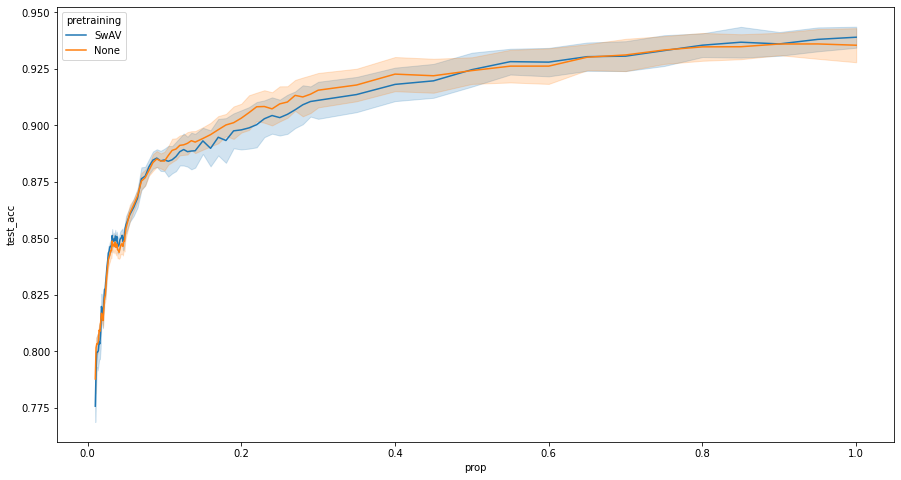

In [21]:
plt.figure(figsize=(15, 8))
# plt.ylim(0.85, 0.97)
# plt.xlim(0.10, 1)
sns.lineplot(
    data=df_le,
    x="prop",
    y="test_acc",
    hue="pretraining",
    ci="sd",
)

In [22]:
df_by_prop = df_le.groupby(["prop", "lr_init", "pretraining"], as_index=False).mean()

In [23]:
df_best_lr = (
    df_by_prop.sort_values(by=["prop", "test_acc"], ascending=[True, False])
    .groupby(["pretraining", "prop"], as_index=False)
    .first()
    .sort_values(by=["prop", "pretraining"])
)

In [24]:
df_barplot = df_best_lr.copy(deep=True)
df_barplot["diff"] = df_barplot["test_acc"].diff()
df_barplot = df_barplot.loc[
    df_barplot["pretraining"] == "SwAV"]

<AxesSubplot:xlabel='prop', ylabel='diff'>

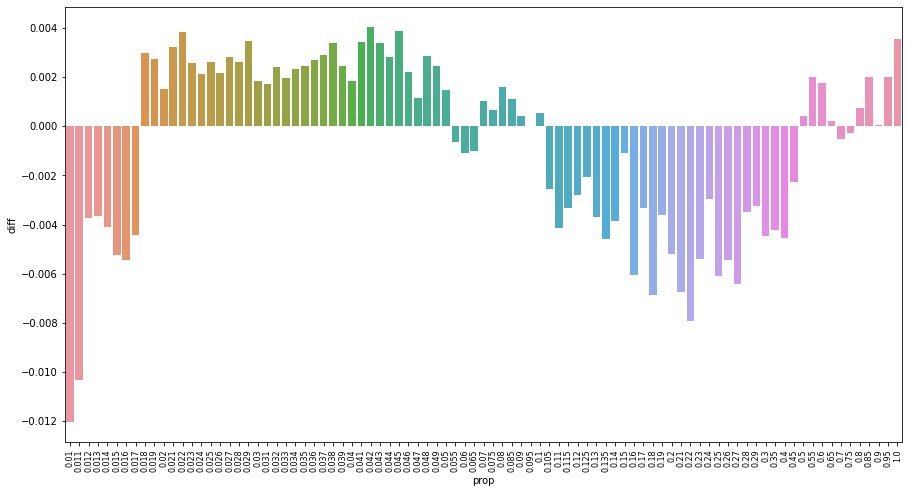

In [25]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x="prop", y="diff", data=df_barplot)